# Abstract
Churn is a measure of how many customers stop using a service or product, often evaluated for a specific period of time. One of the biggest difficulties in telecommunication industry is to retain the customers and prevent the churn.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. Acquiring new customers is not only more difficult, but also much more costly to companies than maintaining existing customer relationships. Therefore, many Customer Churn Prediction (CCP) models have been implemented.

In this study, a churn level prediction process is carried out using machine learning. A dataset with over 7000 customers of a telecom company is used. An action plan for the company is designed based on the results.

### **Import Needed Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_predict,cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer,accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import optuna
warnings.filterwarnings("ignore")


print("modules loaded")

modules loaded


# Data Understanding

1. Problem Statement
2. Data Collection
3. Data Dictionary
4. Read Data
5. Data Wrangling
6. EDA (Exploratory Data Analysis)

## **Problem Statement**

The Telco customer churn data contains information about a telecom company named Telco that provide home phone and internet services to 7043 customers. Telco has observed a decline in customer retention rates so it provides this data which indicates which customers have left, stayed, or signed up for their service. Multiple important demographics and services are included for each customer, totaling 20 features. The company wants to identify the factors contributing to customer churn, develop strategies to improve customer retention and tailor services to different customer segments.

## **Data Collection**

The company has access to the following datasets:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## Data dictionary

Each row represents a customer, and each column contains the customer's attributes, as described below. The dataset includes information about:

| <p align="center">**Feature**</p>    | <p align="center">**Definition**</p>                                                                                                                                   |
|--------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| <p align="center">`Churn`</p>        | <p align="center">Yes = the customer left the company within the last month. No = the customer remained with the company.</p>                                            |
| <p align="center">`gender`</p>       | <p align="center">Customer's gender: Male, Female </p>                                                                                                                 |
| <p align="center">`SeniorCitizen`</p>| <p align="center">Customer is 65 or older: 1 = Yes, 0 = No</p>                                                                                                         |
| <p align="center">`Partner`</p>      | <p align="center">Customer is married: Yes, No </p>                                                                                                                    |
| <p align="center">`Dependents`</p>   | <p align="center">Customer lives with dependents: Yes, No</p>                                                                                                          |
| <p align="center">`tenure`</p>       | <p align="center">Total number of months the customer has been with the company</p>                                                                                     |
| <p align="center">`PhoneService`</p> | <p align="center">Customer subscribes to phone service: Yes, No</p>                                                                                                    |
| <p align="center">`MultipleLines`</p>| <p align="center">Customer has multiple telephone lines: Yes, No, No phone service</p>                                                                                 |
| <p align="center">`InternetService`</p>| <p align="center">Customer subscribes to Internet: No, DSL, Fiber Optic</p>                                                                                          |
| <p align="center">`OnlineSecurity`</p>| <p align="center">Additional online security service: Yes, No, No internet service</p>                                                                                |
| <p align="center">`OnlineBackup`</p> | <p align="center">Additional online backup service: Yes, No, No internet service</p>                                                                                   |
| <p align="center">`DeviceProtection`</p>| <p align="center">Device protection plan for equipment: Yes, No, No internet service</p>                                                                             |
| <p align="center">`TechSupport`</p>  | <p align="center">Technical support plan: Yes, No, No internet service</p>                                                                                             |
| <p align="center">`StreamingTV`</p>  | <p align="center">Uses Internet service to stream TV: Yes, No, No internet service</p>                                                                                 |
| <p align="center">`StreamingMovies`</p>| <p align="center">Uses Internet service to stream movies: Yes, No, No internet service</p>                                                                            |
| <p align="center">`Contract`</p>     | <p align="center">Current contract type: Month-to-Month, One Year, Two Year</p>                                                                                        |
| <p align="center">`PaperlessBilling`</p>| <p align="center">Has chosen paperless billing: Yes, No</p>                                                                                                          |
| <p align="center">`PaymentMethod`</p>| <p align="center">How the customer pays: Electronic check, Credit Card, Mailed Check, Bank transfer</p>                                                                |
| <p align="center">`MonthlyCharges`</p>| <p align="center">Current total monthly charge for services</p>                                                                                                       |
| <p align="center">`TotalCharges`</p> | <p align="center">Customer's total charges to date</p>                                                                                                                |
| <p align="center">`CustomerID`</p>   | <p align="center">Unique ID that identifies the customer</p>                                                                                                           |


## EDA (Exploratory Data Analysis)
EDA is more about understanding the data, identifying patterns, relationships, and insights. It helps to form hypotheses about the data or detect any anomalies. EDA tasks include:

* Visualizing data (histograms, box plots, scatter plots)
* Summarizing statistics (mean, median, variance, correlation)
* Identifying distributions
* Detecting outliers and trends
* Exploring relationships between features (e.g., correlation matrices)

## **Read Data**

In [2]:
df = pd.read_csv("/kaggle/input/telecom-customers-churn/Telecom Customers Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data wrangling

In [5]:
print(df['customerID'].head(10))

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
5    9305-CDSKC
6    1452-KIOVK
7    6713-OKOMC
8    7892-POOKP
9    6388-TABGU
Name: customerID, dtype: object


 As Customer ID is only for customers identification. So it will not be helpful

In [6]:
df.drop('customerID', axis=1, inplace=True)

### Check Nulls and Duplicates

In [7]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

22

It appears that there are no missing values. However, the TotalCharges column should be float type. Probably it is being recognized as object due to some empty entries recorded as strings with spaces. Let's check:

In [9]:
sum(map(lambda x: x.isspace(), df['TotalCharges']))

11

Convert TotalCharges to numieric as it should be

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

We are going to replace the 0/1 representation in the SeniorCitizen column by No/Yes so that this column in correctly addressed as a categorical one during the EDA. 

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [12]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

All the null entries are in the TotalCharges column, a numeric column. With the describe method, we can generate descriptive statistics to all numeric columns:

In [13]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

In [14]:
df.loc[df['TotalCharges'].isnull()]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


We could remove TotalCharges empty rows since is a small percentage of the dataset. However, these rows are legit as they correspond to new customers (tenure == 0). Even though there are values in MonthlyCharges column, there is no total values. As described in the data dictionary, the total charges are summed up quarterly, so new customers will not have entries. We could fill the gaps with zero or some reasonable value. Since the wide range, we will fill with the median value:

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Let's see the unique values

In [16]:
def get_unique_values(df):
    for col in df:
        print(f'{col}:{df[col].unique()}\n')

get_unique_values(df)

gender:['Female' 'Male']

SeniorCitizen:['No' 'Yes']

Partner:['Yes' 'No']

Dependents:['No' 'Yes']

tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService:['No' 'Yes']

MultipleLines:['No phone service' 'No' 'Yes']

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:['No' 'Yes' 'No internet service']

OnlineBackup:['Yes' 'No' 'No internet service']

DeviceProtection:['No' 'Yes' 'No internet service']

TechSupport:['No' 'Yes' 'No internet service']

StreamingTV:['No' 'Yes' 'No internet service']

StreamingMovies:['No' 'Yes' 'No internet service']

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:['Yes' 'No']

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

To

We are going to replace the 'No internet service' and 'No phone service' values with 'No' so that this columns is correctly addressed during the EDA. 

In [17]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [18]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
df.describe(exclude=[np.number])

gender SeniorCitizen Partner Dependents PhoneService MultipleLines  \
count    7043          7043    7043       7043         7043          7043   
unique      2             2       2          2            2             2   
top      Male            No      No         No          Yes            No   
freq     3555          5901    3641       4933         6361          4072   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              2            2                2   
top        Fiber optic             No           No               No   
freq              3096           5024         4614             4621   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           2           2               2               3   
top             No          No              No  Month-to-month   
freq          4999        4336            4311            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

#### Insights:

Now we know that most customers:

* are male
* are younger than 65 years
* have no partner and no dependents
* have phone service, with a single line
* have fiber optic internet service
* do not have online services (security, backup, device protection)
* do not have tech support
* do not have streaming services
* have monthly contracts
* have paperless billing and pay with electronic check
* The target feature Churn has No as the most frequent value, occurring 5174 times.


### Check Nulls and Duplicates again

In [20]:
df.isna().sum().sum()

0

In [21]:
df.duplicated().sum()

22

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

## **Visulization**

In [24]:
fig = px.pie(df,names='Churn', title='count_Churn')
fig.update_traces(textposition='inside', textinfo='value+percent')
fig.show()

A little more than one quarter of the customers left the company in the last month. A high number that we need to understand.

In [25]:
gen_count=df['gender'].value_counts()
gen_count

gender
Male      3541
Female    3480
Name: count, dtype: int64

In [26]:
fig = px.pie(df,names='gender', title='count_gender')
fig.update_traces(textposition='inside', textinfo='value+label+percent')
fig.show()

In [27]:
SeniorCitizen_count=df['SeniorCitizen'].value_counts()
SeniorCitizen_count

SeniorCitizen
No     5880
Yes    1141
Name: count, dtype: int64

In [28]:
fig = px.pie(df, names='SeniorCitizen', title='count_SeniorCitizen')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [29]:
fig = px.pie(df, names='Partner', title='count_Partner')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [30]:
fig = px.pie(df, names='Dependents', title='count_Dependents')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [31]:
fig = px.pie(df, names='PhoneService', title='count_PhoneService')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [32]:
fig = px.pie(df, names='MultipleLines', title='count_MultipleLines')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [33]:
InternetService_counts = df['InternetService'].value_counts().reset_index()
InternetService_counts.columns = ['InternetService', 'Count']


In [34]:
fig = px.bar(InternetService_counts, x='InternetService', y='Count', text_auto='.f'
             , color='InternetService', title="InternetService Count")
fig.show()

In [35]:
contract_counts = df['Contract'].value_counts().reset_index()
contract_counts.columns = ['Contract', 'Count']
fig = px.bar(contract_counts, x='Contract', y='Count', text_auto='.f', color='Contract'
             , title="Contract Count",)
fig.show()

In [36]:
PaymentMethod_counts = df['PaymentMethod'].value_counts().reset_index()
PaymentMethod_counts.columns = ['PaymentMethod', 'Count']
fig = px.bar(PaymentMethod_counts, x='PaymentMethod', y='Count', text_auto='.f', color='PaymentMethod',
             title="PaymentMethod Count")
fig.show()

In [37]:
StreamingTV_counts = df['StreamingTV'].value_counts().reset_index()
StreamingTV_counts.columns = ['StreamingTV', 'Count']
fig = px.bar(StreamingTV_counts, x='StreamingTV', y='Count', text_auto='.f', color='StreamingTV',
             title="StreamingTV Count")
fig.show()

In [38]:
fig = px.pie(df, names='DeviceProtection', title='count_DeviceProtection')
fig.update_traces(textposition='inside', textinfo='percent+value')
fig.show()

In [39]:
OnlineSecurity_count=df['OnlineSecurity'].value_counts()
OnlineSecurity_count

OnlineSecurity
No     5002
Yes    2019
Name: count, dtype: int64

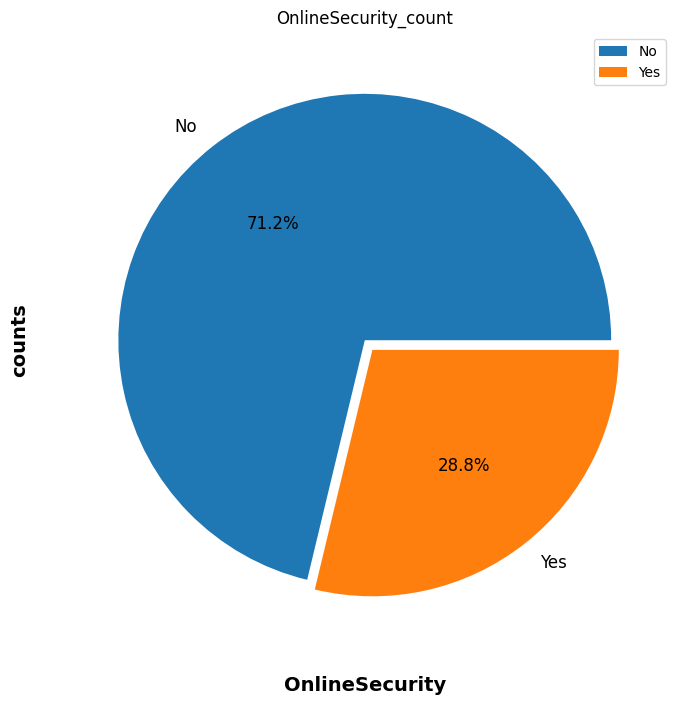

In [40]:
plt.figure(figsize = (20, 8))
explode = (0,0.05)
OnlineSecurity_count.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('OnlineSecurity_count')
plt.xlabel('OnlineSecurity', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = OnlineSecurity_count.index, loc = "best")
plt.show()

In [41]:
TechSupport_count=df['TechSupport'].value_counts()
TechSupport_count

TechSupport
No     4977
Yes    2044
Name: count, dtype: int64

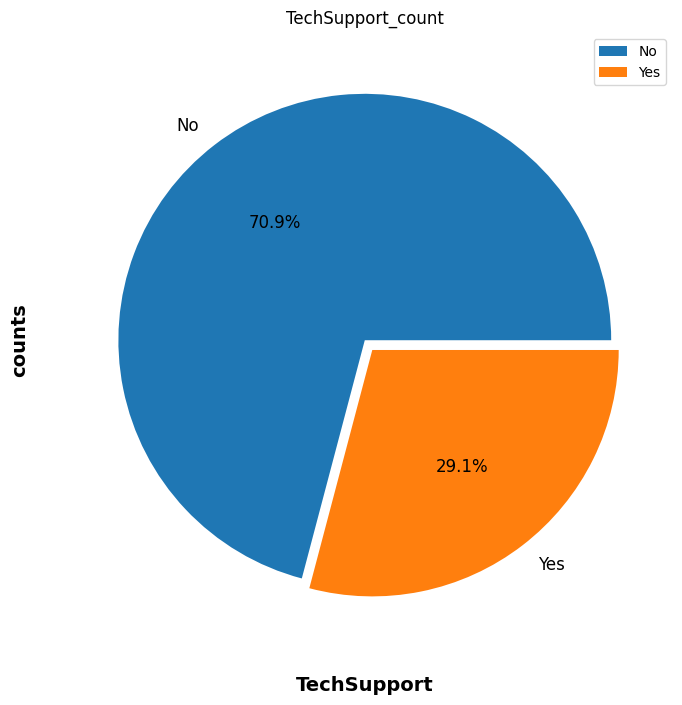

In [42]:
plt.figure(figsize = (20, 8))
explode = (0,0.05)
TechSupport_count.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('TechSupport_count')
plt.xlabel('TechSupport', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", fontsize = 14, labelpad = 20)
plt.legend(labels = TechSupport_count.index, loc = "best")
plt.show()

In [43]:
StreamingMovies_count=df['StreamingMovies'].value_counts()
StreamingMovies_count

StreamingMovies
No     4289
Yes    2732
Name: count, dtype: int64

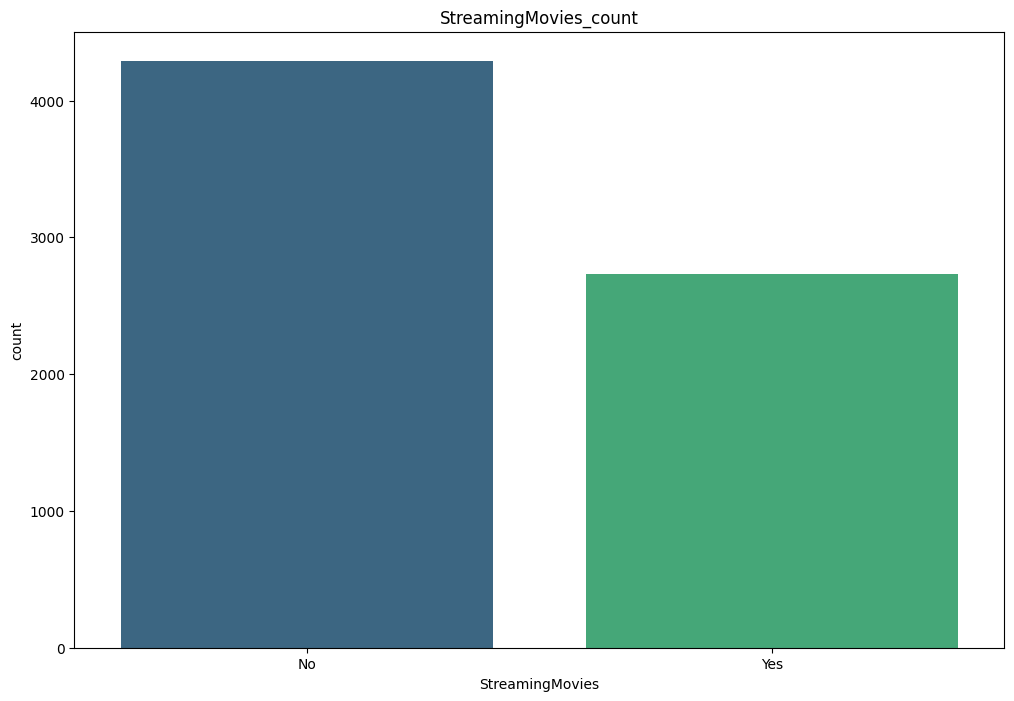

In [44]:
plt.figure(figsize=(12,8))
M=sns.barplot(x=StreamingMovies_count.index,y=StreamingMovies_count.values,palette='viridis')
plt.title('StreamingMovies_count')
plt.xlabel('StreamingMovies')
plt.ylabel('count')
plt.show()

In [45]:
fig = px.histogram(df, x="tenure")
fig.show()

In [46]:
fig = px.histogram(df, x="MonthlyCharges")
fig.show()

In [47]:
fig = px.histogram(df, x="MonthlyCharges", color="Churn")
fig.show()

In [48]:
fig = px.histogram(df, x="MonthlyCharges", color="gender")
fig.show()

In [49]:
fig = px.histogram(df, x="tenure", color="PaymentMethod")
fig.show()

In [50]:
fig = px.histogram(df, x="tenure", color="Churn")
fig.show()

In [51]:
fig = px.histogram(df, x="tenure", color="gender")
fig.show()

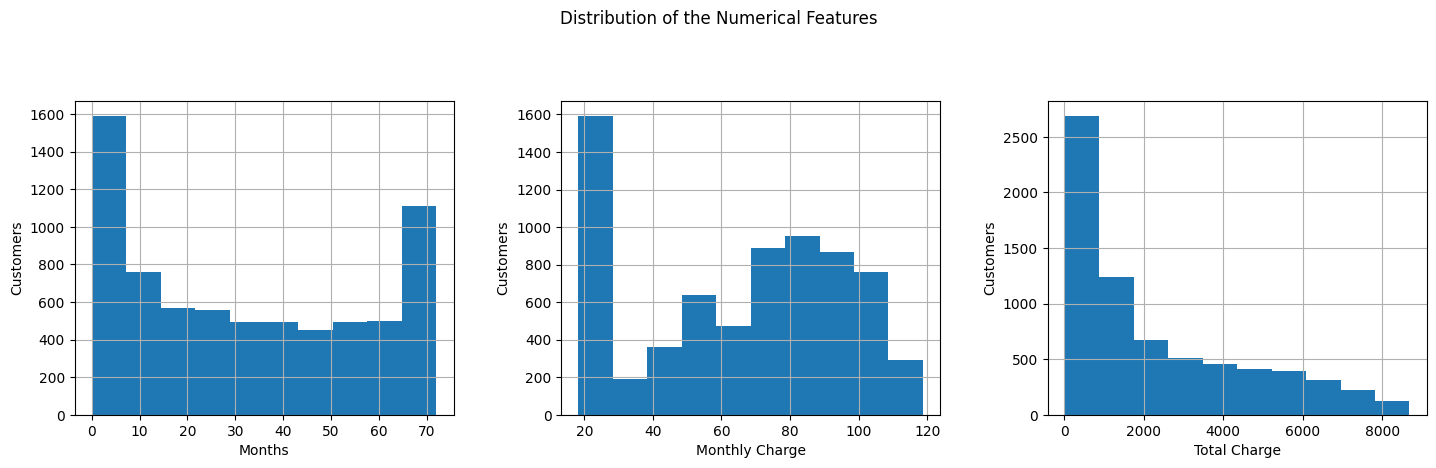

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot specific features instead of all numerical features
df['tenure'].hist(ax=axes[0])
df['MonthlyCharges'].hist(ax=axes[1])
df['TotalCharges'].hist(ax=axes[2])

axes[0].set_xlabel('Months')
axes[0].set_ylabel('Customers')
axes[1].set_xlabel('Monthly Charge')
axes[1].set_ylabel('Customers')
axes[2].set_xlabel('Total Charge')
axes[2].set_ylabel('Customers')

fig.suptitle('Distribution of the Numerical Features')
fig.tight_layout(pad=3.0)

plt.show()


#### Insights:
The tenure distribution has an interesting shape. Most customers have been with the company for just a few months, but also many have been for about 72 months (maximum value for tenure). This is probably related with different contracts, something that we will check soon. Probably some marketing campaign was ran recently to capture new customers due to the high number of customers with few months.

We can see that most customers pay low monthly charges, but there is a great fraction with medium values. Since most customers have been with the company for just a few months, the total charges plot shows most customers with low values.

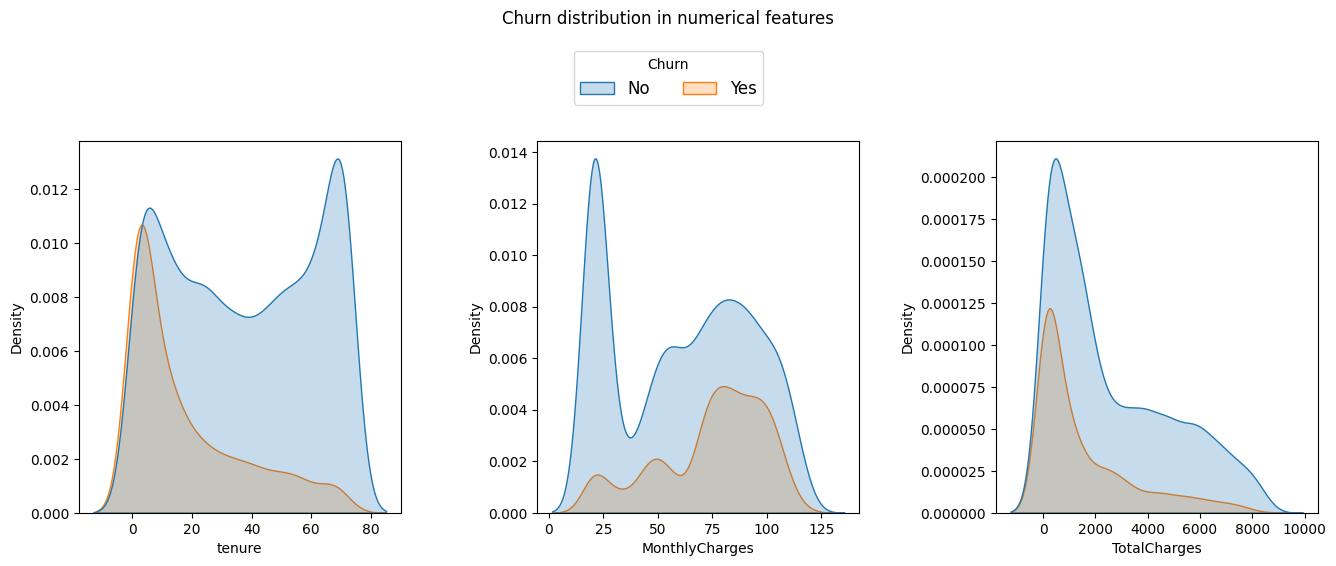

In [53]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6))
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, feature in enumerate(numerical_features[0:]):
    k = sns.kdeplot(x=feature, hue='Churn', data=df, ax=axes.flat[i],
                    fill=True, multiple='layer')
    handles = k.legend_.legendHandles
    labels = [t.get_text() for t in k.legend_.get_texts()]
    k.legend_.remove()

fig.suptitle('Churn distribution in numerical features\n\n')
fig.legend(bbox_to_anchor=(0.5, 0.925), loc='upper center', ncol=2,
           labels=labels, handles=handles, fontsize=12, title='Churn')
fig.tight_layout(pad=3.0)

plt.show()

The above plot shows that short tenure (recent) customers have higher churn rates. Moreover, the higher the monthly charge, the higher the churn rate.

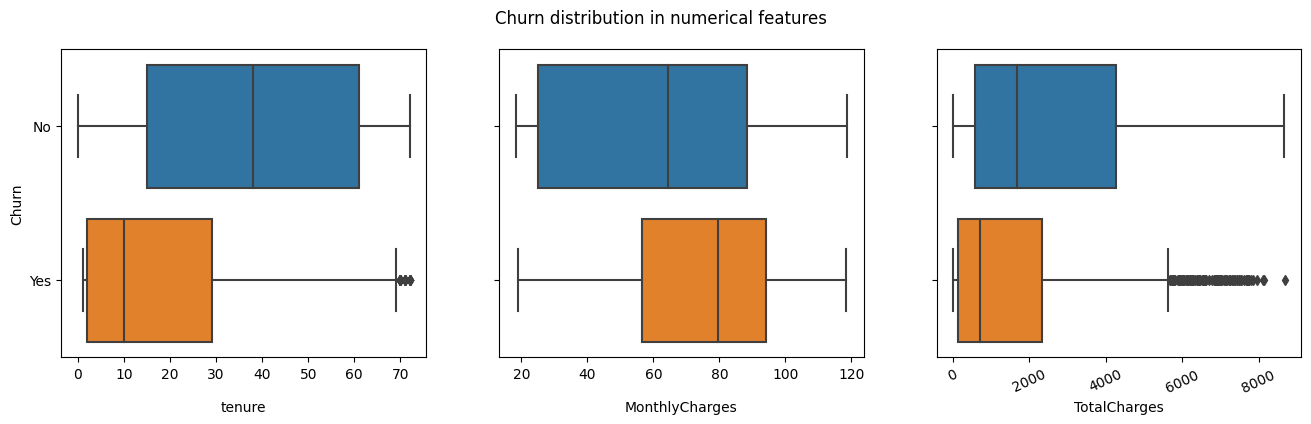

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

for i, feature in enumerate(numerical_features[0:]):
    sns.boxplot(x=feature, y='Churn', data=df, ax=axes.flat[i])

axes.flat[1].set_ylabel('')
axes.flat[2].set_ylabel('')
axes.flat[2].tick_params(axis='x', rotation=25)

fig.suptitle('Churn distribution in numerical features')
fig.align_labels()
plt.show()

#### Insights
The boxplots show that the churn rate is higher among customers with low tenure and high monthly charges. In details:

* the median tenure for customers who have left is around 10 months, while it is around 40 months for those who have stayed with the company
* the median monthly charge for customers who have churned is around 80, while it is around 65 for those who have not churned
* since most customers who have churned spent less time with the company, they have low total charges compared with those who have stayed   
* There are many outliers in the total charges boxplot of customers who have churned. It is not clear the cause, but it            could be wrong billing or expensive services that guided the customers away from the company.

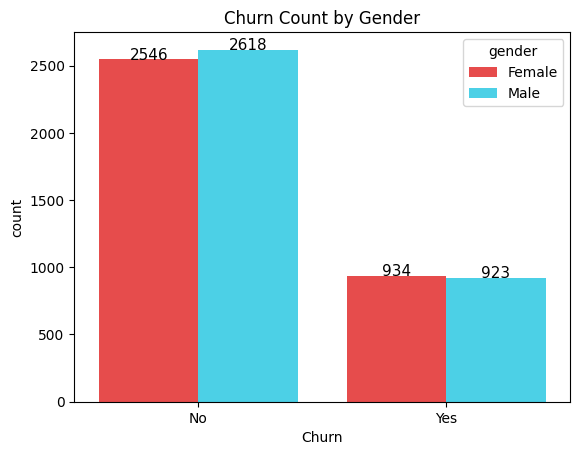

In [55]:
custom_palette = {"Female": "#ff3333", "Male": "#33e3ff"}
ax=sns.countplot(data=df, x="Churn", hue="gender", palette=custom_palette)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by Gender")
plt.show()

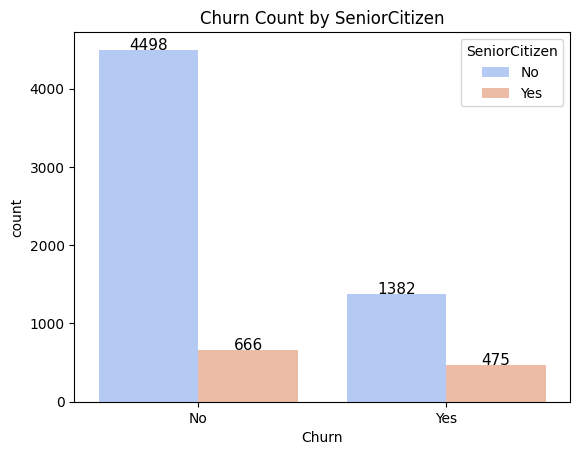

In [56]:
ax=sns.countplot(data=df, x="Churn", hue="SeniorCitizen", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by SeniorCitizen")
plt.show()

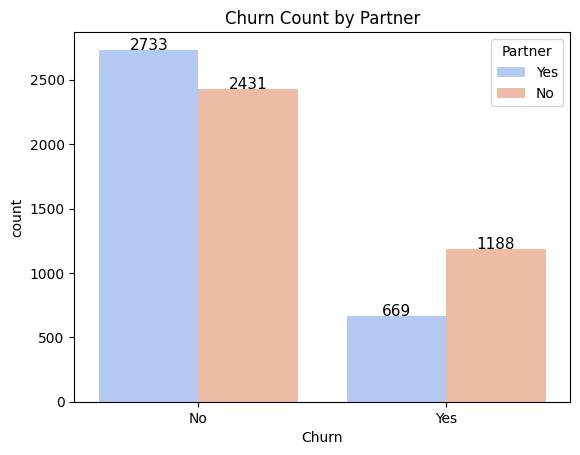

In [57]:
ax=sns.countplot(data=df, x="Churn", hue="Partner", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by Partner")
plt.show()

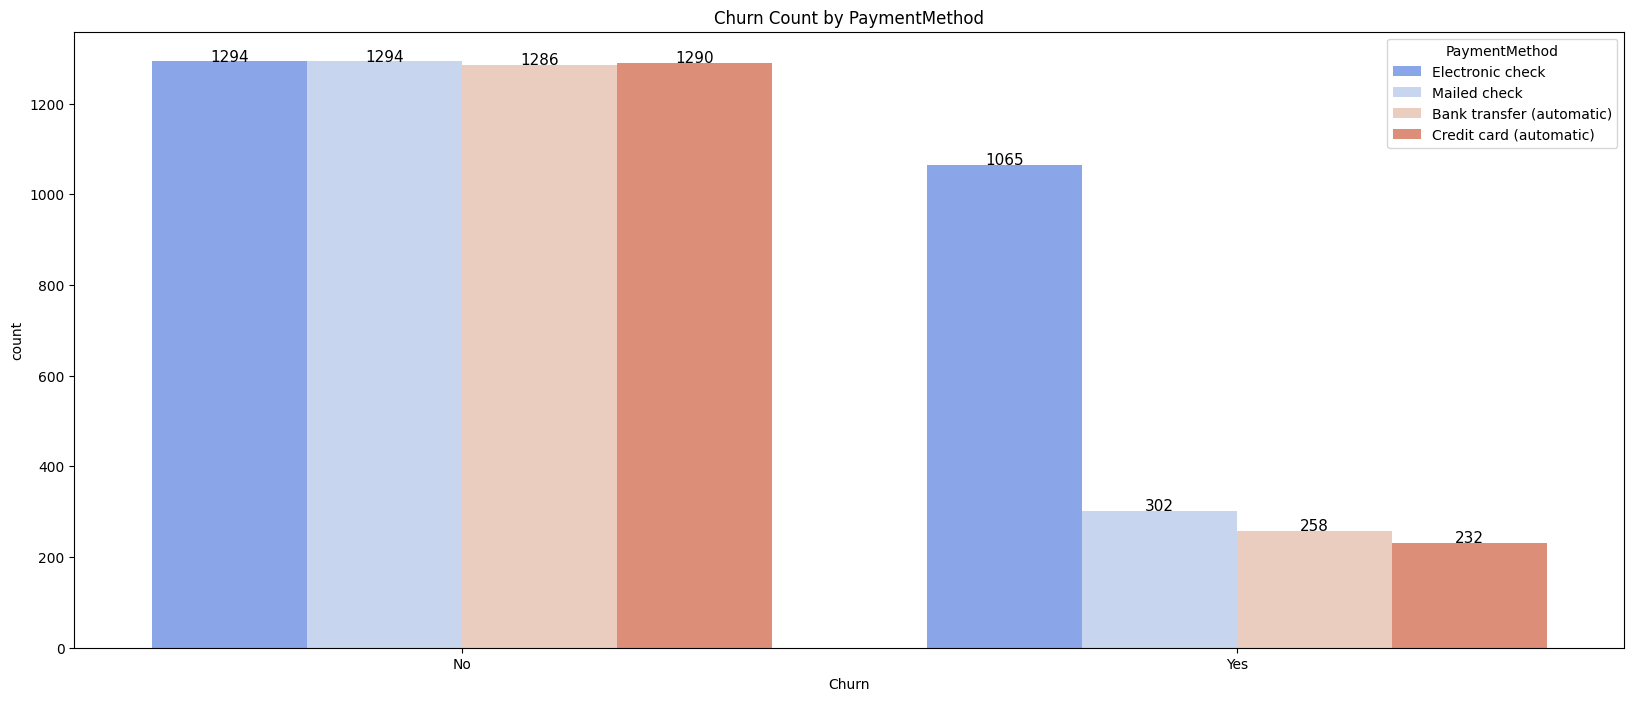

In [58]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df, x="Churn", hue="PaymentMethod", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by PaymentMethod")
plt.show()

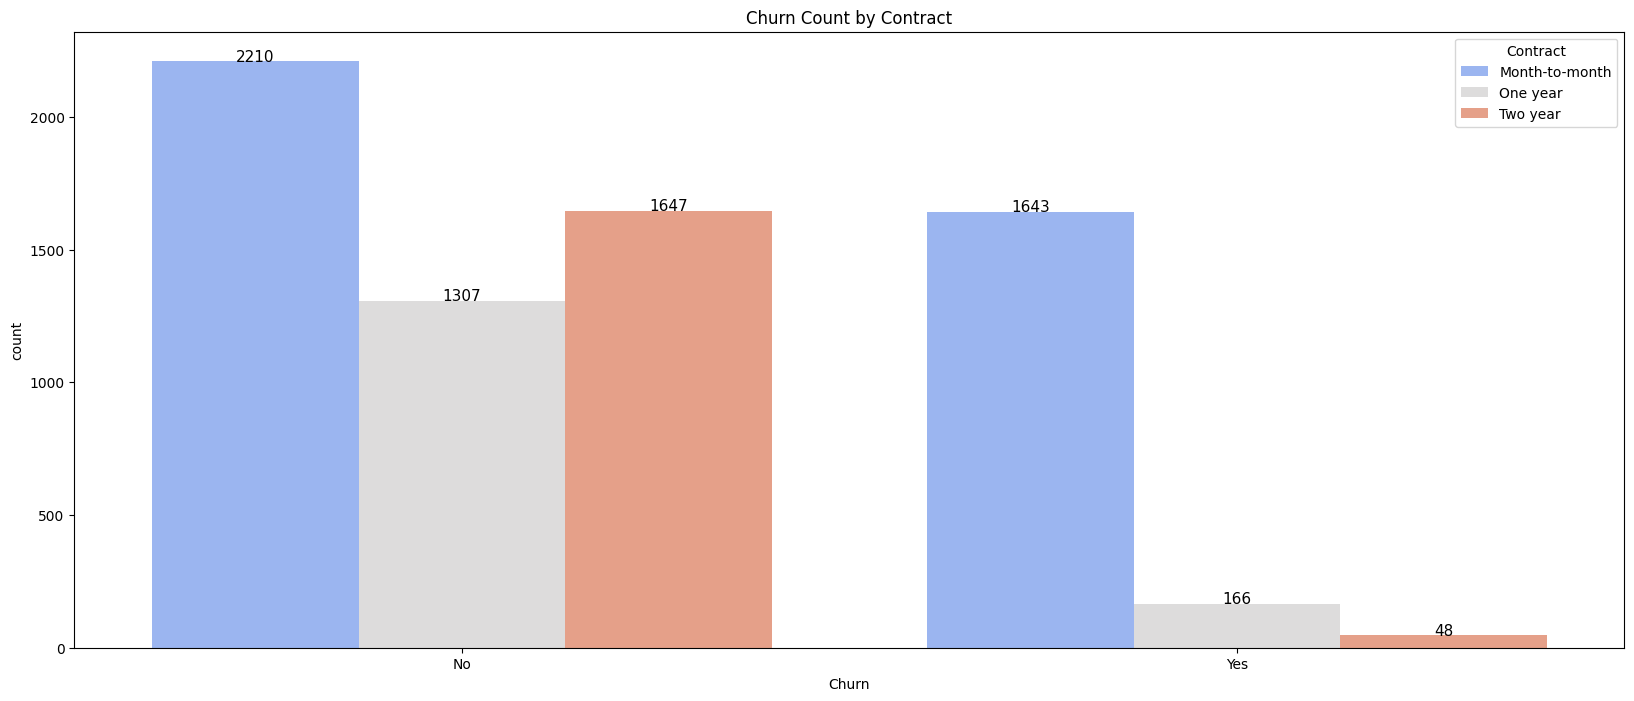

In [59]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df, x="Churn", hue="Contract", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by Contract")
plt.show()

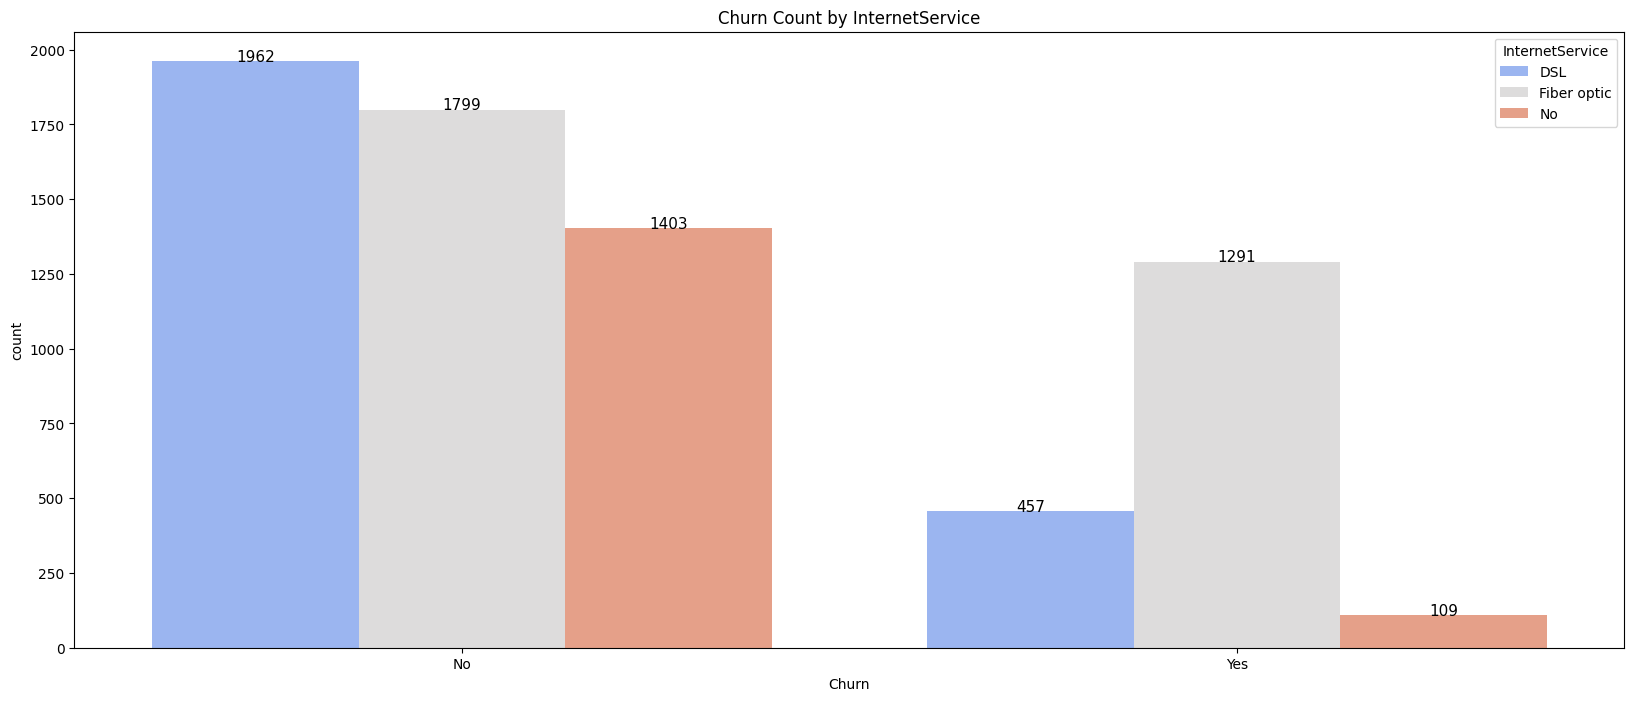

In [60]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df, x="Churn", hue="InternetService", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by InternetService")
plt.show()

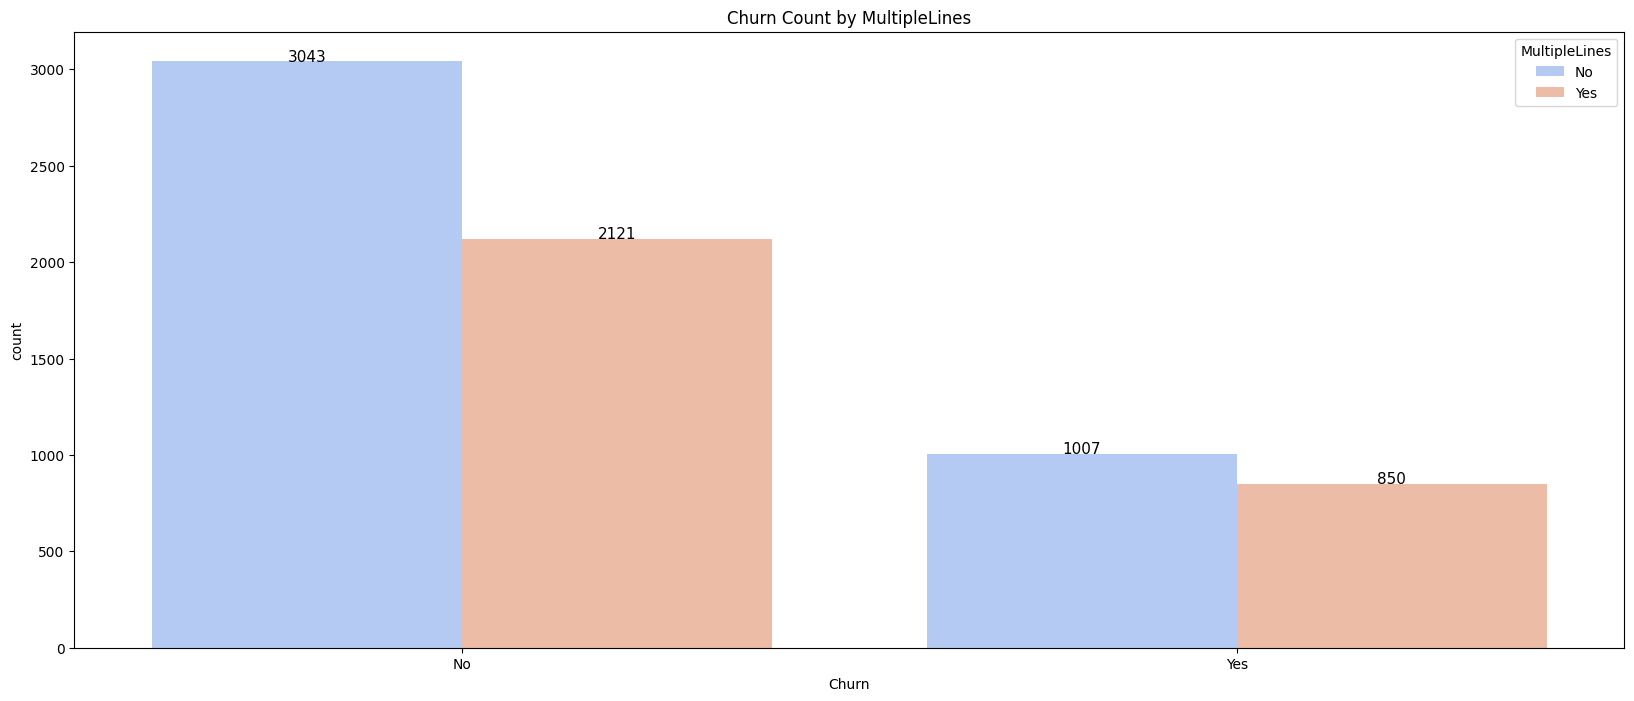

In [61]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df, x="Churn", hue="MultipleLines", palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', fontsize=11, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Churn Count by MultipleLines")
plt.show()

# Data Preprocessing
Preprocessing involves preparing the raw data for analysis or modeling. This step focuses on cleaning, transforming, and organizing the data to ensure it's ready for further analysis or machine learning models. Common preprocessing tasks include:

1. Dealing with outliers
2. Encoding Categorical Variables
3. Correlation Analysis
4. Resampling
5. Feature Scaling 
6. Splitting Data
7. Feature Selection
8. Dimensionality Reduction

## Dealing with outliers

In [62]:
out_list = []

for i in ['MonthlyCharges','TotalCharges','tenure']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up = Q3 + 1.5 * IQR
    low = Q1 - 1.5 * IQR

    if (df.loc[(df[i] > up) | (df[i] < low)]).any(axis=None):
        print(i, "yes")
        out_list.append(i)  # Add the column name to out_list
    else:
        print(i, "no")

print("Columns with outliers:", out_list)

MonthlyCharges no
TotalCharges no
tenure no
Columns with outliers: []


#### **There is no outliers**

## Encoding Categorical Variables

### One-Hot Encoding
It creates new binary columns for each unique category in the specified categorical columns.

In [63]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [64]:
df.replace({'Female': 1,'Male':0,'Yes':1,'No':0},inplace=True)

In [65]:
df['InternetService'] = df['InternetService'].replace(0, 'No')

In [66]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod']).astype(int)
df.shape

(7021, 27)

In [67]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
InternetService_DSL                        int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_Month-to-mo

In [68]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                  

## Correlation Analysis

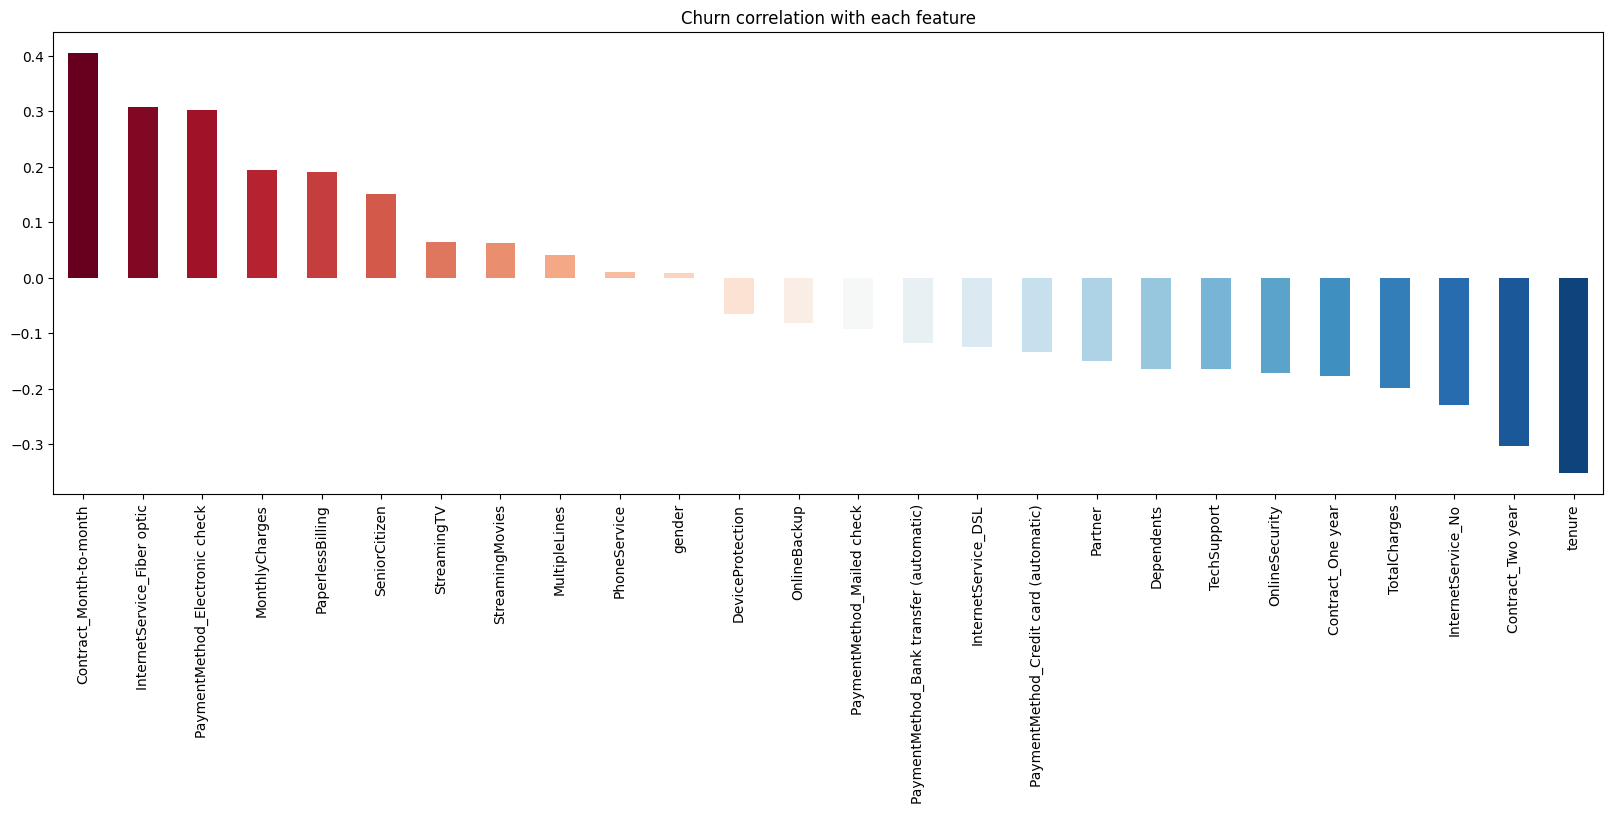

In [69]:
fig, ax = plt.subplots(figsize=(20,6))
colormap = plt.get_cmap('RdBu')
churn_corr_dummies = df.corr()['Churn'].sort_values(ascending=False)
churn_corr_dummies[1:].plot(kind='bar',
                            color=colormap(np.linspace(0, 1,len(churn_corr_dummies))),
                            ax=ax)
ax.set_title('Churn correlation with each feature')
plt.show()

#### Insights
The correlation plot confirms the trends we have seen before:

**Strong negative correlation with churn:**
* Tenure
* Two years contract
* No internet service

**Strong positive correlation with churn:**
* Month to month contract
* Fiber optic internet
* Electronic check payment

## Resampling

In [70]:
df[['MonthlyCharges','TotalCharges','tenure','Churn']]

MonthlyCharges  TotalCharges  tenure  Churn
0                 29            29       1      0
1                 56          1889      34      0
2                 53           108       2      1
3                 42          1840      45      0
4                 70           151       2      1
...              ...           ...     ...    ...
7038              84          1990      24      0
7039             103          7362      72      0
7040              29           346      11      0
7041              74           306       4      1
7042             105          6844      66      0

[7021 rows x 4 columns]

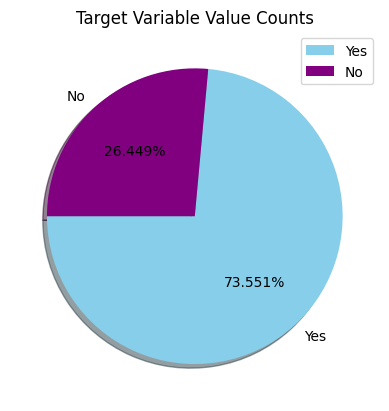

In [71]:
labels=df.Churn.unique()

sizes=df.Churn.value_counts().values
mycolors = ["skyblue", "purple"]
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Yes","No"], autopct='%1.3f%%',colors=mycolors,shadow=True,startangle = 180)
ax.set_title('Target Variable Value Counts')
plt.legend()
plt.show()

### **Correcting the imbalance discovered by using resample**
* Resampling: is a technique used in machine learning and statistics to modify the composition of a dataset. It involves creating new samples by drawing randomly from the existing data points.
* Oversampling: This involves increasing the number of instances in the minority class (or less represented class) to balance the class distribution. It helps prevent bias in the model towards the majority class.

In [72]:
# Split Data¶
X = df.drop('Churn',axis=1)
y = df[['Churn']]

In [73]:
# X contains features and y contains the target variable
# Instantiate SMOTE
oversample = SMOTE()

# Apply SMOTE to X and y
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Set the name for the target variable (y)
y_resampled.name = 'Churn'

# Merge X and y again
datanew = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled], axis=1)

# Shuffle the data
df = shuffle(datanew)

# Check the shape of the new dataset
print(f"The dataset now has {df.shape[0]} rows.")

The dataset now has 10328 rows.


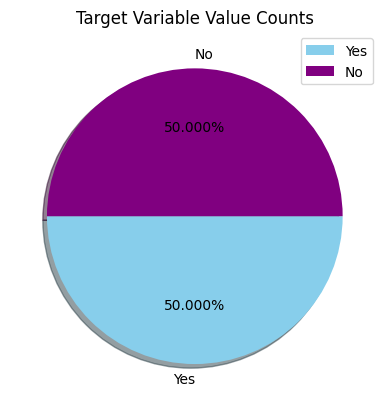

In [74]:
labels=df.Churn.unique()

sizes=datanew.Churn.value_counts().values
mycolors = ["skyblue", "purple"]
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Yes","No"], autopct='%1.3f%%',colors=mycolors,shadow=True,startangle = 180)
ax.set_title('Target Variable Value Counts')
plt.legend()
plt.show()

## Feature Scaling

In [75]:
mmslr = MinMaxScaler()
df[['MonthlyCharges','TotalCharges','tenure']] = mmslr.fit_transform(df[['MonthlyCharges','TotalCharges','tenure']])

In [76]:
df[['MonthlyCharges','TotalCharges','tenure','Churn']]

MonthlyCharges  TotalCharges    tenure  Churn
1198             0.60      0.153473  0.236111      0
10096            0.63      0.301408  0.444444      1
5589             0.22      0.157512  0.486111      0
9025             0.79      0.344565  0.402778      1
2403             0.02      0.100854  0.625000      0
...               ...           ...       ...    ...
4319             0.76      0.183360  0.236111      1
4965             0.38      0.425802  0.916667      0
1239             0.02      0.059774  0.347222      0
5270             0.48      0.547196  1.000000      0
3227             0.01      0.050081  0.333333      0

[10328 rows x 4 columns]

In [77]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
Contract_Month-to-month        

## Split Data

In [78]:
X = df.drop('Churn',axis=1)
y = df['Churn']

## Feature Selection

### Pearson Correlation

Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

There are two types of correlations. __Positive Correlation:__ means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship. __Negative Correlation:__ means that if feature A increases then feature B decreases and vice versa.

If 2 or more independent features are highly correlated then they can be considered as duplicate features and can be dropped. When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly. The model results will be unstable and vary a lot given a small change in the data or model.

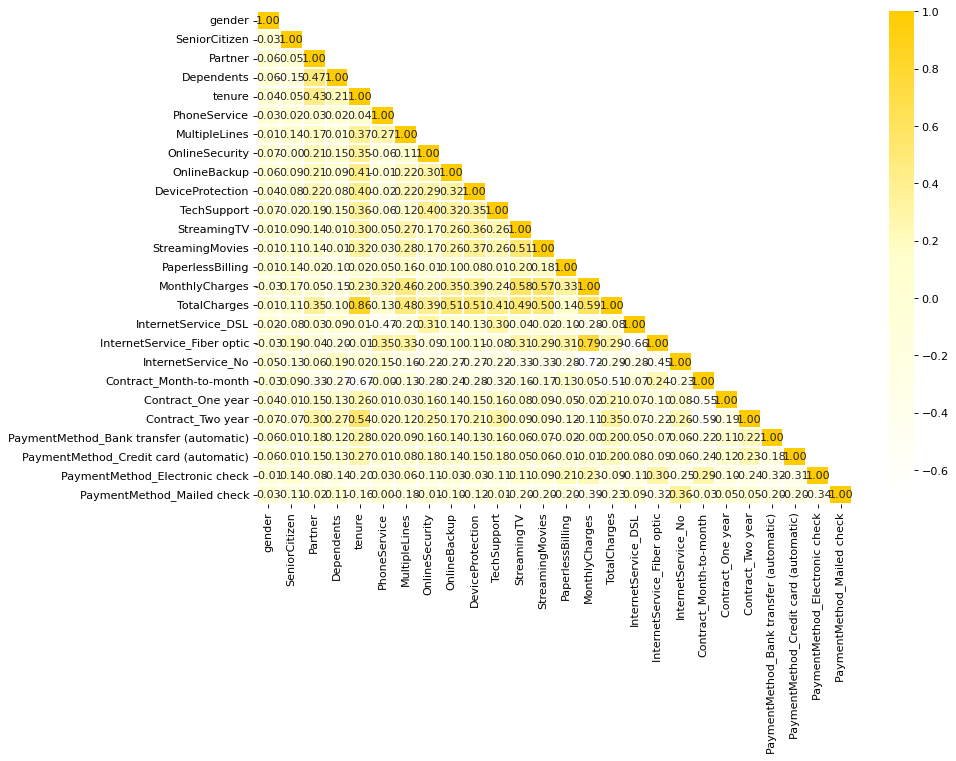

In [79]:
# Define a colormap
yellow = LinearSegmentedColormap.from_list('yellow', [(0, (1,1,1)), (0.5, (1,1,0.8)), (1, (1,0.8,0))])

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(X.corr(), mask=mask, annot=True, cmap=yellow, fmt='.2f', linewidths=0.2)
plt.show()

#### Insights:

The correlation is __extremely high__ between:

* TotalCharges - tenure: __86%__
* MonthlyCharges - InternetService_Fiber optic: __79%__

**Which features to keep and which to disregard because of high correlation:**

In [80]:
# If the correlation between two features is extremely high we will discard one of the features; to avoid multicollinearity.
columns = np.full((X.corr().shape[0],), True, dtype=bool)
for i in range(X.corr().shape[0]):
    for j in range(i+1, X.corr().shape[0]):
        if df.corr().iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False


numerical_selected_columns = X.corr().columns[columns]
numerical_selected_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'InternetService_DSL',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

We can see that
* __TotalCharges__
* __InternetService_Fiber optic__

are __not selected__

In [81]:
df_corr = X[numerical_selected_columns]
df_corr.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1198        1              0        1           0  0.236111             1   
10096       0              0        0           0  0.444444             1   
5589        1              0        1           1  0.486111             0   
9025        0              0        1           0  0.402778             1   
2403        1              0        1           1  0.625000             1   

       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1198               1               1             0                 0  ...   
10096              1               0             0                 0  ...   
5589               0               0             0                 0  ...   
9025               0               0             0                 0  ...   
2403               0               0             0                 0  ...   

       MonthlyCharges  InternetService_DSL  InternetService_No  \
1198             0.60                    0                   0   
10096            0.63                    0                   0   
5589             0.22                    1                   0   
9025             0.79                    0                   0   
2403             0.02                    0                   1   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
1198                         1                  0                  0   
10096                        1                  0                  0   
5589                         0                  1                  0   
9025                         1                  0                  0   
2403                         0                  0                  1   

       PaymentMethod_Bank transfer (automatic)  \
1198                                         0   
10096                                        0   
5589                                         0   
9025                                         0   
2403                                         0   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1198                                       0                               1   
10096                                      1                               0   
5589                                       0                               0   
9025                                       0                               1   
2403                                       0                               0   

       PaymentMethod_Mailed check  
1198                            0  
10096                           0  
5589                            1  
9025                            0  
2403                            1  

[5 rows x 24 columns]

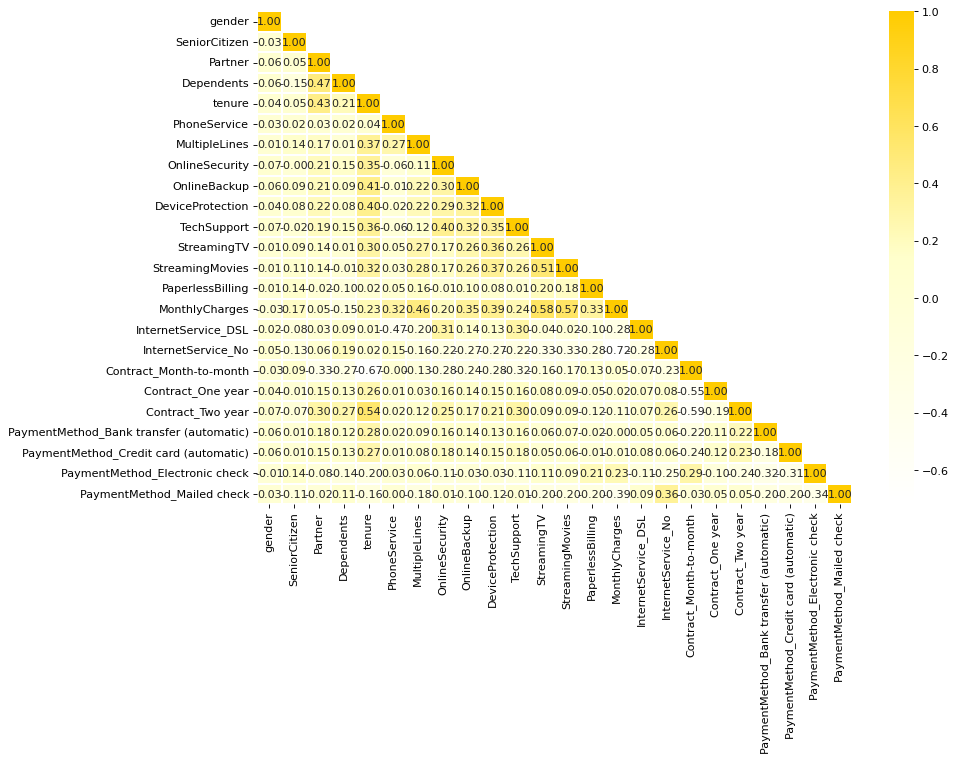

In [82]:
# Define a colormap
yellow = LinearSegmentedColormap.from_list('yellow', [(0, (1,1,1)), (0.5, (1,1,0.8)), (1, (1,0.8,0))])

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(X[numerical_selected_columns].corr())
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation after selection
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df_corr.corr(), mask=mask, annot=True, cmap=yellow, fmt='.2f', linewidths=0.2)
plt.show()

In [83]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
   df_corr, y, test_size=0.2, random_state=42)

### Fisher Score

* Fisher Score (also known as ANOVA F-value) to rank the features based on their importance
* Fisher Score measures the discriminative power of a feature by comparing the ratio of between-class variance to within-class variance. It computes the ratio of the variance of the feature values between classes to the variance within each class.
* The method calculates the F-Score for each feature, ranking them based on their discriminatory power. Higher F-Scores indicate features that are more informative for distinguishing between classes. Features with higher F-Scores are considered more important and are often selected for further analysis or model building.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [85]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train,y_train)

# # Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)

# # Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values('Score').reset_index(drop=True)
print(featureScores)

                                    Feature        Score
0                               StreamingTV     1.211014
1                           StreamingMovies     2.430883
2                             SeniorCitizen     3.010689
3                              PhoneService     3.765968
4                             MultipleLines    18.147540
5                          PaperlessBilling   137.068970
6                                    gender   175.305961
7                PaymentMethod_Mailed check   317.290831
8                       InternetService_DSL   317.805129
9                          DeviceProtection   350.674565
10           PaymentMethod_Electronic check   360.824658
11                             OnlineBackup   412.335180
12                             TotalCharges   478.314885
13                           MonthlyCharges   485.818553
14  PaymentMethod_Bank transfer (automatic)   558.286860
15    PaymentMethod_Credit card (automatic)   616.743634
16                        Contr

**This step computes the scores of all features based on the provided scoring function (f_classif), which calculates the ANOVA F-value for each feature.**

In [86]:
# Select the top-k features
k = 12
top_features = featureScores.nlargest(k, 'Score')['Feature']

# Drop the features not in top_features from your dataset
X_train_fisher = X_train[top_features]

X_test_fisher = X_test[top_features]

In [87]:
X_train_fisher.shape

(8262, 12)

## Dimensionality Reduction

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to simplify complex data while retaining essential information. It transforms a set of correlated variables into a smaller number of uncorrelated variables called principal components, effectively summarizing the data's key patterns.

PCA serves two primary purposes:

1. **Dimensionality Reduction:** PCA reduces the number of variables, simplifying data visualization and analysis. This makes it easier to identify patterns and relationships within the data.
2. **Overfitting Prevention:** By eliminating highly correlated features, PCA reduces the risk of overfitting in machine learning models. Overfitting occurs when a model becomes too closely aligned with the training data, leading to poor performance on new data.
PCA achieves these goals by maximizing the variance of the projected data on a given axis while minimizing the reconstruction error or residuals. It identifies principal components, directions that capture the most significant variations in the data. Projecting data onto these principal components maximizes variance and minimizes reconstruction error, effectively reducing dimensionality without losing crucial information.

The below image aptly illustrates PCA's objective. The red dots represent data points, and the arrows represent principal components. Longer arrows correspond to directions with higher variance, while shorter arrows correspond to directions with lower variance. PCA projects data onto these principal components, reducing dimensionality while preserving essential information.

<center>
<img src="https://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png", width=800>
</center>

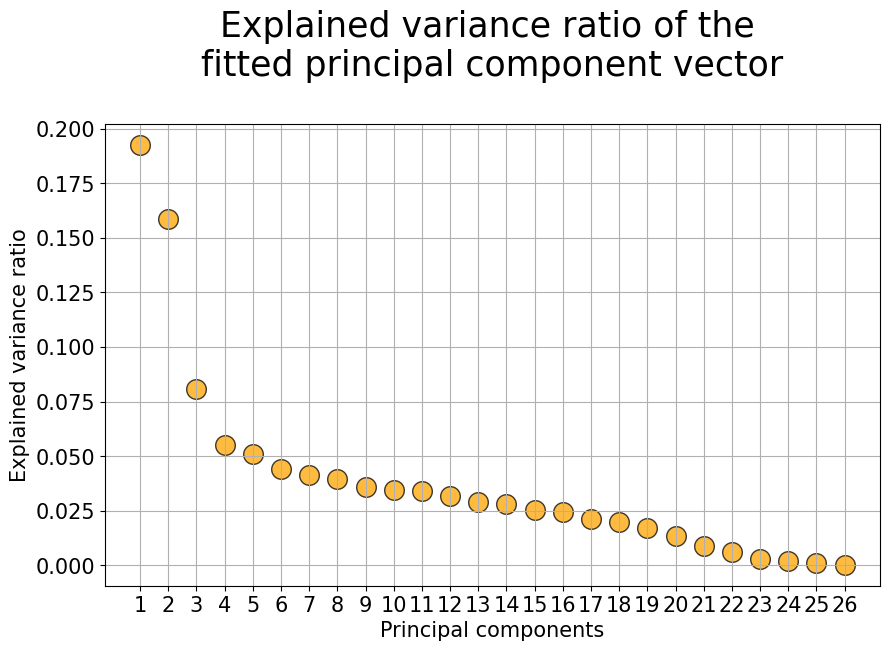

In [88]:
pca = PCA(n_components=None)
df_pca = pca.fit(X)

#Plot the explained variance ratio

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_pca.explained_variance_ratio_))],
            y=df_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**Insights:**
* The first principal component explains about 20% of the variance in the data.
* The second component explains around 7.5% of the variance.
* As you move to higher components (3rd, 4th, and so on), the explained variance ratio decreases significantly.
* Together, the first few components explain a large portion of the variance, while the later components contribute very little.

In [89]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)

In [90]:
data_pca=pd.DataFrame(X_pca)
data_pca.head()

0         1         2
0 -0.118247 -0.498138 -0.379644
1 -0.390394 -0.434208 -0.572235
2  0.061537  1.600695  0.437421
3 -0.387157 -0.836151 -0.228706
4 -0.582605  1.611777 -1.190989

**Linear Discriminant Analysis (LDA)** is a supervised learning algorithm used to classify a data set into multiple classes. It is a linear transformation technique which seeks to find a set of linear combinations of variables that best separate classes of data. LDA is a classification technique that looks at the data set and finds a linear combination of variables that will best separate the data. It is often used to reduce the number of variables in a data set while still retaining the important information for classification.

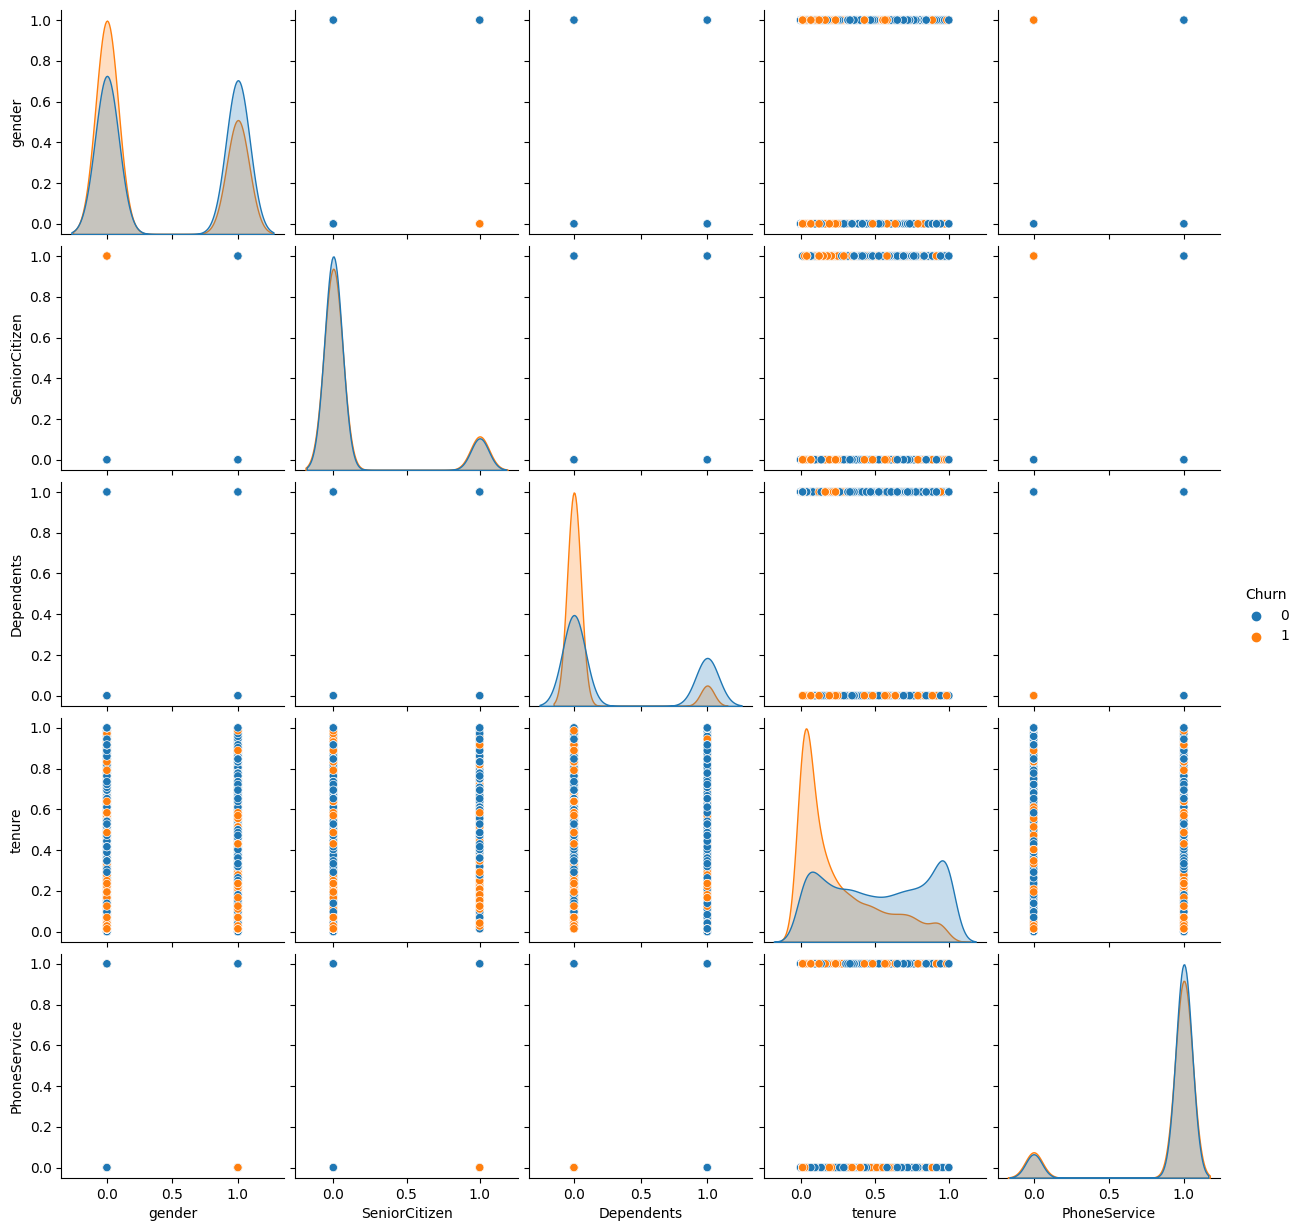

In [91]:
sns.pairplot(df, hue = 'Churn', vars = ['gender', 'SeniorCitizen', 'Dependents', 'tenure','PhoneService'])

**Insights:** As we see in the plots above that variables are not statistically independent and we can not separate the classes with linear combinations, so we ***can not use LDA*** as Dimensionality Reduction Technique.

<div style="border: 5px solid black; padding: 20px; width: 90%; margin: 20px auto; font-size: 1.5em;">
    <h1 style="text-align: center;">Data Modeling</h1>
    <p style="text-align: left;">
        Goals:
    </p>
    <ul style="list-style: none; text-align: left; padding: 0;">
        <li>1. Analyzing customer behavior in the telecom industry.</li>
        <li>2. Build predictive models that classify customers into churn or non-churn categories.</li>
        <li>3. Segment customers into groups based on shared characteristics.</li>
    </ul>
    <p style="text-align: left;">
        Here are the algorithms we used to predict churn and identify meaningful customer segments:
    </p>
    <ul>
        <li><strong>Supervised Algorithms</strong>: Logistic Regression, Decision Trees, Random Forest and XGBoost</li>
        <li><strong>Unsupervised Algorithms</strong>: K-Means Clustering and Hierarchical Clustering</li>
    </ul>
</div>





<div style="border: 5px solid black; padding: 20px; width: 90%; margin: 20px auto; font-size: 1.5em; ">
    <h1 style="text-align: center;"> Data Modeling</h1>
    <p style="text-align: center;">
        The e-commerce company has observed a decline in customer retention rates over the past year.
        The company wants to identify the factors contributing to customer churn and develop strategies to improve customer retention.
    </p>
    <p style="text-align: center;">
        Here are two types of algorithms that can be used for customer churn prediction and analysis:
    </p>
    <ul>
        <li><strong>supervised algorithms</strong>:Logistic Regression, Decision Trees, Random Forest, XGBoost</li>
        <li><strong>unsupervised algorithms</strong>: K-Means Clustering,Principal Component Analysis (PCA),Gaussian Mixture Models (GMM).</li>
    </ul>
</div>


<h1 style="text-align: center;font-size: 5em;"> supervised algorithms </h1><br>

<h1 style="font-size: 2em;">Logistic Regression</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>:Logistic Regression is a straightforward and interpretable model that works well for binary classification problems, such as predicting whether a customer will churn (yes/no). It provides probabilities for class membership, which can help in understanding the likelihood of churn and the impact of different features.</li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>: Easy to implement and interpret; useful for understanding the relationship between features and the probability of churn.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>: Assumes a linear relationship between features and the log odds of the target variable; may not capture complex patterns in data.</li>
</ul>


In [92]:


base_lr = LogisticRegression(penalty = None, multi_class='auto', random_state=42)
base_lr.fit(X_train_c ,
            y_train_c   )


LogisticRegression(penalty=None, random_state=42)

In [93]:
# Training Report
print('Training Report\n',classification_report(y_train_c, base_lr.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report(y_test_c, base_lr.predict(X_test_c ),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.8368    0.8490    0.8428      4106
           1     0.8486    0.8364    0.8425      4156

    accuracy                         0.8427      8262
   macro avg     0.8427    0.8427    0.8427      8262
weighted avg     0.8427    0.8427    0.8427      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8453    0.8469    0.8461      1058
           1     0.8390    0.8373    0.8381      1008

    accuracy                         0.8422      2066
   macro avg     0.8421    0.8421    0.8421      2066
weighted avg     0.8422    0.8422    0.8422      2066



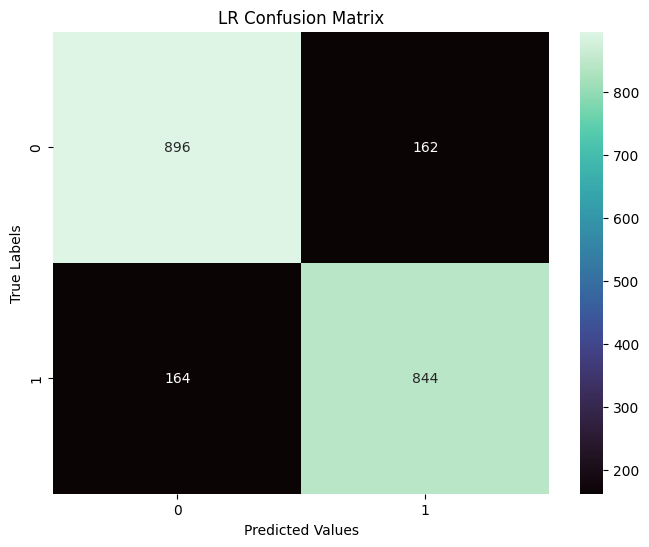

In [94]:
predictions = base_lr.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('LR Confusion Matrix')
plt.savefig('LRconfusionmatrix.png', transparent=True,bbox_inches='tight')


## Hyperparameters Tuning

In [95]:
random_grid = {
    'C': [0.05, 0.1, 5, 20, 50, 100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 300,500],
}
f1scorer = make_scorer(f1_score, average='weighted')  # Takes into account class imbalance
estimator = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(estimator=estimator,param_distributions=random_grid, scoring=f1scorer, cv=5,verbose=4)
random_search.fit(X_train_c ,
                  y_train_c   )

best_params=random_search.best_params_
best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=5, max_iter=100, penalty=l1, solver=liblinear;, score=0.828 total time=   0.9s
[CV 2/5] END C=5, max_iter=100, penalty=l1, solver=liblinear;, score=0.844 total time=   1.0s
[CV 3/5] END C=5, max_iter=100, penalty=l1, solver=liblinear;, score=0.857 total time=   1.0s
[CV 4/5] END C=5, max_iter=100, penalty=l1, solver=liblinear;, score=0.829 total time=   0.9s
[CV 5/5] END C=5, max_iter=100, penalty=l1, solver=liblinear;, score=0.845 total time=   0.9s
[CV 1/5] END C=50, max_iter=300, penalty=l1, solver=liblinear;, score=0.827 total time=   2.1s
[CV 2/5] END C=50, max_iter=300, penalty=l1, solver=liblinear;, score=0.846 total time=   2.1s
[CV 3/5] END C=50, max_iter=300, penalty=l1, solver=liblinear;, score=0.855 total time=   2.4s
[CV 4/5] END C=50, max_iter=300, penalty=l1, solver=liblinear;, score=0.830 total time=   1.7s
[CV 5/5] END C=50, max_iter=300, penalty=l1, solver=liblinear;, score=0.846 total time=  

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 5}

In [96]:
lr_clf = LogisticRegression(**best_params, multi_class='auto', random_state=42)
lr_clf.fit(X_train_c ,
        y_train_c   )

LogisticRegression(C=5, max_iter=500, random_state=42, solver='liblinear')

In [97]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , lr_clf.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report(y_test_c, base_lr.predict(X_test_c ),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.8395    0.8446    0.8421      4106
           1     0.8456    0.8405    0.8430      4156

    accuracy                         0.8425      8262
   macro avg     0.8425    0.8425    0.8425      8262
weighted avg     0.8426    0.8425    0.8425      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8453    0.8469    0.8461      1058
           1     0.8390    0.8373    0.8381      1008

    accuracy                         0.8422      2066
   macro avg     0.8421    0.8421    0.8421      2066
weighted avg     0.8422    0.8422    0.8422      2066



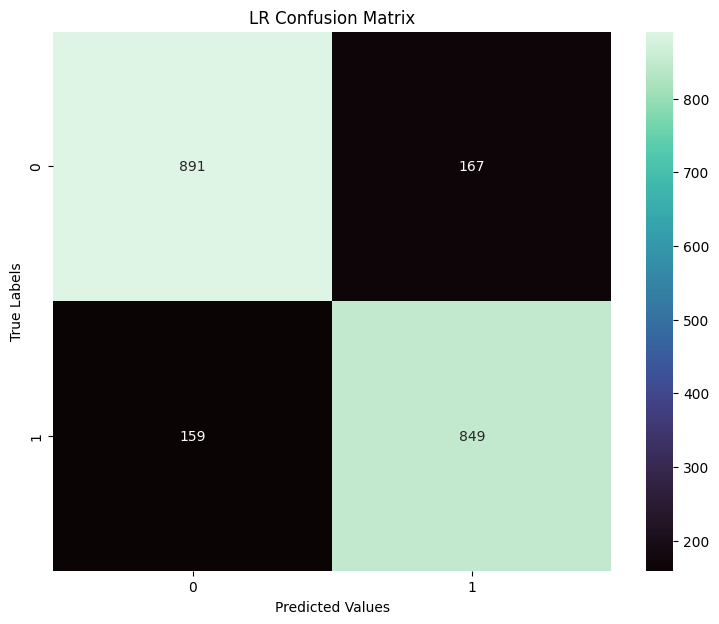

In [98]:
predictions = lr_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')


plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('LR Confusion Matrix')
plt.savefig('LRconfusionmatrix2.png', transparent=True,bbox_inches='tight')


<h1 style="font-size: 2em;">Decision Trees</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>:Decision Trees can model complex, non-linear relationships and interactions between features. They are useful for understanding how different factors contribute to churn by showing decision rules in a tree-like structure.
    </li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>: Easy to understand and visualize; can handle both numerical and categorical data; good for capturing non-linear relationships.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>:Can be prone to overfitting, especially with small datasets or very deep trees.</li>
</ul>


In [99]:

base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train_c ,
              y_train_c   )


DecisionTreeClassifier(random_state=42)

In [100]:
base_tree.tree_.max_depth , base_tree.tree_.node_count, base_tree.tree_.n_leaves

(27, 2897, 1449)

In [101]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , base_tree.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, base_tree.predict(X_test_c  ),digits=4))
# Obvious Overfitting occured

Training Report
               precision    recall  f1-score   support

           0     0.9917    0.9890    0.9904      4106
           1     0.9892    0.9918    0.9905      4156

    accuracy                         0.9904      8262
   macro avg     0.9904    0.9904    0.9904      8262
weighted avg     0.9904    0.9904    0.9904      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8192    0.7836    0.8010      1058
           1     0.7827    0.8185    0.8002      1008

    accuracy                         0.8006      2066
   macro avg     0.8010    0.8010    0.8006      2066
weighted avg     0.8014    0.8006    0.8006      2066



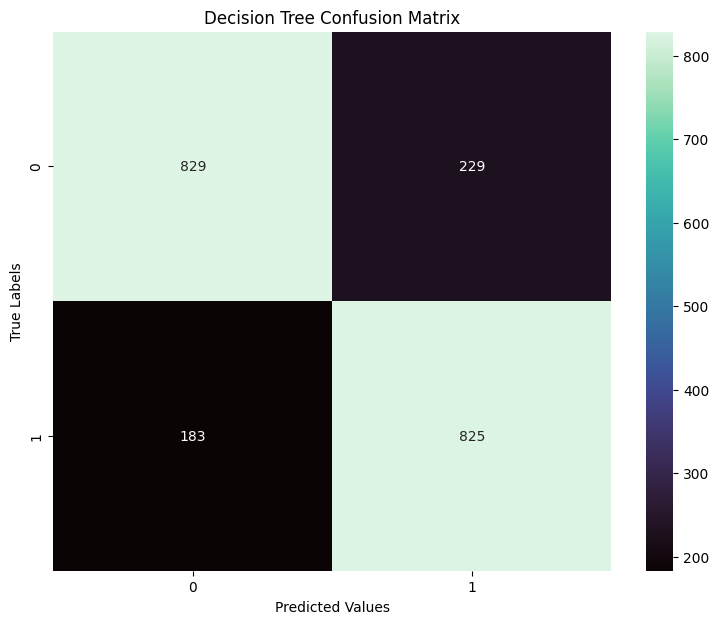

In [102]:
predictions = base_tree.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('DTcmatrix.png', transparent=True)


## Decision Trees with Hyperparameters Tuning

In [103]:

random_grid = {'min_samples_split':[100,500,1000,3000,7000,10000],          # larger values means less complexity,more regularization
        'max_depth': [7,15,20,30,50],                            # larger values means more complexity,less regularization
        'min_samples_leaf': [100, 500, 1000, 2000, 3000, 4000],  # lower values means more complexity,less regularization
        'max_leaf_nodes': [100, 700,1500,5000,15000],            # larger values means more complexity,less regularization
        'max_features': [10,15,17]}                        # more features means more complexity,less regularization

estimator = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=estimator,param_distributions=random_grid,scoring=f1scorer,cv=5,verbose=4)
random_search.fit(X_train_c ,
                  y_train_c   )

random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, max_features=17, max_leaf_nodes=1500, min_samples_leaf=3000, min_samples_split=3000;, score=0.671 total time=   0.0s
[CV 2/5] END max_depth=20, max_features=17, max_leaf_nodes=1500, min_samples_leaf=3000, min_samples_split=3000;, score=0.677 total time=   0.0s
[CV 3/5] END max_depth=20, max_features=17, max_leaf_nodes=1500, min_samples_leaf=3000, min_samples_split=3000;, score=0.704 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=17, max_leaf_nodes=1500, min_samples_leaf=3000, min_samples_split=3000;, score=0.672 total time=   0.0s
[CV 5/5] END max_depth=20, max_features=17, max_leaf_nodes=1500, min_samples_leaf=3000, min_samples_split=3000;, score=0.683 total time=   0.0s
[CV 1/5] END max_depth=20, max_features=10, max_leaf_nodes=15000, min_samples_leaf=2000, min_samples_split=7000;, score=0.337 total time=   0.0s
[CV 2/5] END max_depth=20, max_features=10, max_leaf_nodes=15000, min_samp

{'min_samples_split': 500,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 15000,
 'max_features': 17,
 'max_depth': 20}

In [104]:
def objective_tree(trial):

    # Define the search space ranges for hyperparameters
    param_grid = {
        'min_samples_split': trial.suggest_int('min_samples_split', 70,800),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 50, 300),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 100,1000),
        'max_features': trial.suggest_int('max_features', 7, 17),
        'max_depth': trial.suggest_int('max_depth', 10, 100),
        'ccp_alpha': trial.suggest_loguniform('ccp_alpha', 0.000001, 0.001)
    }

    estimator = DecisionTreeClassifier(**param_grid,
                                       random_state=42)


    f1scorer = make_scorer(f1_score, average='weighted')

    scores = cross_val_score(estimator, X_train_c , y_train_c   , cv=5, scoring=f1scorer, n_jobs=-1)


    return scores.mean()

# Create a study object and optimize the objective function using Optuna

In [105]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_tree, n_trials=100)

best_params = study.best_params
print("Best parameters found:", best_params)

[I 2024-09-22 20:59:52,697] A new study created in memory with name: no-name-d1ec5688-7ef8-4ae9-ae17-89e32c37d18b
[I 2024-09-22 20:59:54,605] Trial 0 finished with value: 0.8050308419403933 and parameters: {'min_samples_split': 626, 'min_samples_leaf': 111, 'max_leaf_nodes': 606, 'max_features': 14, 'max_depth': 40, 'ccp_alpha': 9.491934955624217e-06}. Best is trial 0 with value: 0.8050308419403933.
[I 2024-09-22 20:59:54,666] Trial 1 finished with value: 0.7743890375500401 and parameters: {'min_samples_split': 692, 'min_samples_leaf': 136, 'max_leaf_nodes': 942, 'max_features': 12, 'max_depth': 37, 'ccp_alpha': 1.1830535035437062e-05}. Best is trial 0 with value: 0.8050308419403933.
[I 2024-09-22 20:59:54,724] Trial 2 finished with value: 0.8015330045880968 and parameters: {'min_samples_split': 340, 'min_samples_leaf': 253, 'max_leaf_nodes': 476, 'max_features': 17, 'max_depth': 54, 'ccp_alpha': 1.1908260063754342e-06}. Best is trial 0 with value: 0.8050308419403933.
[I 2024-09-22 20:

Best parameters found: {'min_samples_split': 105, 'min_samples_leaf': 71, 'max_leaf_nodes': 449, 'max_features': 17, 'max_depth': 46, 'ccp_alpha': 8.333192842539107e-06}


In [106]:
tree_clf = DecisionTreeClassifier(**best_params,
                                  random_state=42)
tree_clf.fit(X_train_c ,
            y_train_c   )

DecisionTreeClassifier(ccp_alpha=8.333192842539107e-06, max_depth=46,
                       max_features=17, max_leaf_nodes=449, min_samples_leaf=71,
                       min_samples_split=105, random_state=42)

In [107]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , tree_clf.predict(X_train_c ), digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, tree_clf.predict(X_test_c  ), digits=4))



Training Report
               precision    recall  f1-score   support

           0     0.8312    0.8419    0.8365      4106
           1     0.8418    0.8311    0.8364      4156

    accuracy                         0.8365      8262
   macro avg     0.8365    0.8365    0.8365      8262
weighted avg     0.8365    0.8365    0.8365      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8174    0.8251    0.8213      1058
           1     0.8146    0.8065    0.8106      1008

    accuracy                         0.8161      2066
   macro avg     0.8160    0.8158    0.8159      2066
weighted avg     0.8161    0.8161    0.8160      2066



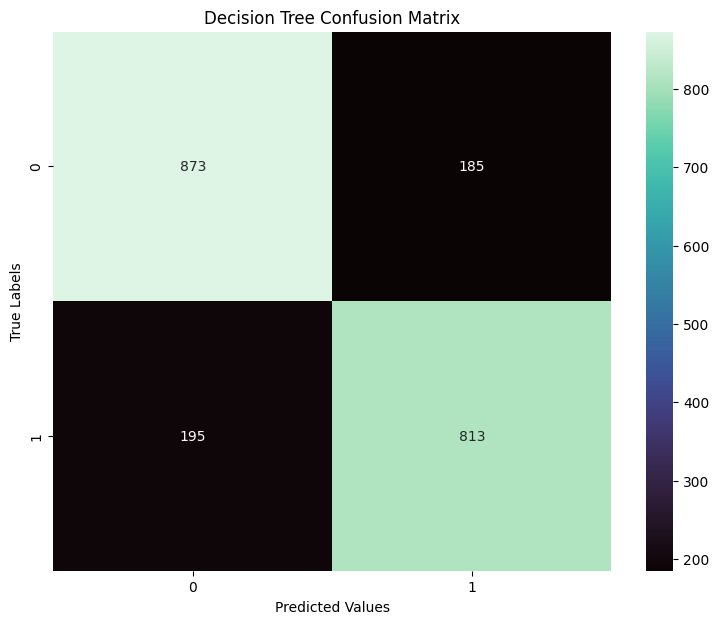

In [108]:
predictions = tree_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('DTcmatrix2.png', transparent=True,bbox_inches='tight')


## Extracting Important Features using Decision Trees

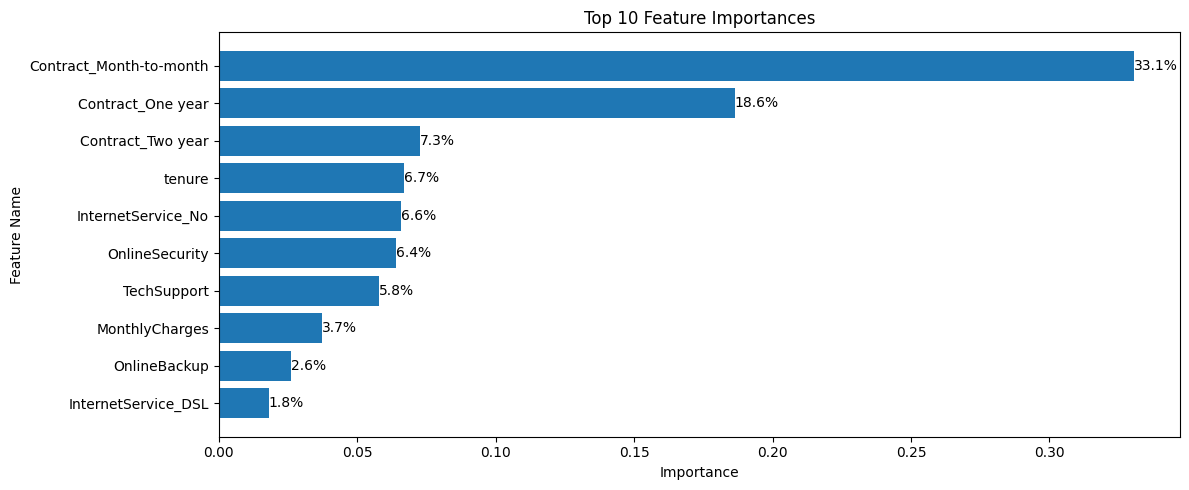

In [109]:

plt.figure(figsize=(12,5))
feature_importances = tree_clf.feature_importances_
sorted_indices = feature_importances.argsort()
sorted_importances = feature_importances[sorted_indices]
feature_names = X_train_c .columns

# top 10 important features
top_indices = sorted_indices[-10:]
top_importances = sorted_importances[-10:]
top_feature_names = [feature_names[i] for i in top_indices]

plt.barh(range(len(top_importances)), top_importances)

for i, v in enumerate(top_importances):
    plt.text(v, i, '{:.1f}%'.format(v*100), va='center', ha='left')

plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.yticks(range(len(top_importances)), top_feature_names)
plt.tight_layout()
plt.savefig('top_feat_imp.png', transparent=True)
plt.show()


- In decision tree feature importance, Weight is the most impactful feature, followed by Frequency of consuming vegetables, Height, and so on. The features towards the left have negligible impact on the model's predictions.

<h1 style="font-size: 2em;">Random Forest</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>:Random Forest is an ensemble method that combines multiple Decision Trees to improve performance and robustness. It reduces the risk of overfitting and provides feature importance scores, which can help in understanding which factors are most influential in predicting churn.
    </li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>:  Handles large datasets and high-dimensional spaces well; reduces overfitting; provides feature importance.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>: Can be less interpretable than a single Decision Tree; slower to train and predict compared to simpler models.</li>
</ul>



In [110]:
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_c ,
             y_train_c   )


RandomForestClassifier(random_state=42)

In [111]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , rf_base.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, rf_base.predict(X_test_c  ),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.9934    0.9871    0.9902      4106
           1     0.9873    0.9935    0.9904      4156

    accuracy                         0.9903      8262
   macro avg     0.9904    0.9903    0.9903      8262
weighted avg     0.9903    0.9903    0.9903      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8401    0.8393    0.8397      1058
           1     0.8315    0.8323    0.8319      1008

    accuracy                         0.8359      2066
   macro avg     0.8358    0.8358    0.8358      2066
weighted avg     0.8359    0.8359    0.8359      2066



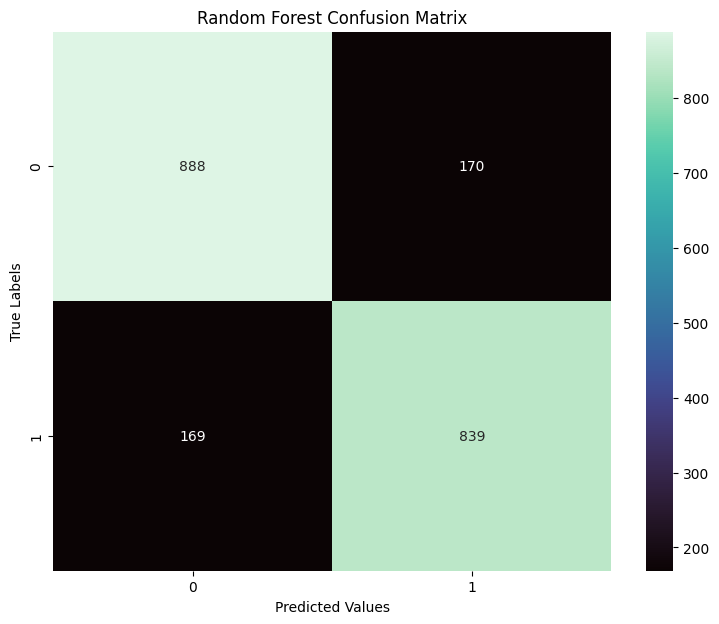

In [112]:

predictions = rf_base.predict( X_test_c )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.savefig('Rfcmatrix.png', transparent=True)

## Random Forest with Tuning Hyperparameters

In [113]:

random_grid = {'min_samples_split':[2,5,10,15,20],          # larger values means less complexity,more regularization
        'max_depth': [7,15,20,30,50],                            # larger values means more complexity,less regularization
        'min_samples_leaf': [5,10,100, 500, 1000],  # Increasing min_samples_leaf can increase regularization
        'max_leaf_nodes': [100, 700,1500,5000],            # larger values means more complexity,less regularization
        'max_features': [10,12,15,17]}                        # more features means more complexity,less regularization


estimator = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=estimator,
                                   param_distributions=random_grid,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=7)
random_search.fit(X_train_c ,
                  y_train_c   )

random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 100,
 'max_features': 12,
 'max_depth': 50}

In [114]:

grid = {'min_samples_split':[17,20,25],                 # larger values means less complexity,more regularization
        'min_samples_leaf': [9,10,11],             # Increasing min_samples_leaf can increase regularization
        'max_leaf_nodes': [1450,1500,1550],            # larger values means more complexity,less regularization
        'max_features': [15,16,17],                         # more features means more complexity,less regularization
        'ccp_alpha': [0,0.00001,0.0001]}
estimator = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=estimator,
                                   param_grid=grid,
                                   cv=5,
                                   verbose=4)
grid_search.fit(X_train_c ,
                y_train_c   )

best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.805 total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.822 total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.832 total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.801 total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=17;, score=0.824 total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=20;, score=0.805 total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_features=15, max_leaf_nodes=1450, min_samples_leaf=9, min_samples_split=20;, s

{'ccp_alpha': 0,
 'max_features': 17,
 'max_leaf_nodes': 1450,
 'min_samples_leaf': 9,
 'min_samples_split': 20}

In [115]:
rf_clf = RandomForestClassifier(**best_params)

rf_clf.fit(X_train_c ,
           y_train_c   )

RandomForestClassifier(ccp_alpha=0, max_features=17, max_leaf_nodes=1450,
                       min_samples_leaf=9, min_samples_split=20)

In [116]:
# Training Report
print('Training Report\n',classification_report(y_train_c , rf_clf.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, rf_clf.predict(X_test_c  ),digits=4))

Training Report
               precision    recall  f1-score   support

           0     0.8824    0.8843    0.8833      4106
           1     0.8855    0.8835    0.8845      4156

    accuracy                         0.8839      8262
   macro avg     0.8839    0.8839    0.8839      8262
weighted avg     0.8839    0.8839    0.8839      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8408    0.8384    0.8396      1058
           1     0.8309    0.8333    0.8321      1008

    accuracy                         0.8359      2066
   macro avg     0.8358    0.8359    0.8358      2066
weighted avg     0.8359    0.8359    0.8359      2066



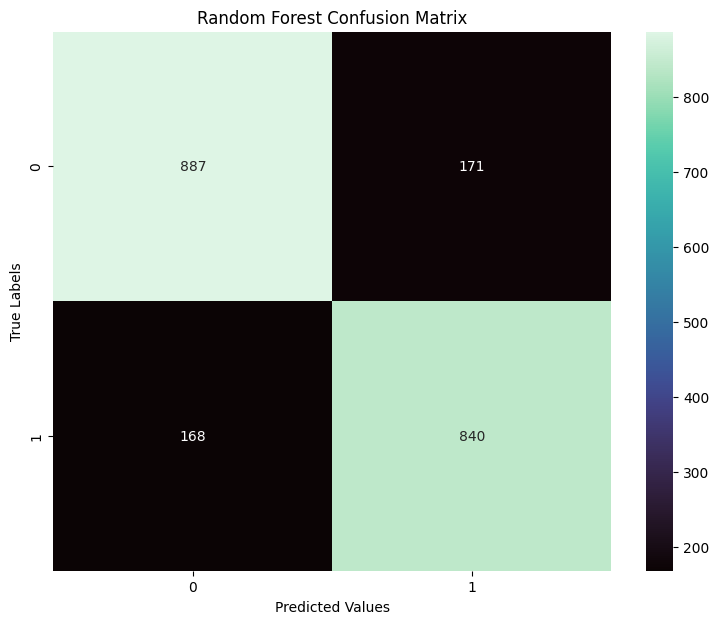

In [117]:
predictions = rf_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.savefig('Rfcmatrix2.png', transparent=True,bbox_inches='tight')


<h1 style="font-size: 2em;">XGBoost</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>:XGBoost (Extreme Gradient Boosting) is a powerful and efficient gradient boosting algorithm that excels at handling complex datasets. It often performs well in competitions due to its ability to handle interactions and non-linearities effectively.
    </li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>:High predictive accuracy; handles missing data; offers advanced hyperparameter tuning and regularization options.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>: More complex and requires careful tuning; less interpretable than simpler models.</li>
</ul>




In [118]:
base_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_c)), seed=42)
base_xgb.fit(X_train_c, y_train_c, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [119]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , base_xgb.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, base_xgb.predict(X_test_c  ),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.9717    0.9435    0.9574      4106
           1     0.9457    0.9728    0.9591      4156

    accuracy                         0.9582      8262
   macro avg     0.9587    0.9582    0.9582      8262
weighted avg     0.9586    0.9582    0.9582      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8410    0.8251    0.8330      1058
           1     0.8200    0.8363    0.8281      1008

    accuracy                         0.8306      2066
   macro avg     0.8305    0.8307    0.8306      2066
weighted avg     0.8308    0.8306    0.8306      2066



In [120]:
base_xgb.score(X_test_c  , y_test_c)

0.8305905130687319

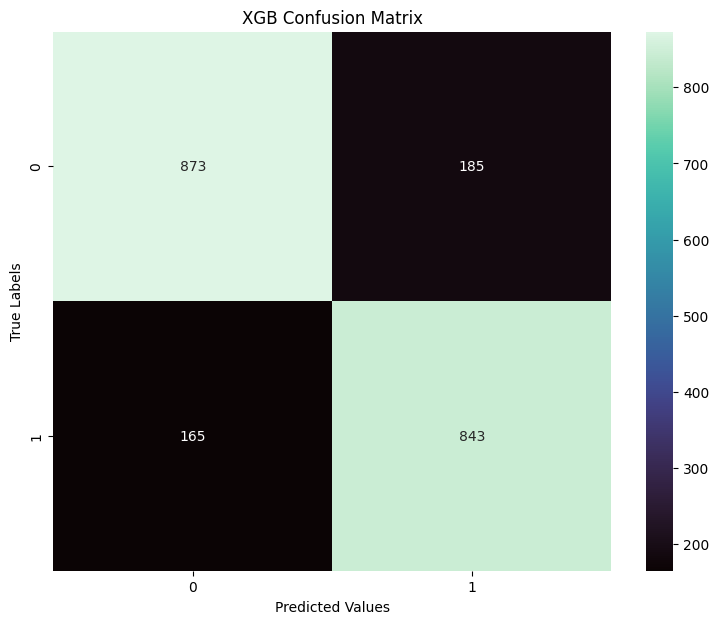

In [121]:
predictions = base_xgb.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('XGB Confusion Matrix')
plt.savefig('xgbcmatrix.png', transparent=True,bbox_inches='tight')


### Extracting Important Features

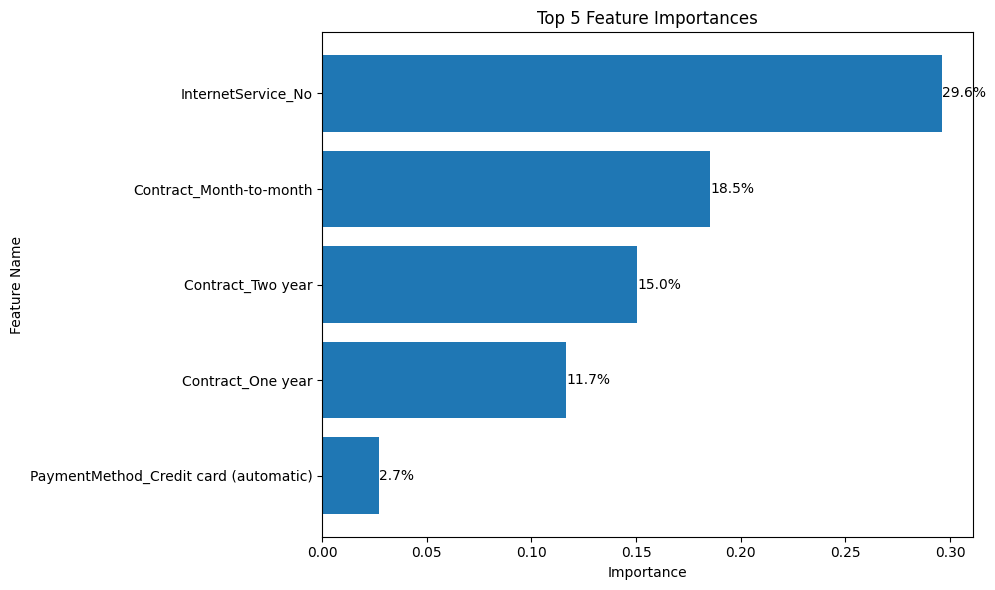

In [122]:

plt.figure(figsize=(10,6))
feature_importances = base_xgb.feature_importances_
sorted_indices = feature_importances.argsort()
sorted_importances = feature_importances[sorted_indices]
feature_names = X_train_c .columns

# the top 5 important features
top_indices = sorted_indices[-5:]
top_importances = sorted_importances[-5:]
top_feature_names = [feature_names[i] for i in top_indices]

plt.barh(range(len(top_importances)), top_importances)

for i, v in enumerate(top_importances):
    plt.text(v, i, '{:.1f}%'.format(v*100), va='center', ha='left')

plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Top 5 Feature Importances')
plt.yticks(range(len(top_importances)), top_feature_names)
plt.tight_layout()
plt.savefig('top_feat_imp.png', transparent=True)
plt.show()


## drop the least important feature

In [123]:
# prompt: delete the less important one column from train and test X

import numpy as np
# Assuming 'feature_importances' and 'X_train_c' are defined from the preceding code
# Find the index of the least important feature
least_important_feature_index = np.argmin(feature_importances)

# Get the name of the least important feature
least_important_feature_name = X_train_c.columns[least_important_feature_index]

# Delete the least important feature from X_train_c and X_test_c
X_train_c = X_train_c.drop(columns=[least_important_feature_name])
X_test_c = X_test_c.drop(columns=[least_important_feature_name])


## XGBoost with Hyperparameters Tuning
XGboost has a lot of hyperparameters, parameters that we have to manual configure and are not determined by XGBoost itself, including max_depth, the maximum tree depth, learning rate, or 'eta',gamma, the parameter that encourages pruning,and reg_lambda , the regularization parameter lambda.
So we will try to find the optimal values for these hyperparametes hopefully we can improve the accuracy with Testing Dataset.


In [124]:
f1scorer = make_scorer(f1_score, average='weighted')

### Random search

In [125]:
param_grid = {
    'max_depth':[4,6,8,10],
    'learning_rate': [0.1, 0.01,0.05,1],
    'gamma':[0,0.25,0.5,1],
    'reg_lambda':[0,0.5,1,5,10]
}

n_classes = len(np.unique(y_train_c))  # Get the number of unique classes
estimator = xgb.XGBClassifier(objective='multi:softmax',
                              num_class=n_classes,
                              subsample=0.9,
                              colsample_bytree=0.7,
                              seed=42)

random_search = RandomizedSearchCV(estimator=estimator,
                                   param_distributions=param_grid,
                                   scoring=f1scorer,
                                   n_iter=50,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train_c, y_train_c)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.7, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=2, num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.25, 0.5, 1],
                                        'learning_rate': [0.1, 0.01, 0.05, 1],
                                        'max_depth': [4, 6, 8, 10],
                                        'reg_lambda': [0, 0.5, 1, 5, 10]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [126]:
random_search.best_params_

{'reg_lambda': 0.5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.5}

### Grid search

In [127]:
param_grid = {
    'max_depth':[5,6,7,8],
    'learning_rate': [0.08,0.1,0.2],
    'gamma':[0.4,0.5,0.55,0.6],
    'reg_lambda':[0.8,1,1.2]
}

n_classes = len(np.unique(y_train_c))  # Get the number of unique classes
estimator = xgb.XGBClassifier(objective='multi:softmax',
                              num_class=n_classes,
                              subsample=0.9,
                              colsample_bytree=0.5,
                              seed=42)

grid_search = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           scoring=f1scorer,
                           cv=5,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train_c, y_train_c)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 3/5] END max_depth=30, max_features=12, max_leaf_nodes=5000, min_samples_leaf=100, min_samples_split=5;, score=0.800 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=12, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=15;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=10, max_leaf_nodes=1500, min_samples_leaf=5, min_samples_split=10;, score=0.823 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=10, max_leaf_nodes=1500, min_samples_leaf=5, min_samples_split=10;, score=0.801 total time=   0.0s
[CV 1/5] END max_depth=50, max_features=12, max_leaf_nodes=100, min_samples_leaf=1000, min_samples_split=2;, score=0.711 total time=   0.0s
[CV 2/5] END max_depth=50, max_features=12, max_leaf_nodes=100, min_samples_leaf=1000, min_samples_split=2;, score=0.708 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=10, max_leaf_nodes=1500, min_samples_leaf=100, min_samples_s

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=2,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.4, 0.5, 0.55, 0.6],
                         'learning_rate': [0.08, 0.1, 0.2],
                         'max_depth': [5, 6, 7, 8],
                         'reg_lambda': [0.8, 1, 1.2]},
             scoring=make_scorer(f1_score, average=weighted), verbose=4)

In [128]:
best_params = grid_search.best_params_

In [129]:
clf_xgb = xgb.XGBClassifier(objective='multi:softmax',
                             num_class=len(np.unique(y_train_c)),
                             **best_params,
                             subsample=0.9,
                             colsample_bytree=0.7,
                             seed=42)

eval_results = {}
patience = 10  # number of iterations to wait for improvement
no_improvement_count = 0

for i in range(100):
    clf_xgb.fit(X_train_c, y_train_c, eval_set=[(X_test_c, y_test_c)])
    eval_results[i] = clf_xgb.evals_result_
    if i > 10:
        if eval_results[i]['validation_0']['mlogloss'] > eval_results[i-10]['validation_0']['mlogloss']:
            no_improvement_count += 1
            if no_improvement_count >= patience:
                break
        else:
            no_improvement_count = 0

[0]	validation_0-mlogloss:0.65789
[1]	validation_0-mlogloss:0.62556
[2]	validation_0-mlogloss:0.59908
[3]	validation_0-mlogloss:0.57491
[4]	validation_0-mlogloss:0.55630
[5]	validation_0-mlogloss:0.53642
[6]	validation_0-mlogloss:0.51848
[7]	validation_0-mlogloss:0.50330
[8]	validation_0-mlogloss:0.49086
[9]	validation_0-mlogloss:0.47906
[10]	validation_0-mlogloss:0.46816
[11]	validation_0-mlogloss:0.45930
[12]	validation_0-mlogloss:0.45059
[13]	validation_0-mlogloss:0.44296
[14]	validation_0-mlogloss:0.43531
[15]	validation_0-mlogloss:0.42835
[16]	validation_0-mlogloss:0.42261
[17]	validation_0-mlogloss:0.41707
[18]	validation_0-mlogloss:0.41164
[19]	validation_0-mlogloss:0.40739
[20]	validation_0-mlogloss:0.40185
[21]	validation_0-mlogloss:0.39778
[22]	validation_0-mlogloss:0.39416
[23]	validation_0-mlogloss:0.39077
[24]	validation_0-mlogloss:0.38702
[25]	validation_0-mlogloss:0.38450
[26]	validation_0-mlogloss:0.38187
[27]	validation_0-mlogloss:0.37921
[28]	validation_0-mlogloss:0.3

In [130]:
# Training Report
print('Training Report\n',classification_report(y_train_c , clf_xgb.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, clf_xgb.predict(X_test_c  ),digits=4))



Training Report
               precision    recall  f1-score   support

           0     0.9146    0.8921    0.9032      4106
           1     0.8959    0.9177    0.9067      4156

    accuracy                         0.9050      8262
   macro avg     0.9053    0.9049    0.9050      8262
weighted avg     0.9052    0.9050    0.9050      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8496    0.8384    0.8440      1058
           1     0.8327    0.8442    0.8384      1008

    accuracy                         0.8412      2066
   macro avg     0.8411    0.8413    0.8412      2066
weighted avg     0.8414    0.8412    0.8413      2066



Text(83.22222222222221, 0.5, 'True Labels')

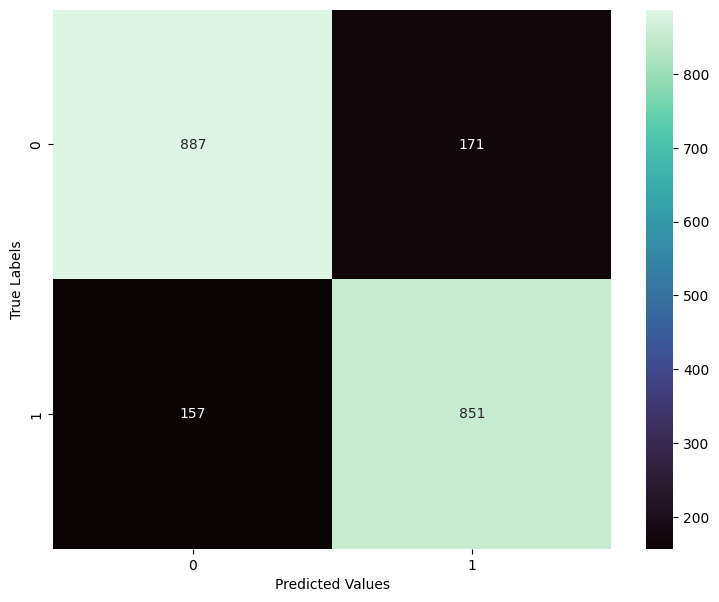

In [131]:

predictions =clf_xgb.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(9, 7))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')

### Hyperparamter Tuning Using Optuna

In [132]:

def objective(trial):

    # Define the search space ranges for hyperparameters
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 4, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 2.0),
        'gamma': trial.suggest_float('gamma', 0.0, 3.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 5),
        'n_estimators': trial.suggest_int('n_estimators', 800, 1000),
        'subsample': trial.suggest_float('subsample', 0.3,0.9),
        'colsample_bytree':trial.suggest_float('colsample_bytree', 0.3,0.9),
        'min_child_weight': trial.suggest_int('min_child_weight', 4, 21),

    }

    estimator = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(np.unique(y_train_c)),
        booster = 'gbtree',
        grow_policy = 'depthwise',
        **param_grid,
        seed=42
    )


    f1scorer = make_scorer(f1_score, average='weighted')

    scores = cross_val_score(estimator, X_train_c , y_train_c   , cv=5, scoring=f1scorer, n_jobs=-1)


    return scores.mean()

In [133]:
# Create a study object and optimize the objective function using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)


[I 2024-09-22 21:04:22,349] A new study created in memory with name: no-name-02adcd26-cf88-49da-9324-b732b795c002
[I 2024-09-22 21:04:28,496] Trial 0 finished with value: 0.8274729802224323 and parameters: {'max_depth': 7, 'learning_rate': 1.2073495943536459, 'gamma': 0.8387660319514932, 'reg_lambda': 0.04184783842420606, 'n_estimators': 997, 'subsample': 0.6388998177951627, 'colsample_bytree': 0.7645498512260926, 'min_child_weight': 9}. Best is trial 0 with value: 0.8274729802224323.
[I 2024-09-22 21:04:37,334] Trial 1 finished with value: 0.8309537705464878 and parameters: {'max_depth': 9, 'learning_rate': 0.00011431140623093398, 'gamma': 2.858332001705697, 'reg_lambda': 0.006209328944447224, 'n_estimators': 858, 'subsample': 0.4007183313220964, 'colsample_bytree': 0.7960397047166289, 'min_child_weight': 15}. Best is trial 1 with value: 0.8309537705464878.
[I 2024-09-22 21:04:47,774] Trial 2 finished with value: 0.8324128464487487 and parameters: {'max_depth': 14, 'learning_rate': 0.

In [134]:
best_params = study.best_params
print("Best parameters found:", best_params)


Best parameters found: {'max_depth': 14, 'learning_rate': 0.012762080767390847, 'gamma': 0.47750919954691784, 'reg_lambda': 0.0066056115470073794, 'n_estimators': 983, 'subsample': 0.8518573855450575, 'colsample_bytree': 0.802380464701581, 'min_child_weight': 4}


In [135]:
xgb_clf =  xgb.XGBClassifier(objective='multi:softmax',
                             num_class=len(np.unique(y_train_c)),
                                **best_params,
                                 grow_policy = 'depthwise',
                                 booster = 'gbtree',
                                 seed=42)

eval_results = {}
patience = 10  # number of iterations to wait for improvement
no_improvement_count = 0

for i in range(50):
    xgb_clf.fit(X_train_c, y_train_c, eval_set=[(X_test_c, y_test_c)])
    eval_results[i] = xgb_clf.evals_result_
    if i > 10:
        if eval_results[i]['validation_0']['mlogloss'] > eval_results[i-10]['validation_0']['mlogloss']:
            no_improvement_count += 1
            if no_improvement_count >= patience:
                break
        else:
            no_improvement_count = 0

[0]	validation_0-mlogloss:0.68676
[1]	validation_0-mlogloss:0.68015
[2]	validation_0-mlogloss:0.67405
[3]	validation_0-mlogloss:0.66792
[4]	validation_0-mlogloss:0.66227
[5]	validation_0-mlogloss:0.65627
[6]	validation_0-mlogloss:0.65046
[7]	validation_0-mlogloss:0.64492
[8]	validation_0-mlogloss:0.63941
[9]	validation_0-mlogloss:0.63406
[10]	validation_0-mlogloss:0.62864
[11]	validation_0-mlogloss:0.62349
[12]	validation_0-mlogloss:0.61859
[13]	validation_0-mlogloss:0.61384
[14]	validation_0-mlogloss:0.60902
[15]	validation_0-mlogloss:0.60456
[16]	validation_0-mlogloss:0.60010
[17]	validation_0-mlogloss:0.59543
[18]	validation_0-mlogloss:0.59132
[19]	validation_0-mlogloss:0.58719
[20]	validation_0-mlogloss:0.58290
[21]	validation_0-mlogloss:0.57885
[22]	validation_0-mlogloss:0.57457
[23]	validation_0-mlogloss:0.57062
[24]	validation_0-mlogloss:0.56693
[25]	validation_0-mlogloss:0.56332
[26]	validation_0-mlogloss:0.55976
[27]	validation_0-mlogloss:0.55585
[28]	validation_0-mlogloss:0.5

In [136]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , xgb_clf.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, xgb_clf.predict(X_test_c),digits=4))



Training Report
               precision    recall  f1-score   support

           0     0.9428    0.9313    0.9370      4106
           1     0.9330    0.9442    0.9385      4156

    accuracy                         0.9378      8262
   macro avg     0.9379    0.9377    0.9378      8262
weighted avg     0.9378    0.9378    0.9378      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8459    0.8355    0.8407      1058
           1     0.8296    0.8403    0.8349      1008

    accuracy                         0.8379      2066
   macro avg     0.8378    0.8379    0.8378      2066
weighted avg     0.8380    0.8379    0.8379      2066



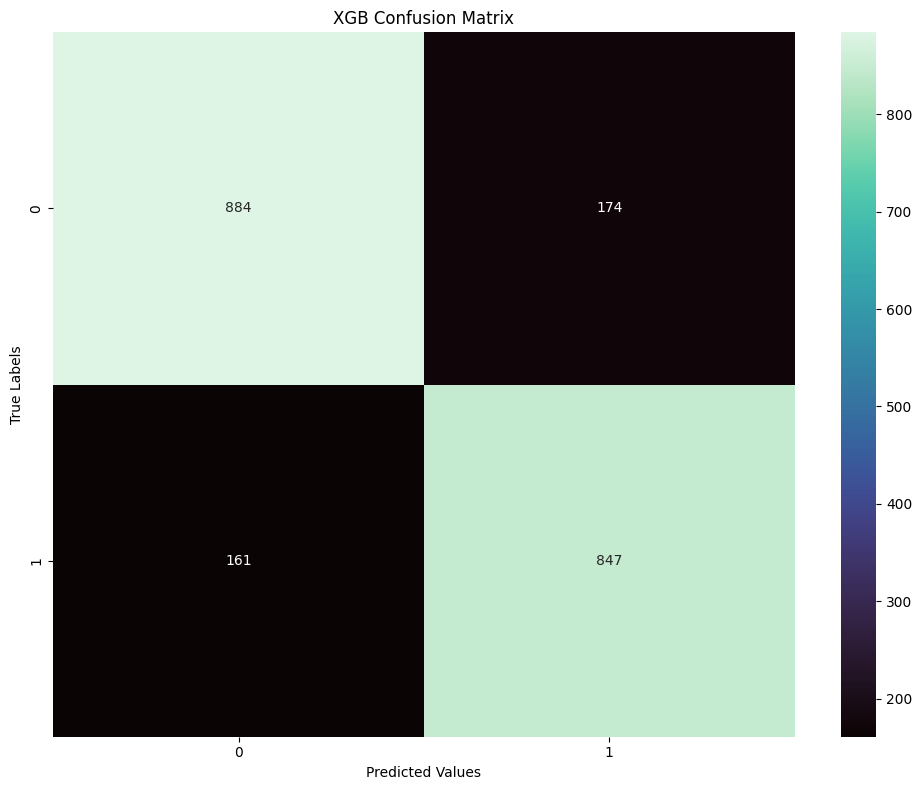

In [137]:
predictions = xgb_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('XGB Confusion Matrix')
plt.tight_layout()
plt.savefig('confusionmatrix.png', transparent=True)


Overweight level I and overweight level II classes are often confused with each other, due to their proximity in terms of BMI.

In [138]:
one_tree_params = {'max_depth': 14,
 'learning_rate': 0.018163693269578122,
 'gamma': 0.7487372044763971,
 'reg_lambda': 0.47329556316341825,
 'n_estimators': 1,         # build one tree only
 'subsample': 0.7654090048187816,
 'colsample_bytree': 0.4153476791936009,
 'min_child_weight': 14}


In [139]:

onetree_xgb =  xgb.XGBClassifier(objective='multi:softmax',
                                 num_class=len(np.unique(y_train_c)),
                                **one_tree_params,
                                 seed=42)

eval_results = {}
patience = 10  # number of iterations to wait for improvement
no_improvement_count = 0

for i in range(50):
    onetree_xgb.fit(X_train_c, y_train_c, eval_set=[(X_test_c, y_test_c)])
    eval_results[i] = onetree_xgb.evals_result_
    if i > 10:
        if eval_results[i]['validation_0']['mlogloss'] > eval_results[i-10]['validation_0']['mlogloss']:
            no_improvement_count += 1
            if no_improvement_count >= patience:
                break
        else:
            no_improvement_count = 0

[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation_0-mlogloss:0.68558
[0]	validation

In [140]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [141]:
conda install python-graphviz

Retrieving notices: ...working... Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x78d188a21330>: Failed to resolve 'conda.anaconda.org' ([Errno -3] Temporary failure in name resolution)")': /nvidia/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x78d188a21ab0>: Failed to resolve 'conda.anaconda.org' ([Errno -3] Temporary failure in name resolution)")': /nodefaults/notices.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x78d188a22110>: Failed to resolve 'conda.anaconda.org' ([Errno -3] Temporary failure in name resolution)")': /rapidsai/notices.json

Retrying (Retry(total=2, connect=None, rea

weight:  {'tenure': 23.0, 'MultipleLines': 5.0, 'OnlineSecurity': 2.0, 'DeviceProtection': 3.0, 'TechSupport': 3.0, 'StreamingTV': 6.0, 'StreamingMovies': 3.0, 'MonthlyCharges': 30.0, 'InternetService_DSL': 13.0, 'InternetService_No': 2.0, 'Contract_Month-to-month': 1.0, 'Contract_One year': 3.0, 'PaymentMethod_Bank transfer (automatic)': 7.0, 'PaymentMethod_Credit card (automatic)': 4.0}
gain:  {'tenure': 9.621053695678711, 'MultipleLines': 6.5846147537231445, 'OnlineSecurity': 134.5931854248047, 'DeviceProtection': 5.7844696044921875, 'TechSupport': 179.032470703125, 'StreamingTV': 2.41827130317688, 'StreamingMovies': 1.2973536252975464, 'MonthlyCharges': 15.950089454650879, 'InternetService_DSL': 17.185579299926758, 'InternetService_No': 89.61476135253906, 'Contract_Month-to-month': 602.08935546875, 'Contract_One year': 37.925048828125, 'PaymentMethod_Bank transfer (automatic)': 13.875142097473145, 'PaymentMethod_Credit card (automatic)': 19.163253784179688}
cover:  {'tenure': 240.9

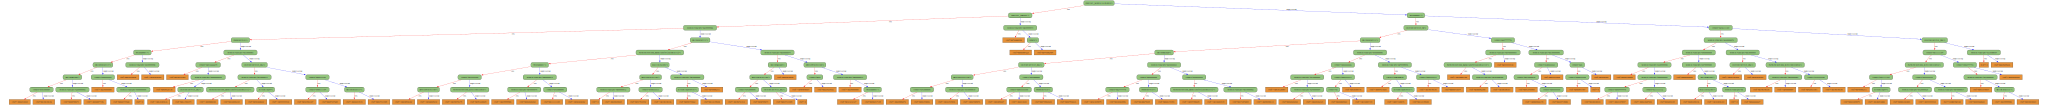

In [142]:
bst = onetree_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
'style': 'filled, rounded',
'fillcolor': '#93c47d'}
leaf_params = {'shape': 'box',
'style': 'filled',
'fillcolor': '#e69138'}

xgb_graph  = xgb.to_graphviz(clf_xgb, num_trees=0, size="5,5",
condition_node_params=node_params,
leaf_node_params=leaf_params)
xgb_graph.render("xgb_graph", format="png", cleanup=True)
xgb_graph

### In the XGBoost Tree, we have in each node:

- The feature (column name) and the threshold for splitting the observations. For example, in the tree's root node, we use
Weight to split the observations. All observations with Weight < -1.2 (scaled) go to the
left and all observations with Weight>= -1.2 go to the right.
- Each branch either says yes or no and some also say missing.
-  yes and no refer to whether the threshold in the node above it is true or not. If so, then yes, if not, then no.
- leaf tells us the raw score output value  for each leaf ,until it further processed into probabilities by softmax.


## Voting Classifier

In [143]:
voting_clf = VotingClassifier(

    estimators = [
            ('Model_1_LR', lr_clf),
            ('Model_2_RF', rf_clf),
            ('Model_3_XGBoost', xgb_clf)
            ],
            voting='hard',
            verbose =2
            )

voting_clf.fit(X_train_c ,y_train_c   )

[Voting] ............... (1 of 3) Processing Model_1_LR, total=   0.1s
[Voting] ............... (2 of 3) Processing Model_2_RF, total=   1.3s
[Voting] .......... (3 of 3) Processing Model_3_XGBoost, total=   2.9s


VotingClassifier(estimators=[('Model_1_LR',
                              LogisticRegression(C=5, max_iter=500,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Model_2_RF',
                              RandomForestClassifier(ccp_alpha=0,
                                                     max_features=17,
                                                     max_leaf_nodes=1450,
                                                     min_samples_leaf=9,
                                                     min_samples_split=20)),
                             ('Model_3_XGBoost',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            col...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.012762080767390847,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=14,
                                            max_leaves=None, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=983, n_jobs=None,
                                            num_class=2, num_parallel_tree=None, ...))],
                 verbose=2)

In [144]:

# Training Report
print('Training Report\n',classification_report(y_train_c    , voting_clf.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, voting_clf.predict(X_test_c  ),digits=4))


Training Report
               precision    recall  f1-score   support

           0     0.8972    0.8926    0.8949      4106
           1     0.8944    0.8989    0.8967      4156

    accuracy                         0.8958      8262
   macro avg     0.8958    0.8958    0.8958      8262
weighted avg     0.8958    0.8958    0.8958      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8486    0.8422    0.8454      1058
           1     0.8356    0.8423    0.8389      1008

    accuracy                         0.8422      2066
   macro avg     0.8421    0.8422    0.8421      2066
weighted avg     0.8423    0.8422    0.8422      2066



Text(0.5, 1.0, 'Voting classifier Confusion Matrix')

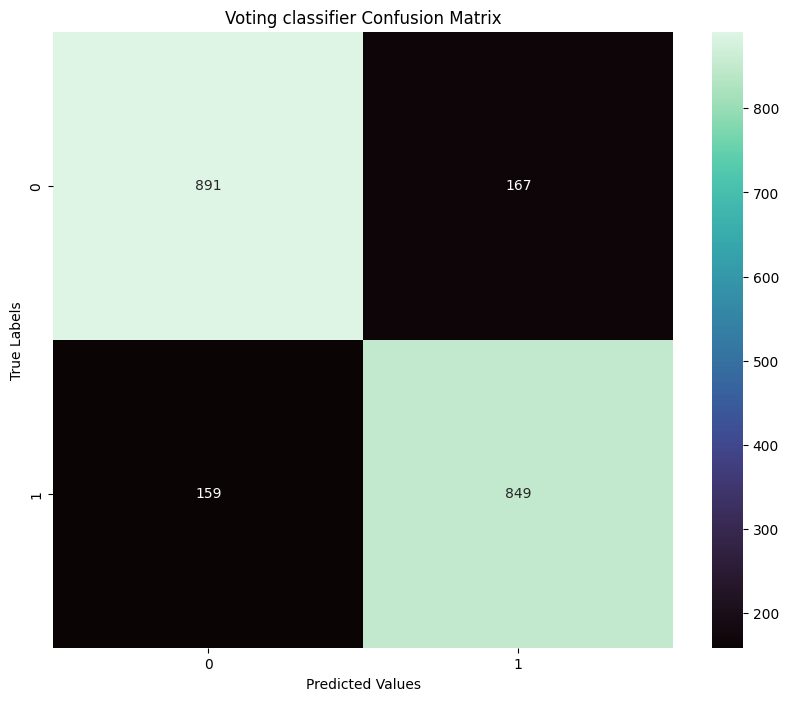

In [145]:
predictions = voting_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Voting classifier Confusion Matrix')


In [146]:

voting_clf = VotingClassifier(

    estimators = [
            ('Model_1_LR', lr_clf),
            ('Model_2_RF', rf_clf),
            ('Model_3_XGBoost', xgb_clf)
            ],
            voting='soft',
            verbose =2
            )

voting_clf.fit(X_train_c ,y_train_c   )


[Voting] ............... (1 of 3) Processing Model_1_LR, total=   0.1s
[Voting] ............... (2 of 3) Processing Model_2_RF, total=   1.3s
[Voting] .......... (3 of 3) Processing Model_3_XGBoost, total=   2.9s


VotingClassifier(estimators=[('Model_1_LR',
                              LogisticRegression(C=5, max_iter=500,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Model_2_RF',
                              RandomForestClassifier(ccp_alpha=0,
                                                     max_features=17,
                                                     max_leaf_nodes=1450,
                                                     min_samples_leaf=9,
                                                     min_samples_split=20)),
                             ('Model_3_XGBoost',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            col...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.012762080767390847,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=14,
                                            max_leaves=None, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=983, n_jobs=None,
                                            num_class=2, num_parallel_tree=None, ...))],
                 verbose=2, voting='soft')

In [147]:
# Training Report
print('Training Report\n',classification_report(y_train_c    , voting_clf.predict(X_train_c ),digits=4))
print('_'*60)
# Testing Report
print('Testing Report\n',classification_report( y_test_c, voting_clf.predict(X_test_c  ),digits=4))



Training Report
               precision    recall  f1-score   support

           0     0.8955    0.8950    0.8952      4106
           1     0.8963    0.8968    0.8966      4156

    accuracy                         0.8959      8262
   macro avg     0.8959    0.8959    0.8959      8262
weighted avg     0.8959    0.8959    0.8959      8262

____________________________________________________________
Testing Report
               precision    recall  f1-score   support

           0     0.8544    0.8488    0.8516      1058
           1     0.8424    0.8482    0.8453      1008

    accuracy                         0.8485      2066
   macro avg     0.8484    0.8485    0.8484      2066
weighted avg     0.8485    0.8485    0.8485      2066



Text(0.5, 1.0, 'Voting classifier Confusion Matrix')

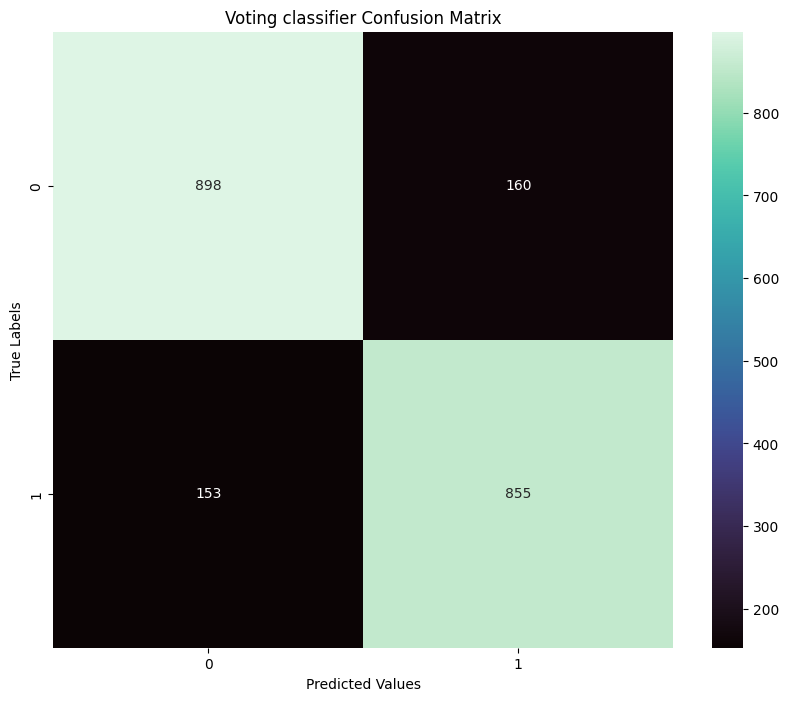

In [148]:
predictions = voting_clf.predict(X_test_c  )
cm = confusion_matrix(y_pred=predictions,y_true=y_test_c)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm,fmt='d',annot=True,cmap='mako')
plt.xlabel('Predicted Values')
plt.ylabel('True Labels')
plt.title('Voting classifier Confusion Matrix')


## We Will CHOOSE XGBOOST as our final model

- Logistic Regression:
This model achieves decent precision, recall, and F1-score, indicating balanced performance across the classes.
The accuracy is also consistent with the F1-score, suggesting reliable overall performance.

- Decision Trees:
Decision Trees show slightly lower performance compared to Logistic Regression in terms of precision, recall, and F1-score.
However, the accuracy is still high, indicating effective classification by the model.

- Random Forest:

Random Forest performs better than Decision Trees, with higher precision, recall, and F1-score, indicating improved performance in handling the dataset's complexity.
The accuracy is also higher, suggesting better overall performance compared to Decision Trees.

- XGBoost:

XGBoost demonstrates the highest precision, recall, and F1-score among all models, indicating superior performance in classifying obesity levels.
The accuracy is also the highest, suggesting that XGBoost provides the most reliable predictions compared to other models.

- Voting Classifier:

The Voting Classifier achieves similar performance to XGBoost in terms of precision, recall, F1-score, and accuracy.
This ensemble model combines multiple base models, potentially enhancing performance through diversity in predictions.


<h1 style="text-align: center;font-size: 5em;"> Unsupervised Algorithms </h1>


<h1 style="font-size: 2em;">K-Means Clustering</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>: K-Means Clustering is a simple and effective unsupervised learning algorithm used for partitioning data into distinct clusters. It works well when you have a large number of observations and need to quickly identify underlying patterns or customer segments.
    </li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>: Fast and scalable; easy to implement and interpret; works well with large datasets; effective for spherical or well-separated clusters.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>: Requires you to predefine the number of clusters (k); sensitive to initial starting points; struggles with non-spherical or overlapping clusters; can converge to local minima.</li>
</ul>

## K-Means With Data

In [149]:
x=df[['MonthlyCharges','tenure']]

In [150]:
inter=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,random_state=42,n_init=10)
    km.fit(x)
    inter.append(km.inertia_)
inter

[1984.9084894537855,
 1022.9306775147819,
 639.7028779091106,
 402.7584653237526,
 308.91581595112547,
 262.41845616695696,
 223.01214368692135,
 193.24415829985446,
 168.4971417013291,
 143.90913649761066,
 126.84339023796278,
 114.78247948414416,
 104.86501740282375,
 96.07959031748489,
 87.69342874043284,
 81.9061108278556,
 75.840631591372,
 70.40380072827332,
 66.70247231788163]

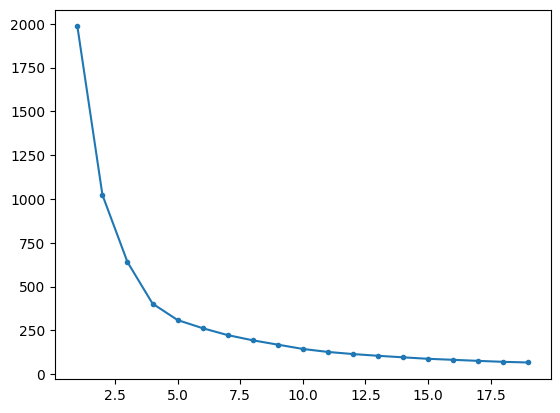

In [151]:
plt.plot(range(1,20),inter,marker='.')

To determine the optimal number of clusters, we typically look for the "elbow point" where the WCSS starts to decrease more slowly, forming a noticeable bend in the curve. Based on the plot, this elbow seems to occur around **4 clusters**. After that point, the rate of reduction in WCSS becomes less significant.

Thus, we should consider **using 4 clusters** for K-Means clustering model.

In [152]:
km=KMeans(n_clusters=4,n_init=10,random_state=42)
km.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

### Evaluation

In [153]:
pred=km.fit_predict(x)

In [154]:
silhouette_score(x, pred)

0.48437121398879346

### Results Visualization

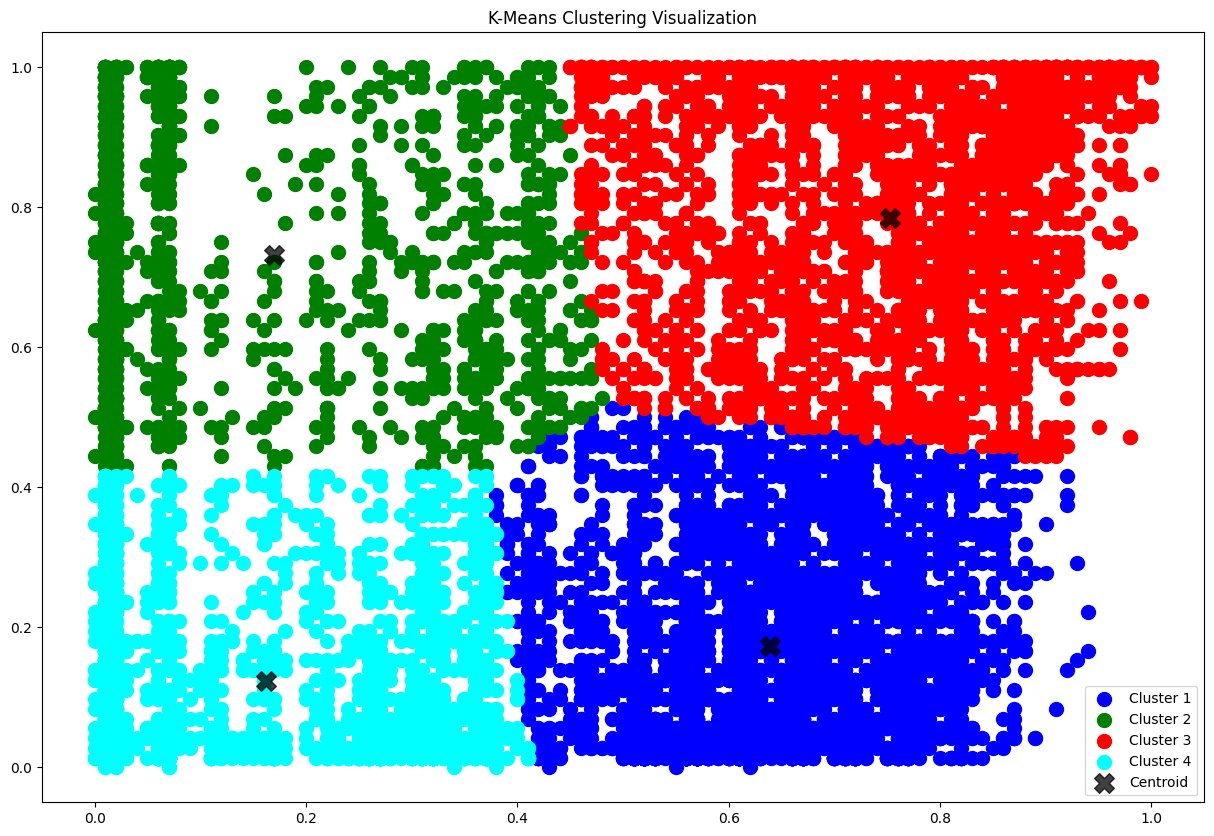

In [155]:
plt.figure(figsize=(15,10))
plt.scatter(x[pred == 0]['MonthlyCharges'], X[pred == 0]['tenure'], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x[pred == 1]['MonthlyCharges'], X[pred == 1]['tenure'], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x[pred == 2]['MonthlyCharges'], X[pred == 2]['tenure'], s = 100, c = 'red', label = 'Cluster 3') 
plt.scatter(x[pred == 3]['MonthlyCharges'], X[pred == 3]['tenure'], s = 100, c = 'cyan', label = 'Cluster 4') 
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75,label = 'Centroid', marker='X')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

In [156]:
df['cluster']=pred

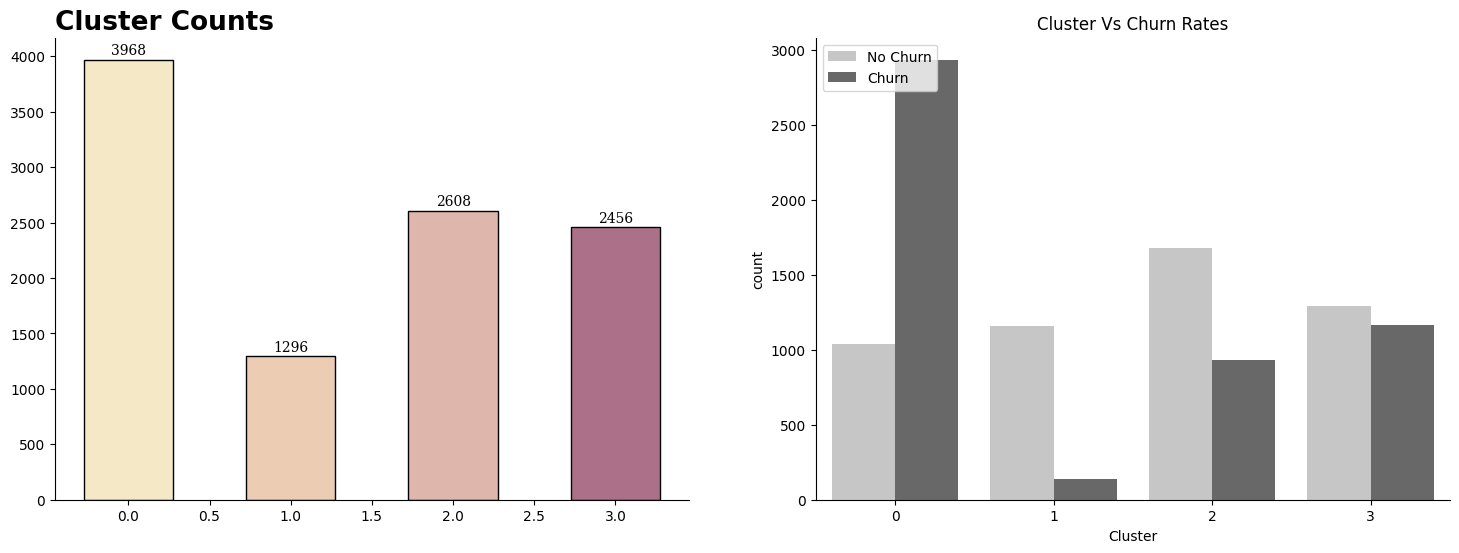

In [157]:
# Cluster Counts
df['Cluster'] = km.labels_
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = df['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sns.countplot(x='Cluster', hue="Churn", palette="Greys", data=df)
sns.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()
    

### Insights
Clusters 0 and 1 have a higher Churn Rate compared to Cluster 1 and 3

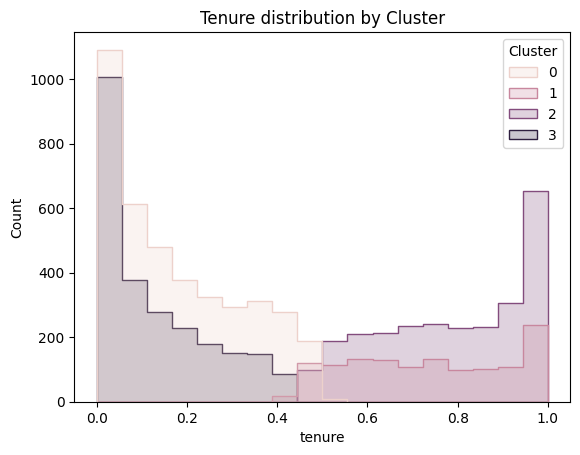

In [158]:
sns.histplot(data=df, x="tenure", hue="Cluster", element="step")
plt.title('Tenure distribution by Cluster')
plt.show()

### Insights

Cluster 0 and 1 have shorter tenure compared to the other clusters

In [159]:
df_cluster_gp = df[df['Churn']==1].groupby('cluster')
print(df_cluster_gp[['tenure','MonthlyCharges']].mean())

           tenure  MonthlyCharges
cluster                          
0        0.149553        0.648953
1        0.644239        0.283778
2        0.712152        0.780311
3        0.079268        0.197742


In [160]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn',
       'cluster', 'Cluster'],
      dtype='object')

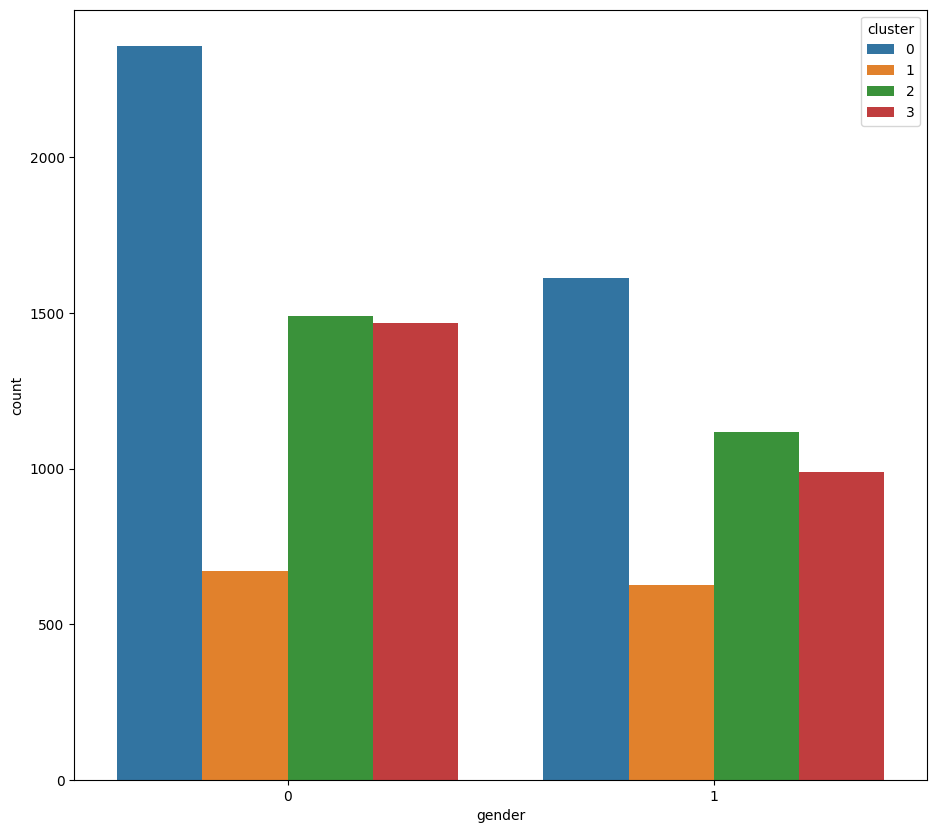

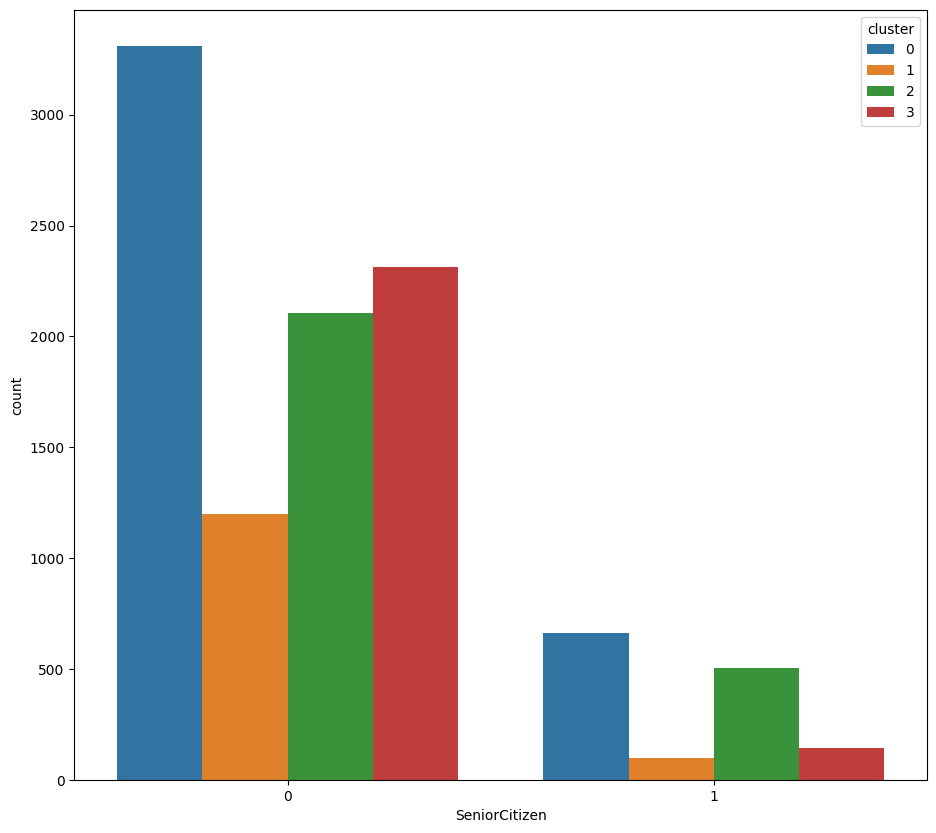

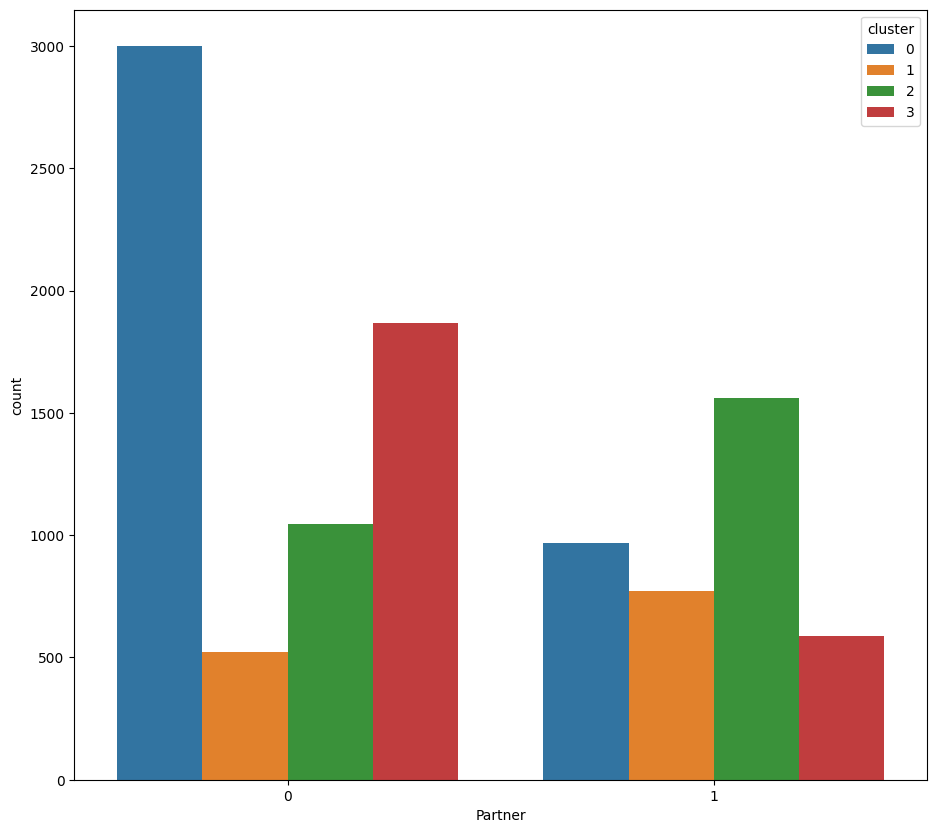

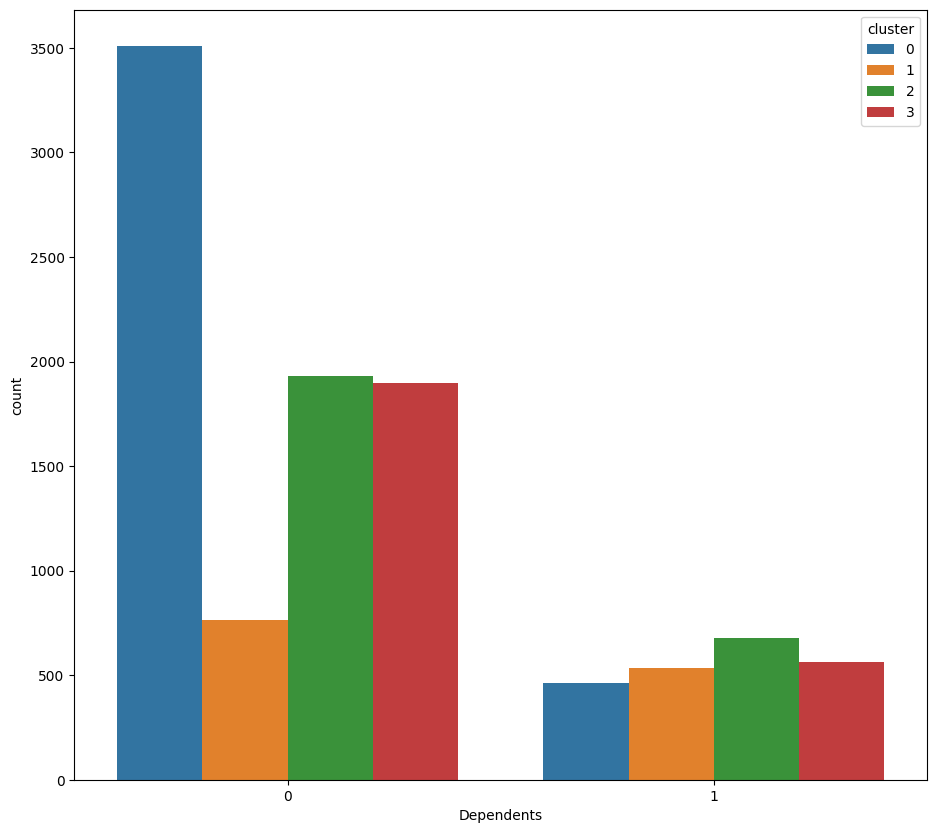

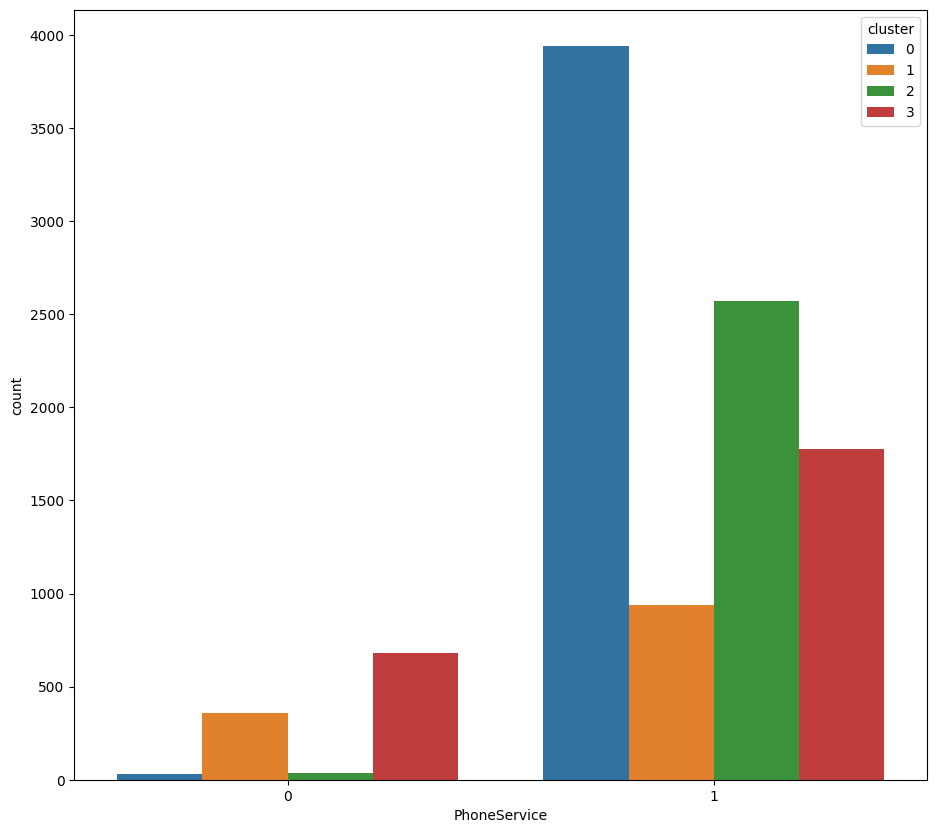

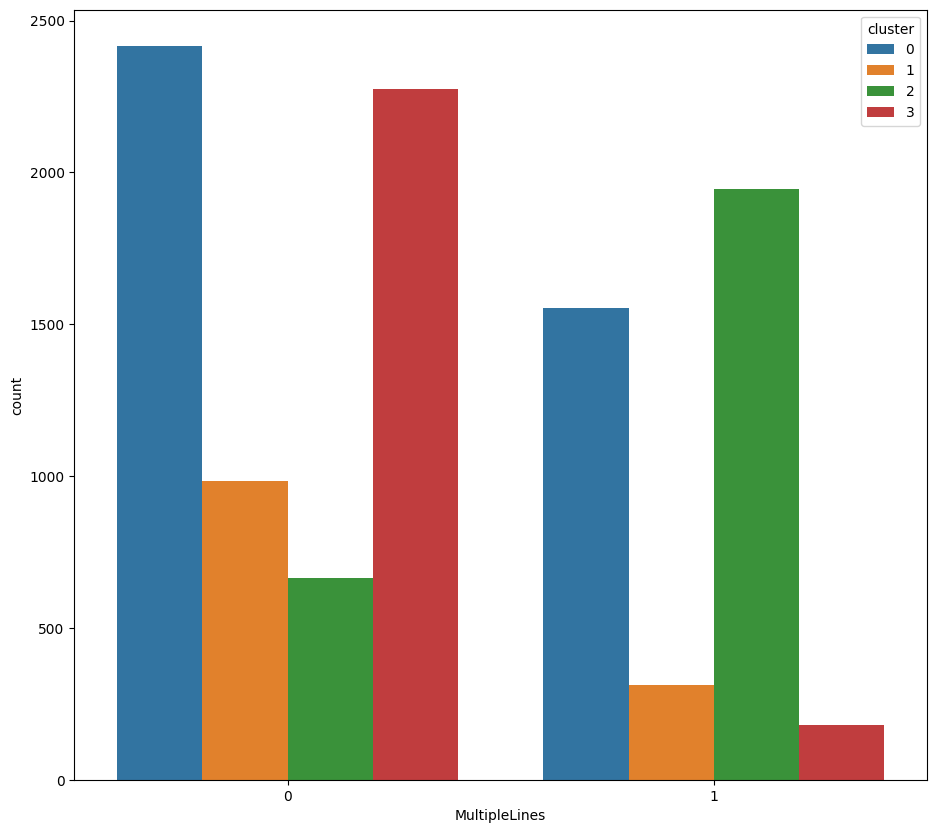

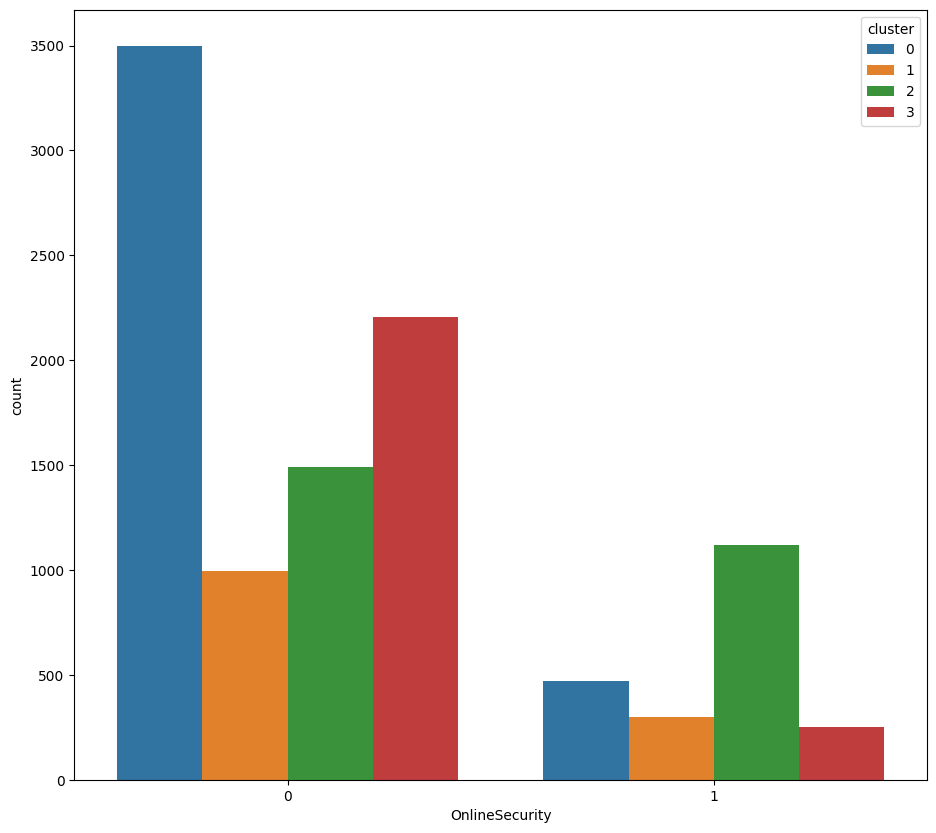

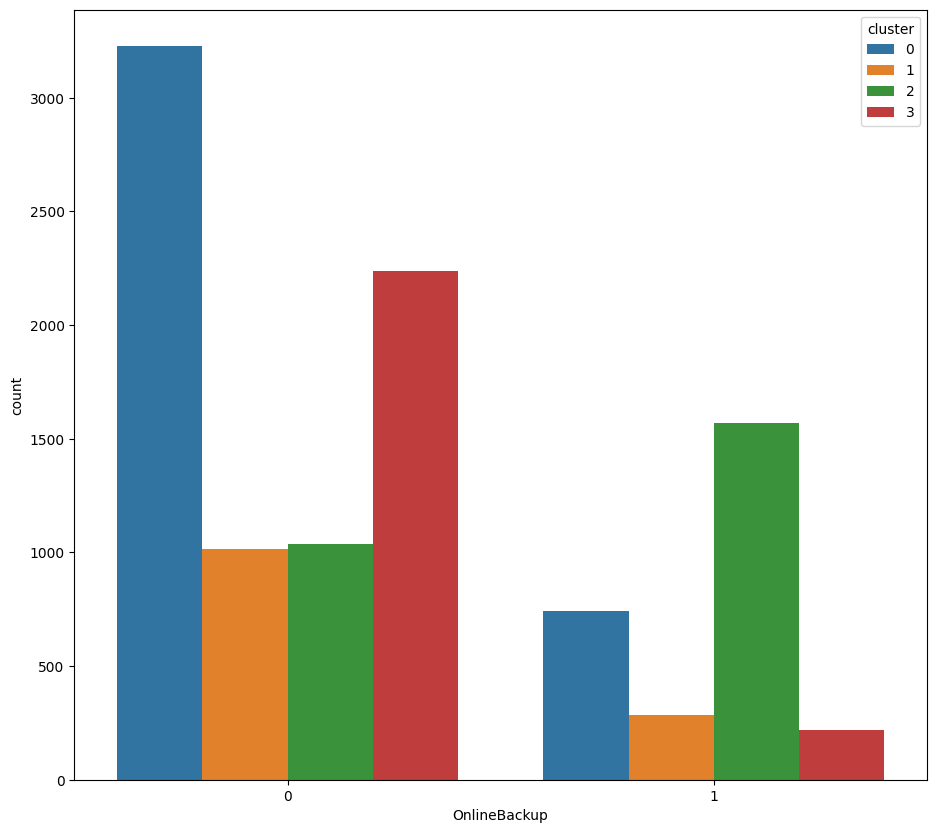

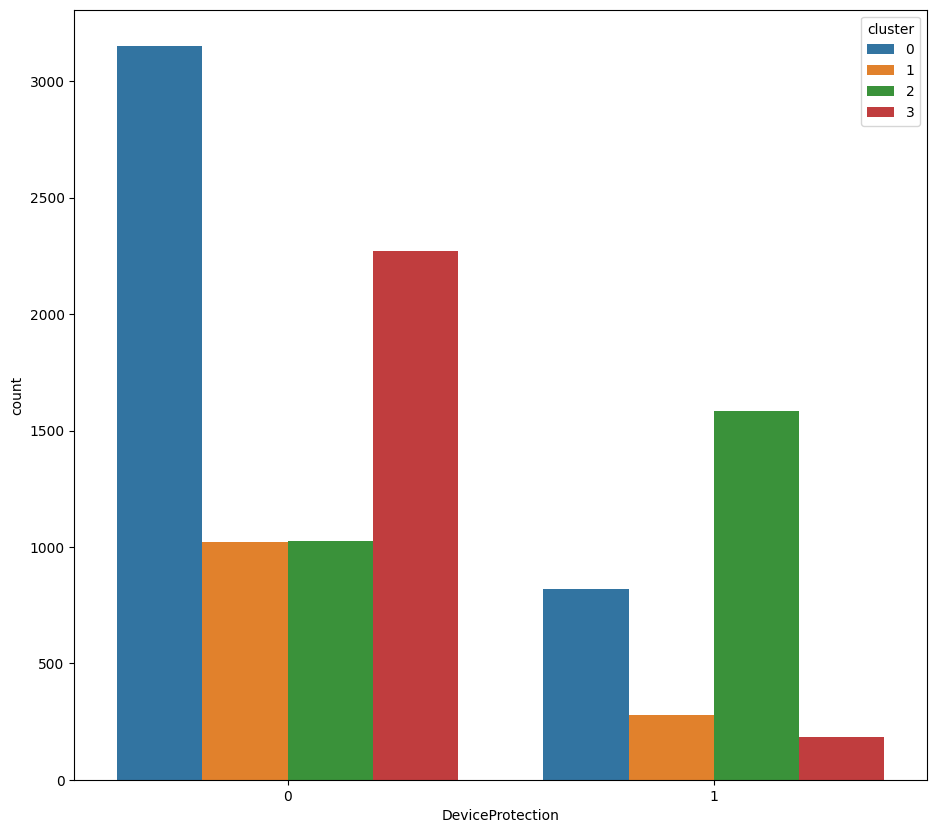

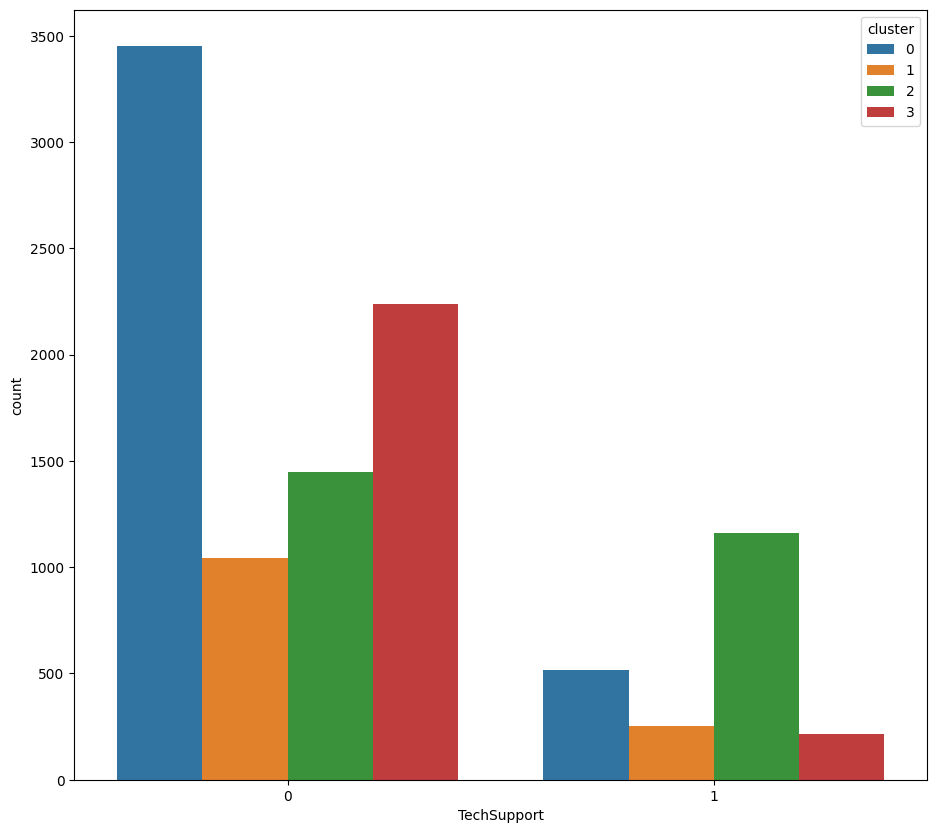

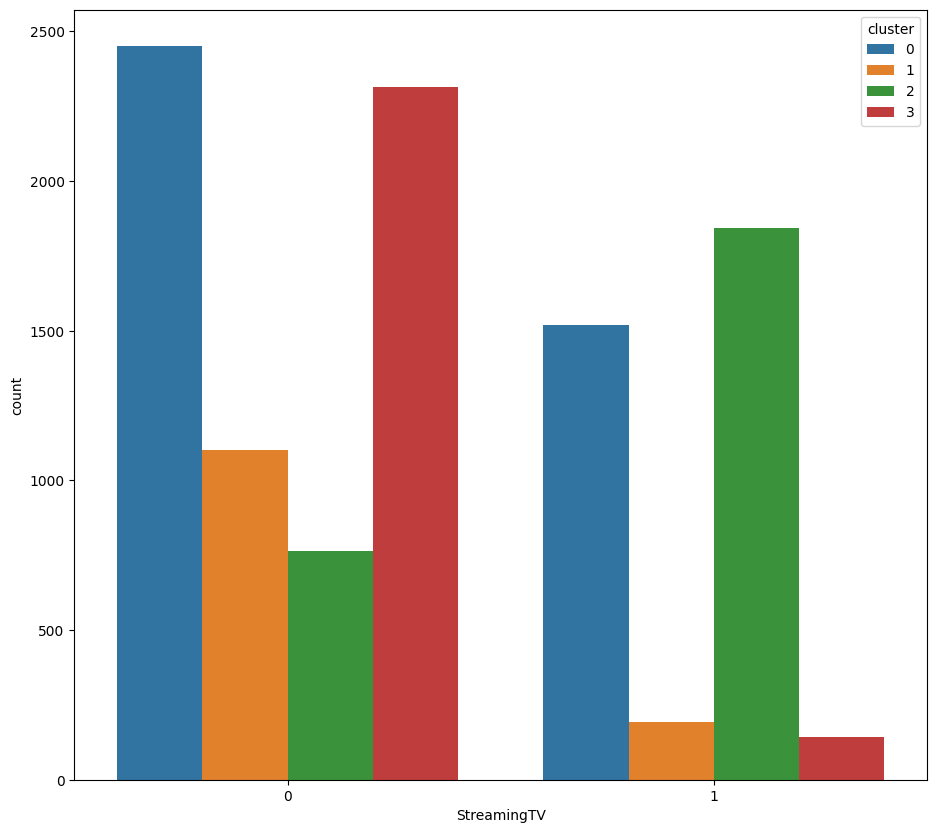

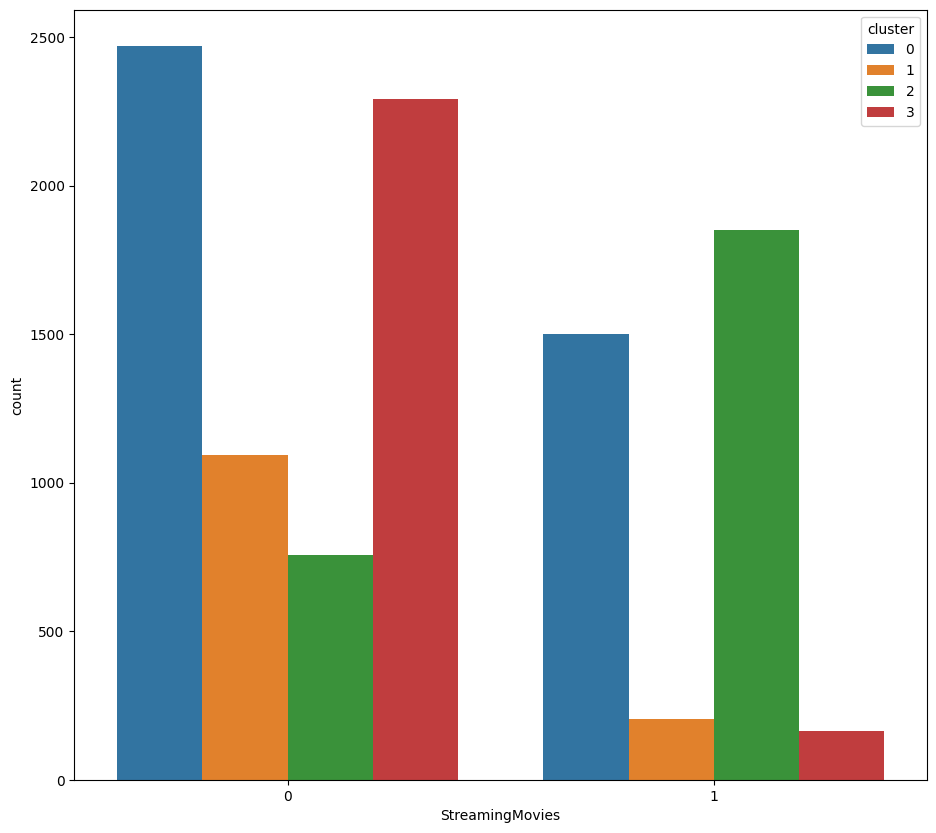

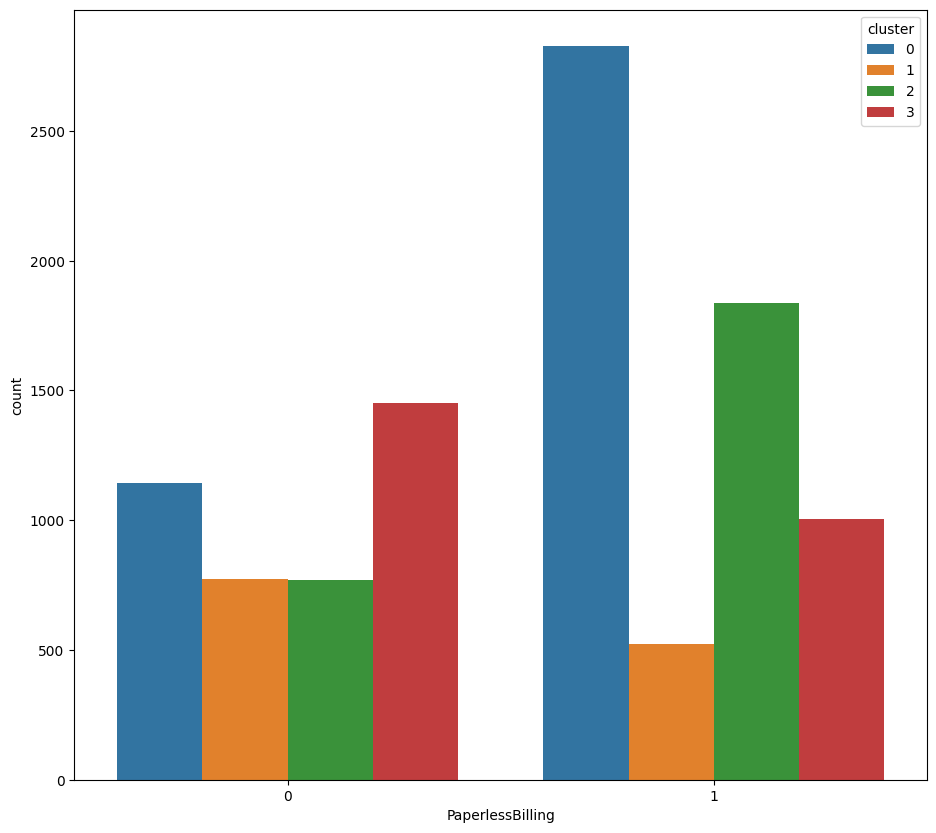

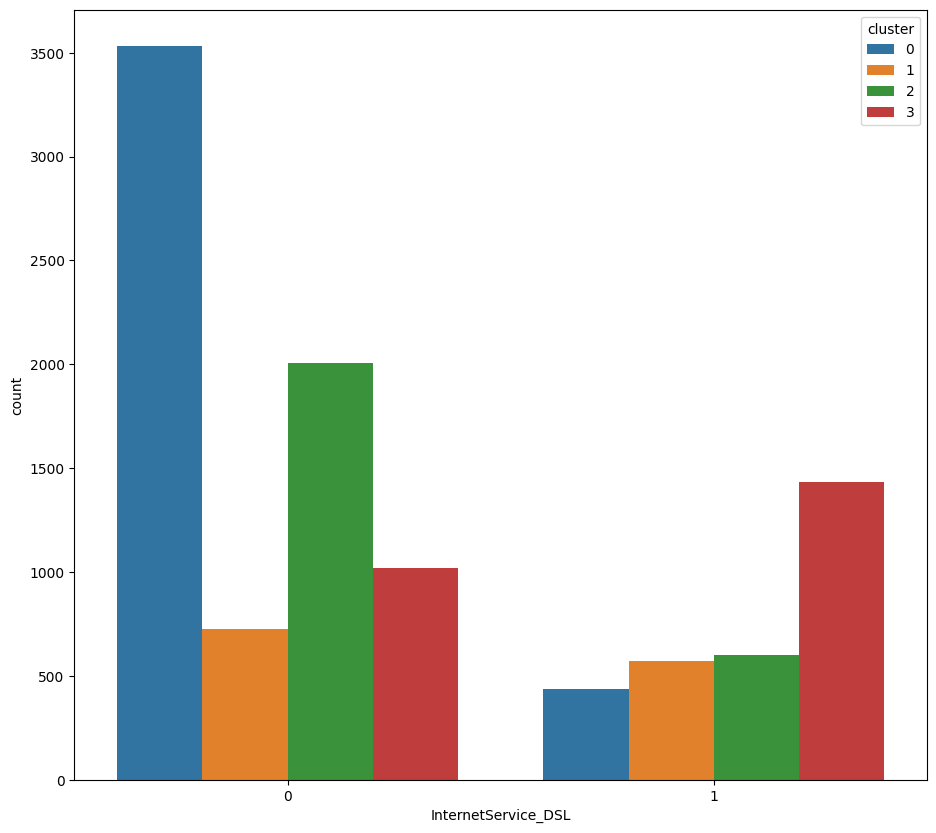

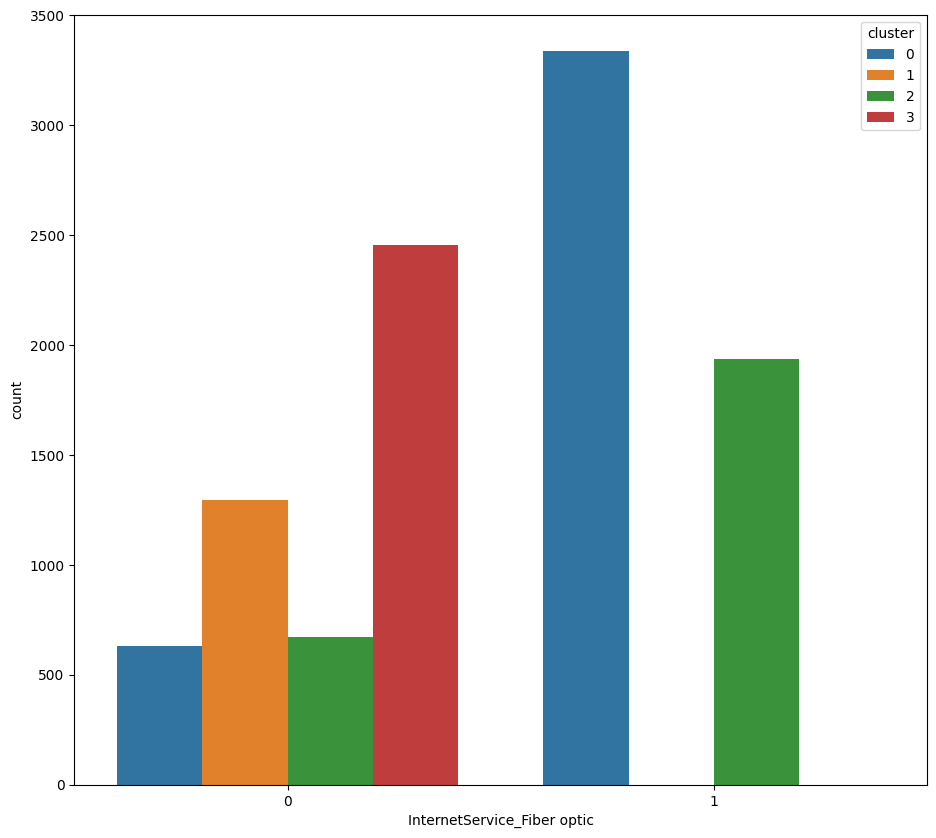

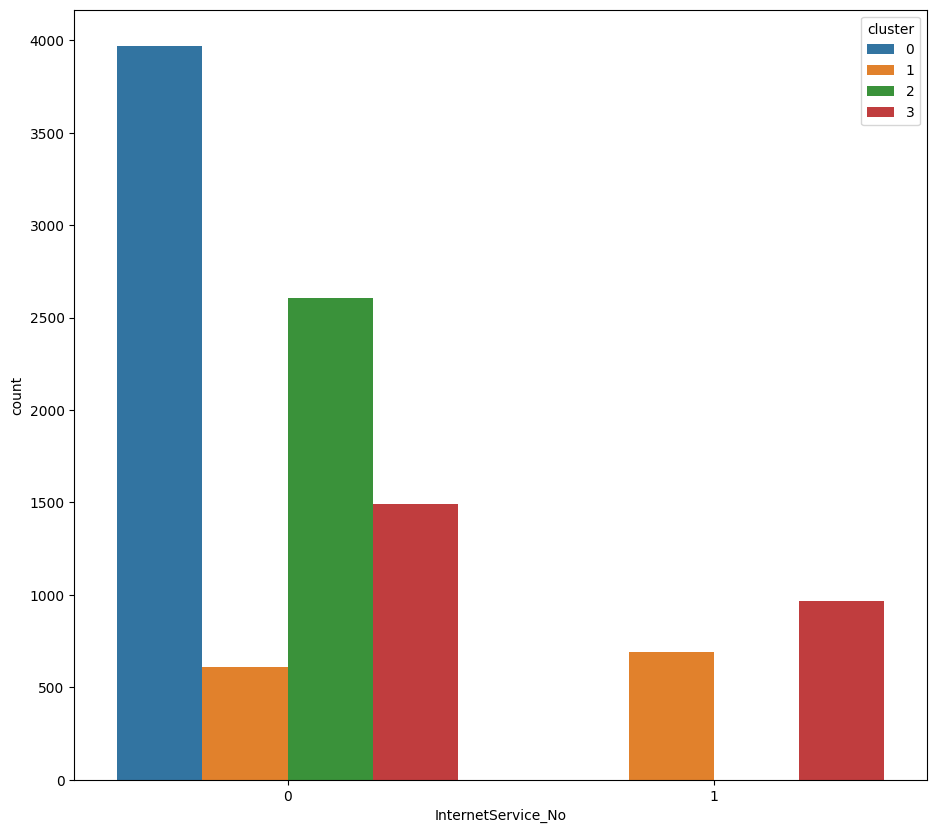

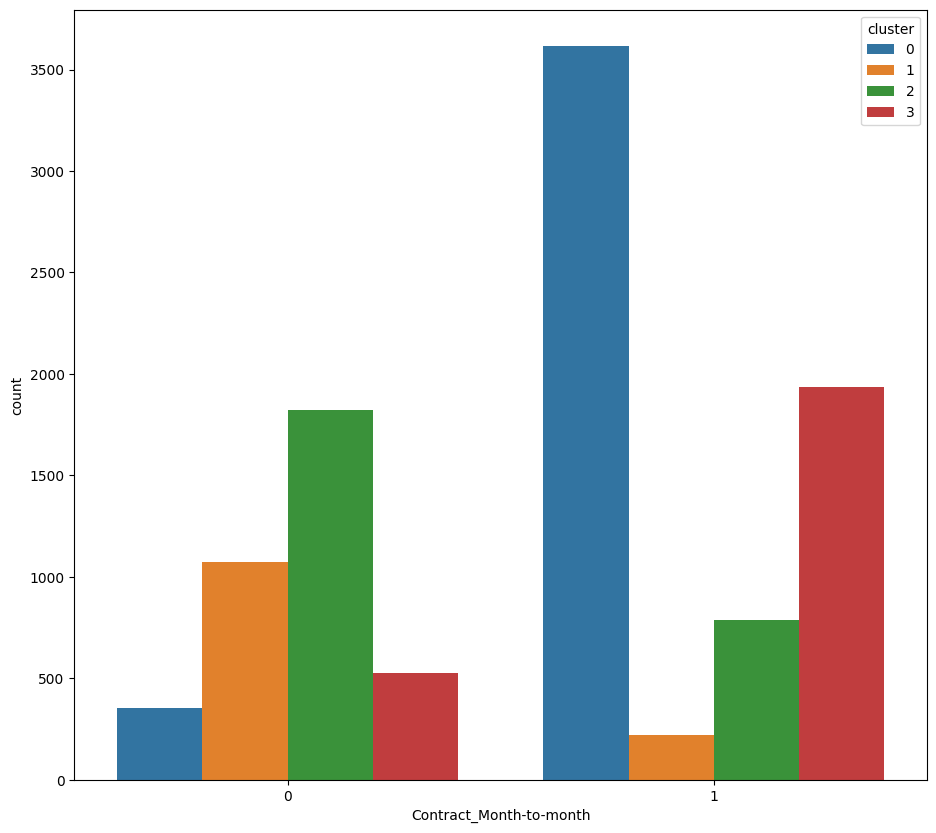

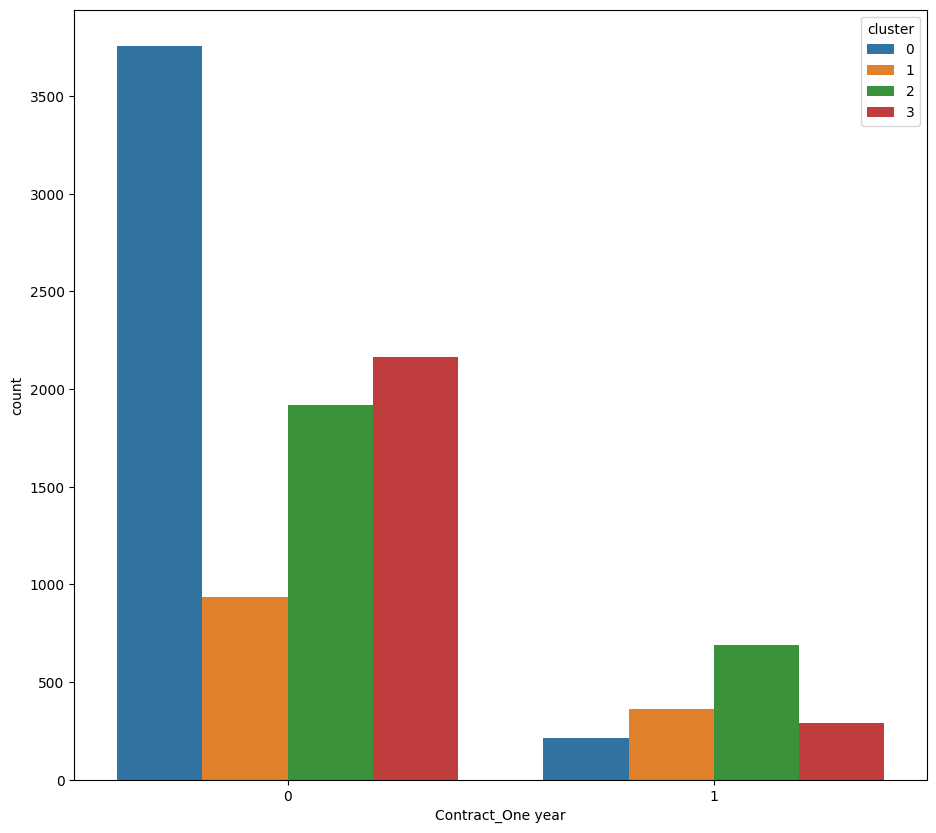

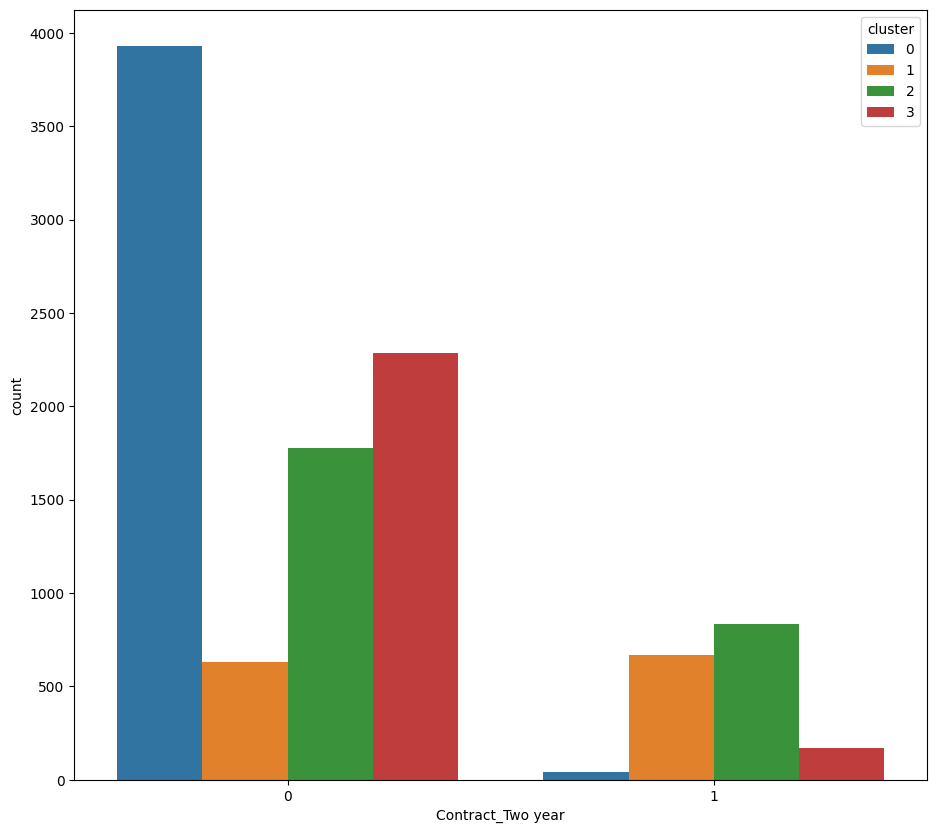

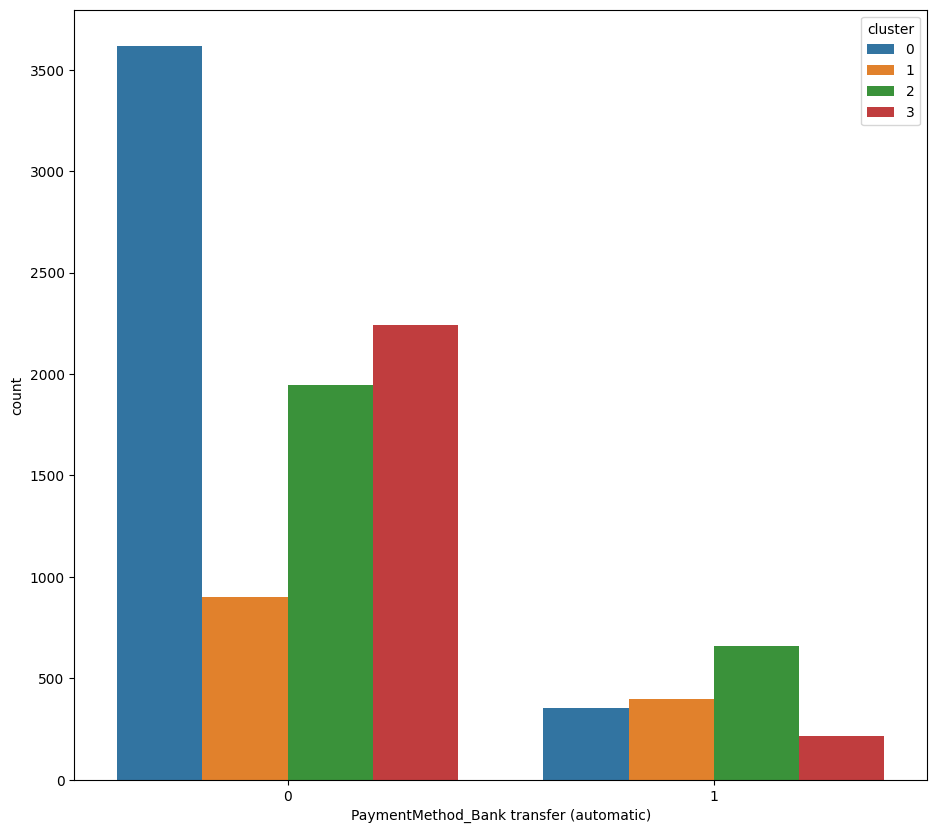

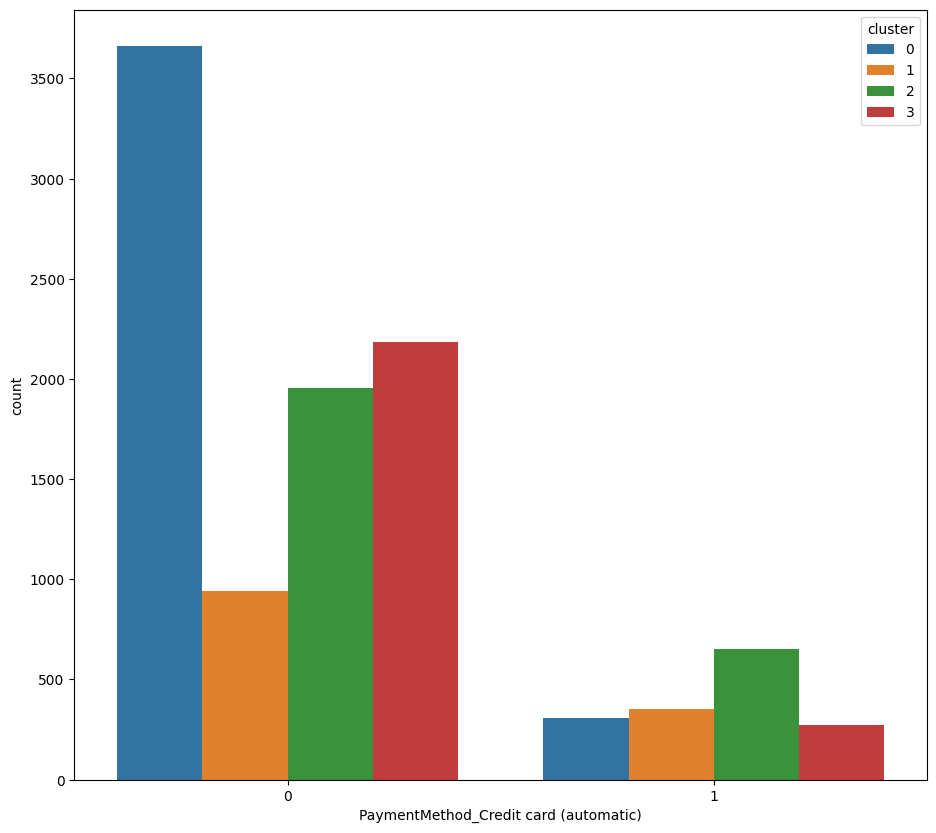

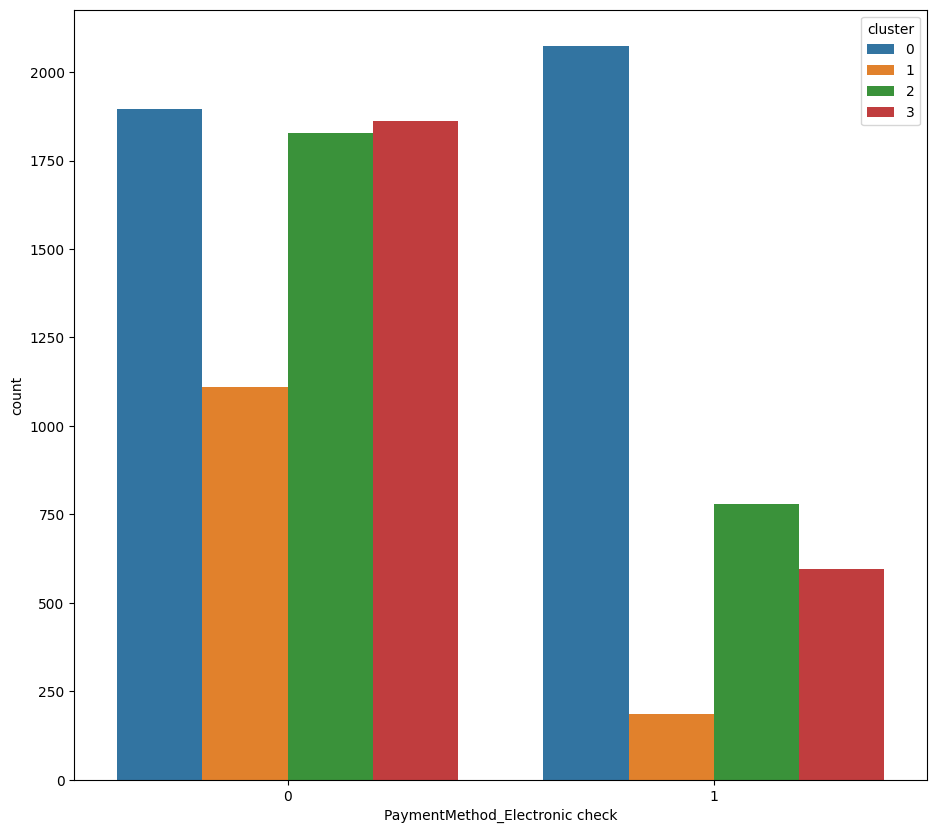

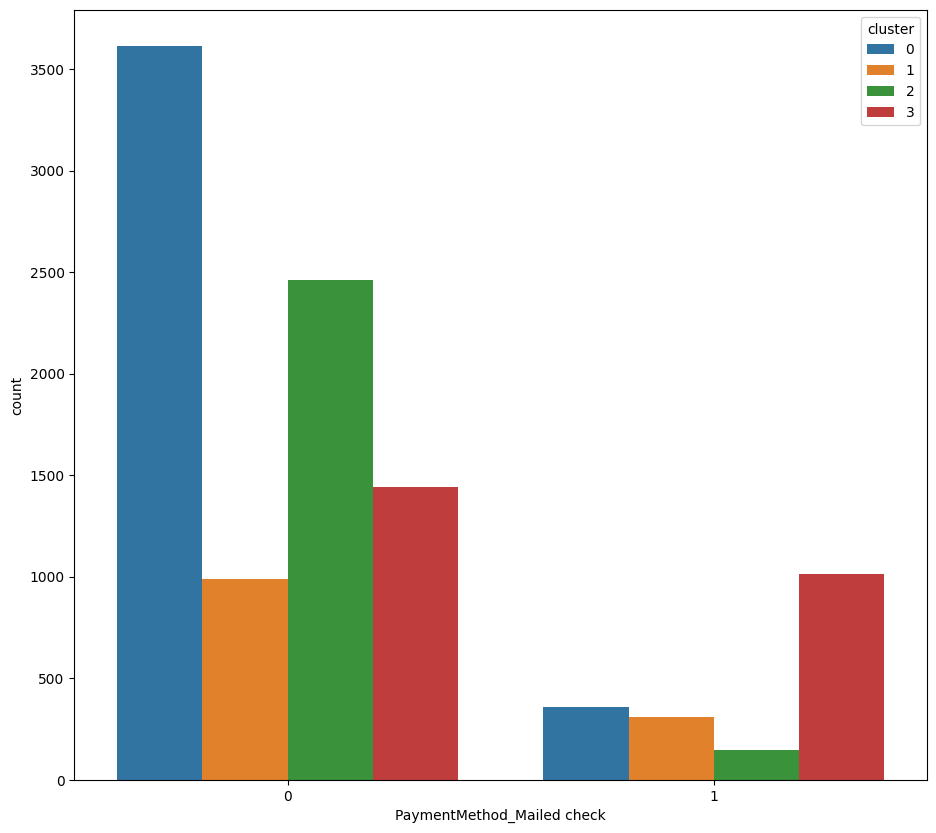

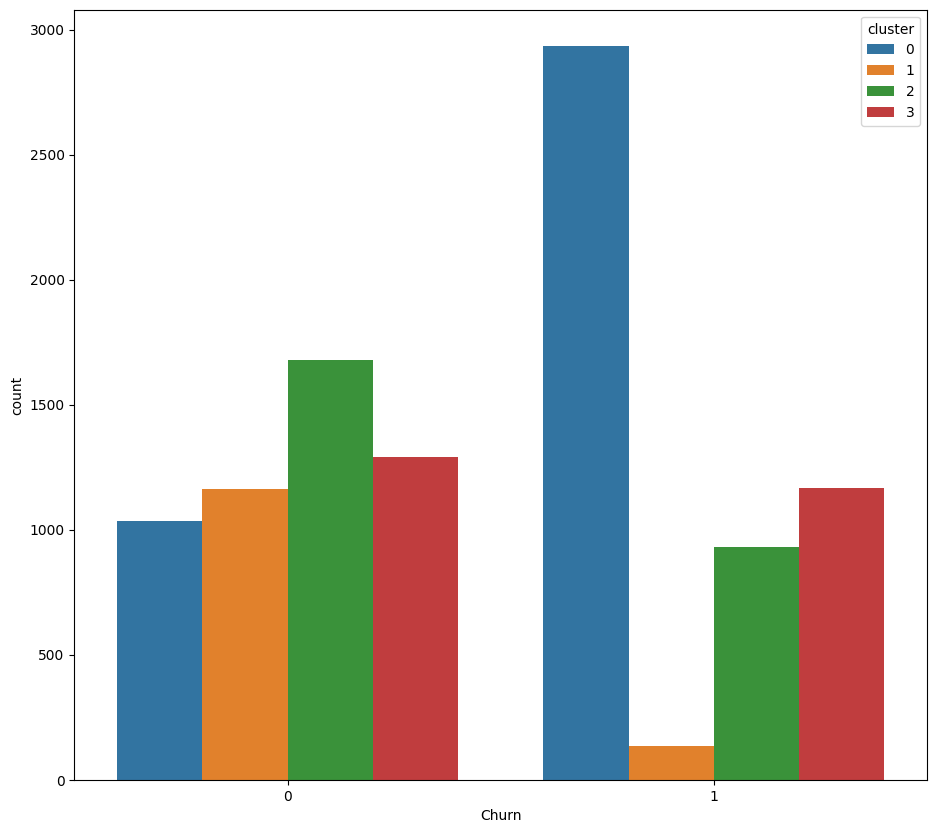

In [161]:
for col in ['gender','SeniorCitizen','Partner','Dependents',
            'PhoneService','MultipleLines','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
            'InternetService_DSL', 'InternetService_Fiber optic',
            'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
            'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
            'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']:
    fig = plt.figure(figsize=(11,10))
    sns.countplot(x=df[col],hue=df["cluster"])
    plt.show()

### Insights

Clusters 0 and 1 are typically 

* In the Month - to Month Contract
* More likely to be elderly
* Does not have Online Security
* Uses Fiber optic

## K-Means With Data after PCA

In [162]:
pc=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,random_state=42,n_init=10)
    km.fit(data_pca)
    pc.append(km.inertia_)
pc

[20122.497574394554,
 13658.811033594657,
 9054.421966290123,
 6608.007316417419,
 4955.4711518880695,
 4185.986194580411,
 3606.838991275964,
 3213.7182192384403,
 2911.8986148364884,
 2687.689960457284,
 2463.5423163484174,
 2306.869706478922,
 2184.234527264583,
 2056.991488202792,
 1951.7982540602165,
 1869.9986429520964,
 1767.8086054021287,
 1698.7485179798223,
 1631.066748575954]

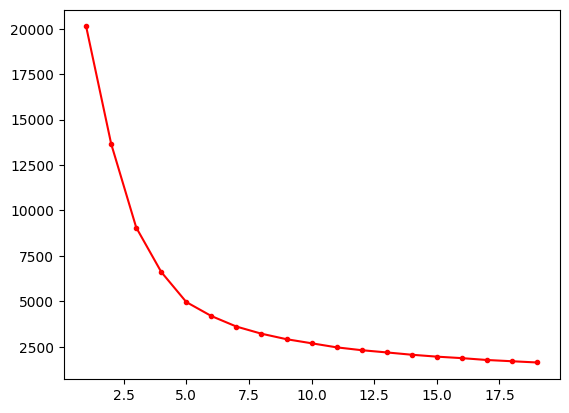

In [163]:
plt.plot(range(1,20),pc,marker='.',color='red')

In [164]:
kpc=KMeans(n_clusters=4,n_init=10,random_state=42)
kpc.fit(data_pca)

KMeans(n_clusters=4, n_init=10, random_state=42)

### Evaluation

In [165]:
ypred=kpc.fit_predict(data_pca)

In [166]:
silhouette_score(data_pca, ypred)

0.41968823876030775

### Results Visualization

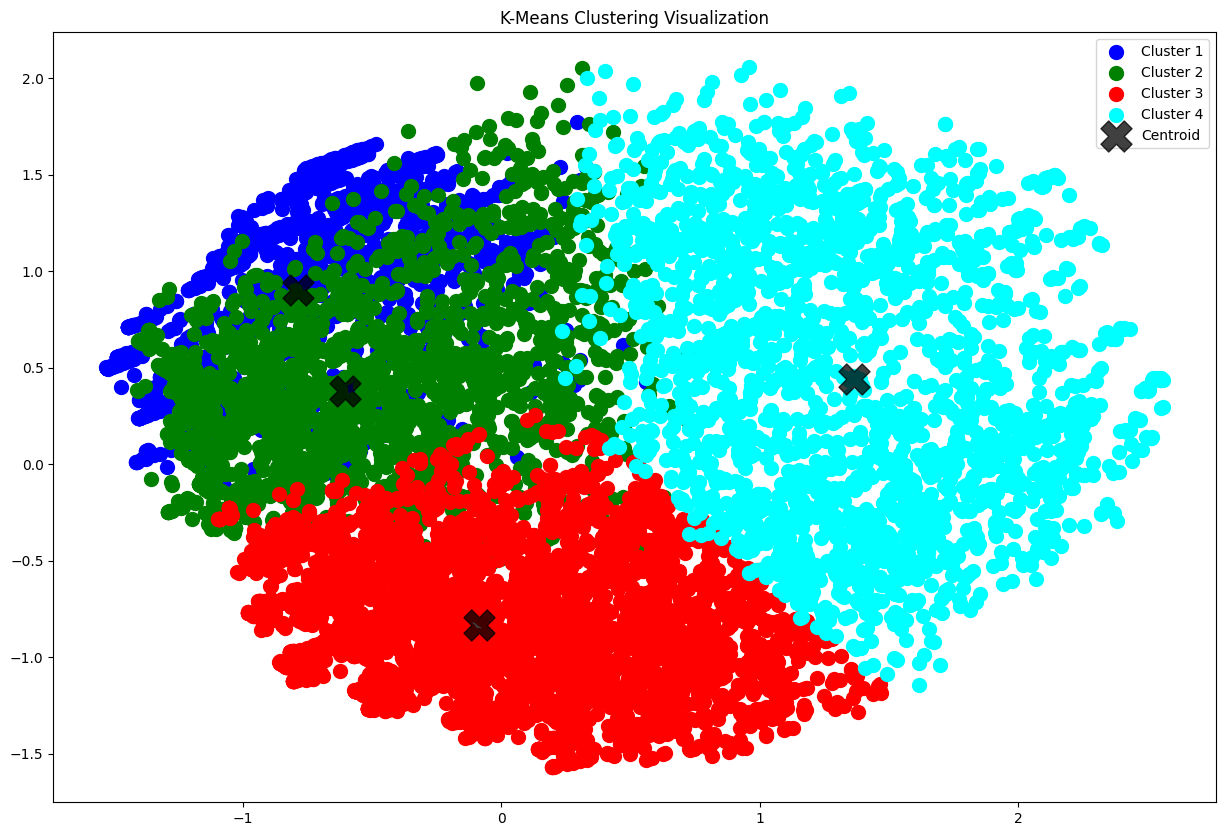

In [167]:
plt.figure(figsize=(15,10))
plt.scatter(data_pca[ypred == 0].iloc[:, 0], data_pca[ypred == 0].iloc[:, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(data_pca[ypred == 1].iloc[:, 0], data_pca[ypred == 1].iloc[:, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(data_pca[ypred == 2].iloc[:, 0], data_pca[ypred == 2].iloc[:, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(data_pca[ypred == 3].iloc[:, 0], data_pca[ypred == 3].iloc[:, 1], s = 100, c = 'cyan', label = 'Cluster 4')
centers = kpc.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.75,label = 'Centroid',marker='X')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

In [168]:
df['Cluster']=ypred

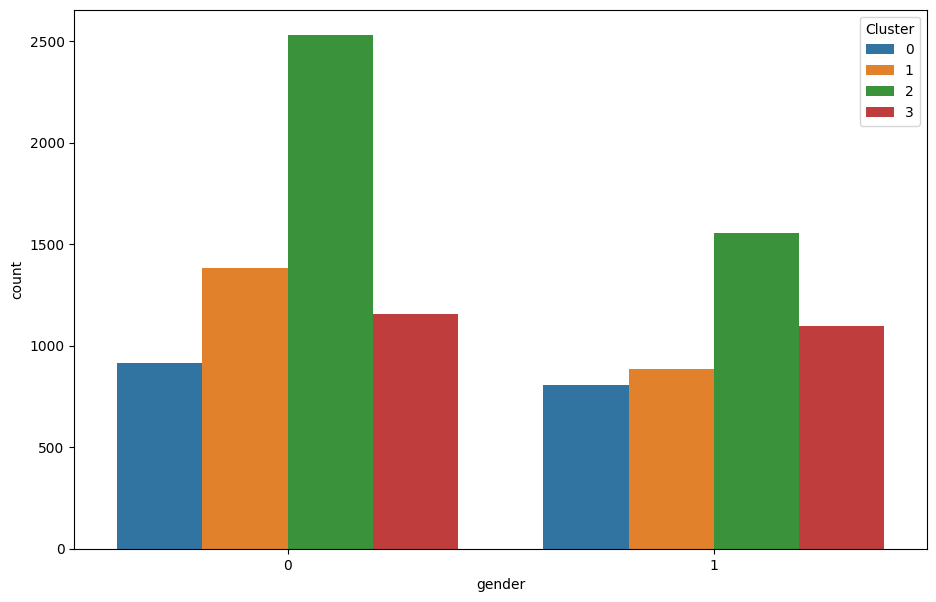

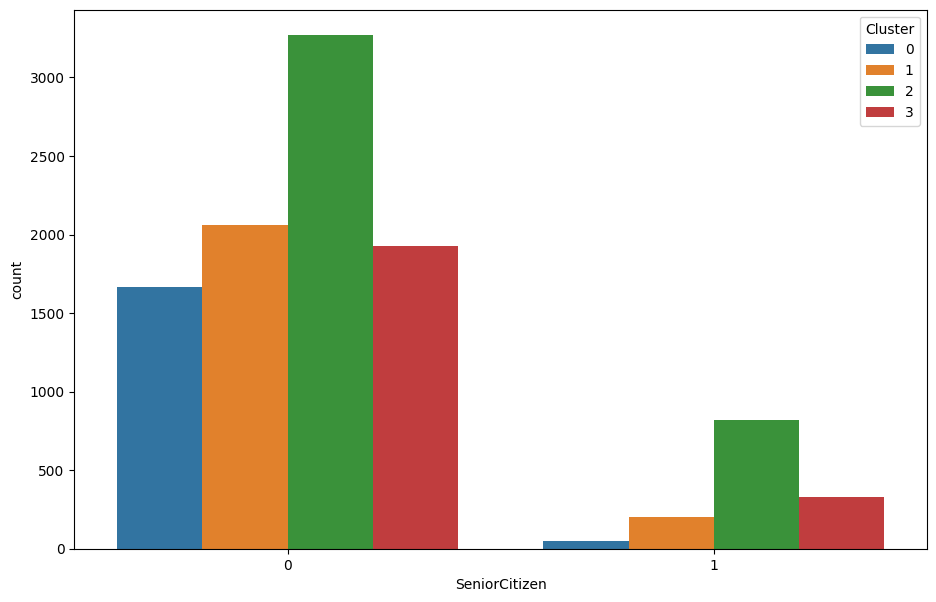

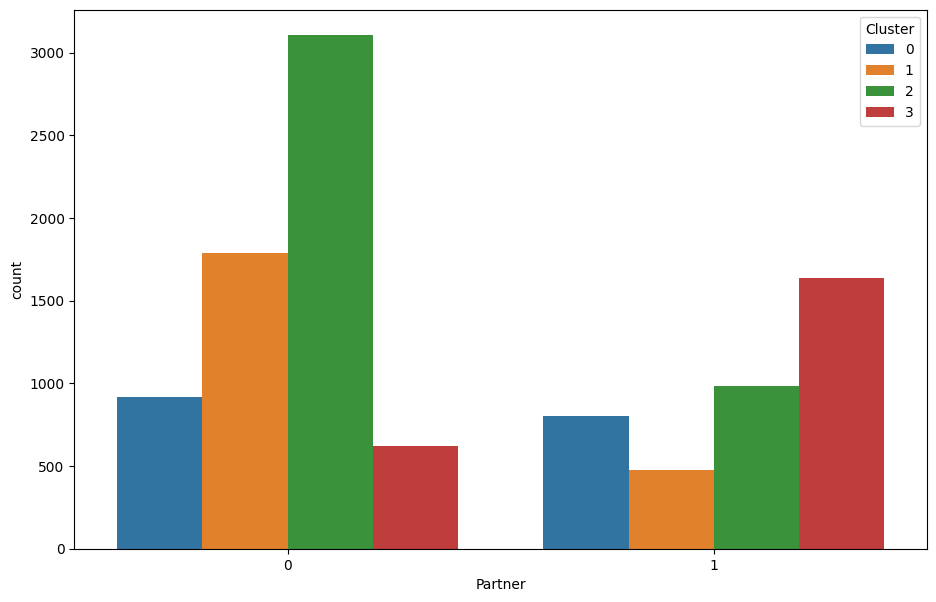

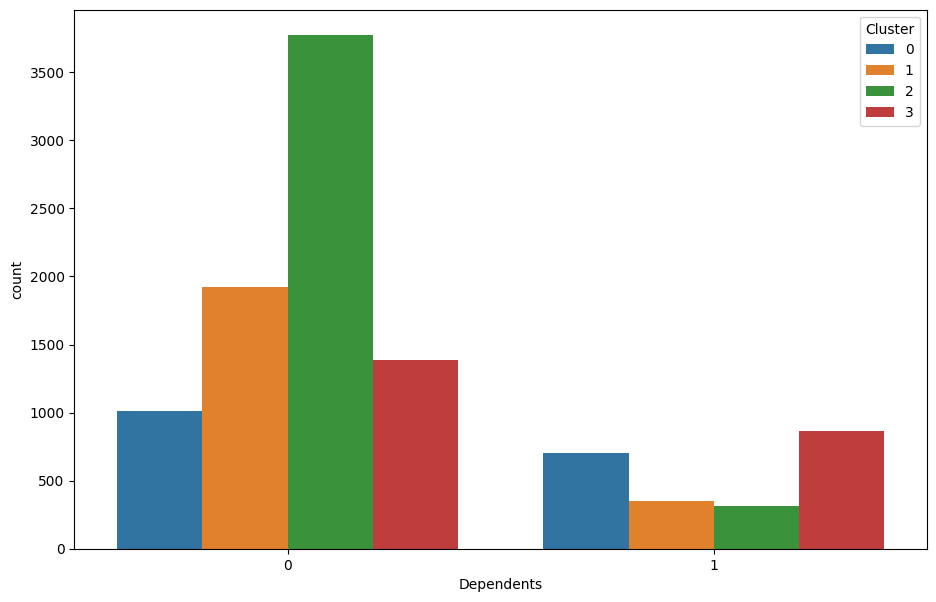

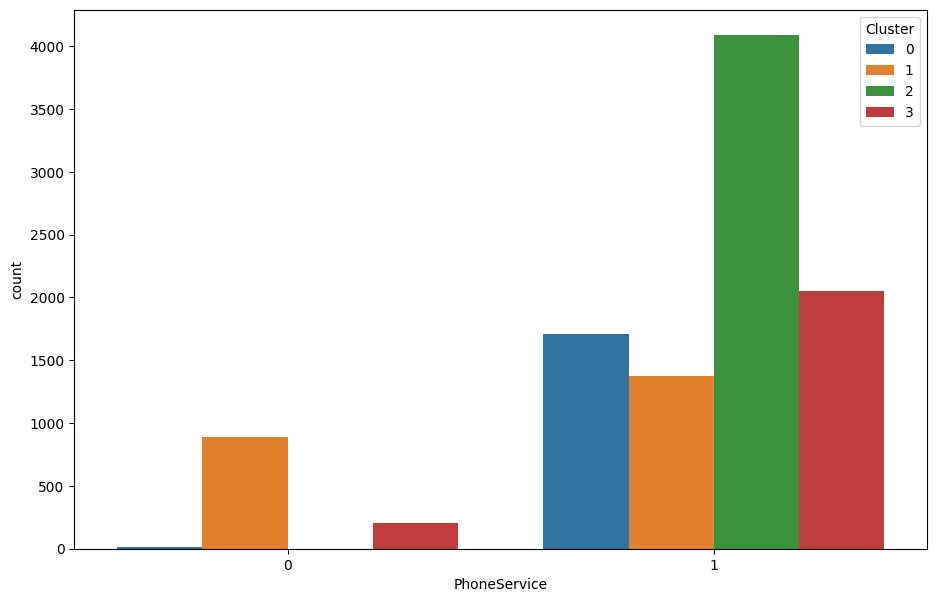

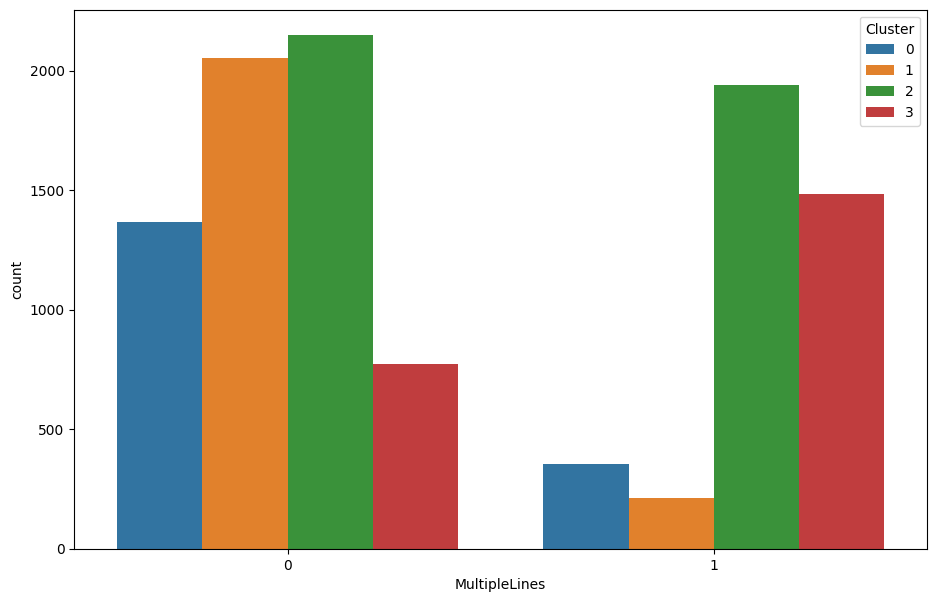

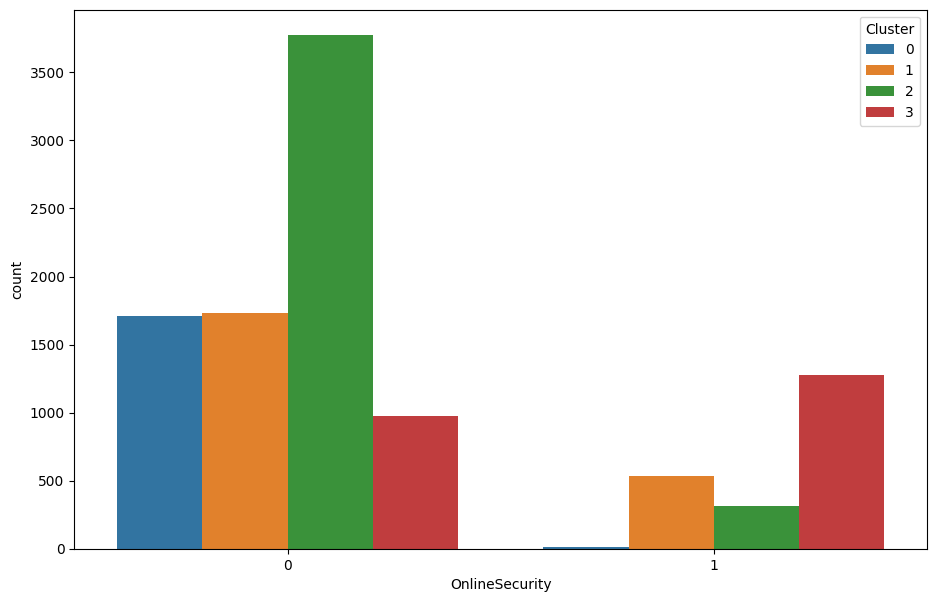

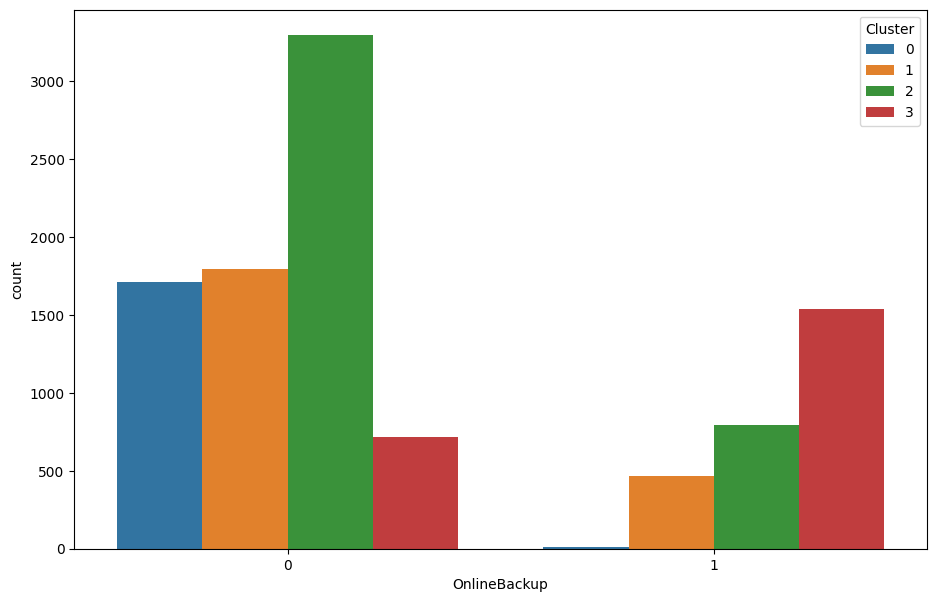

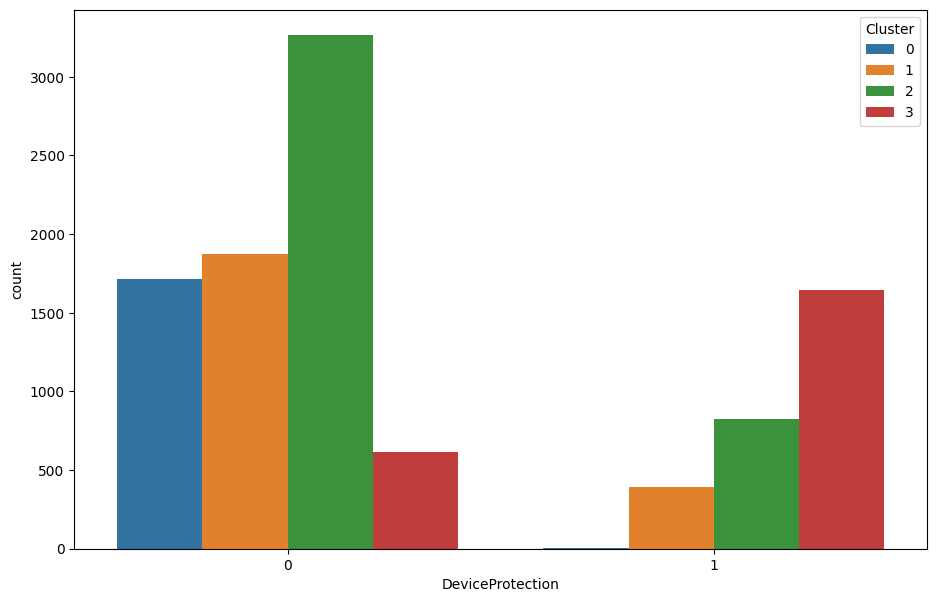

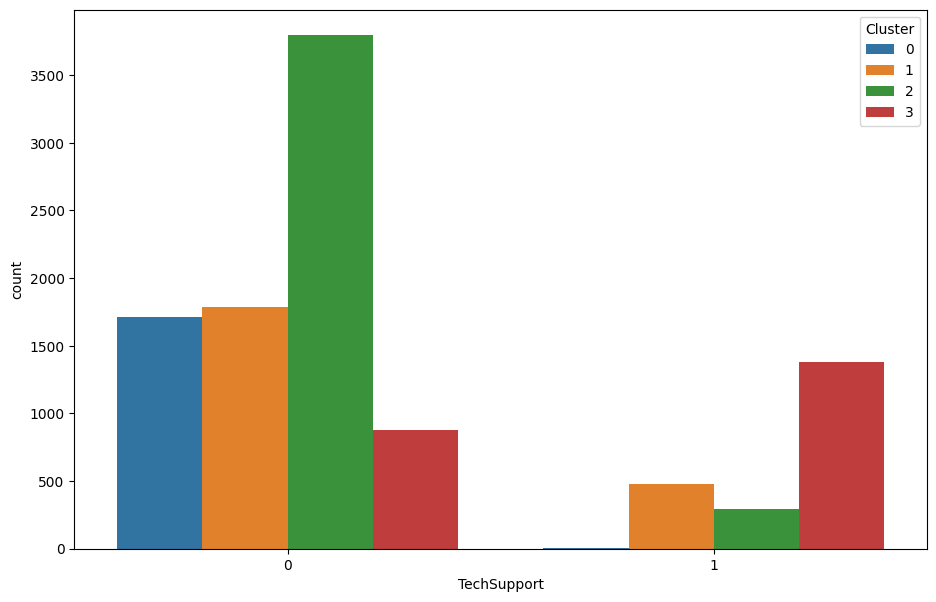

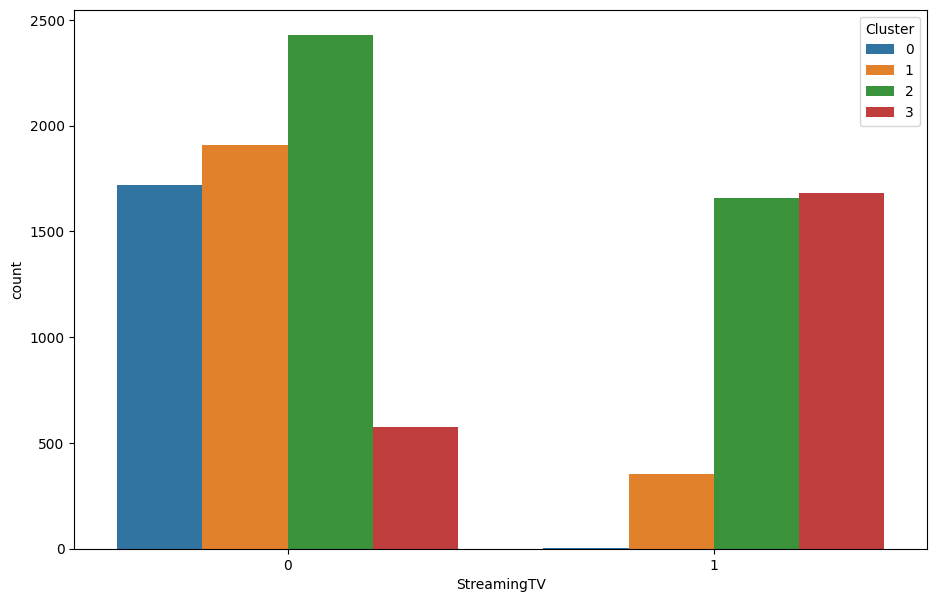

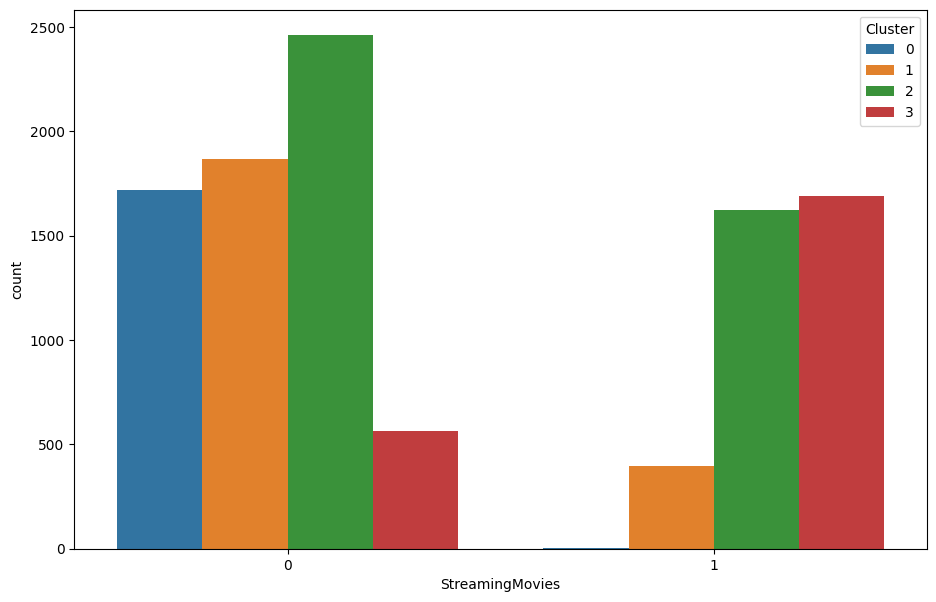

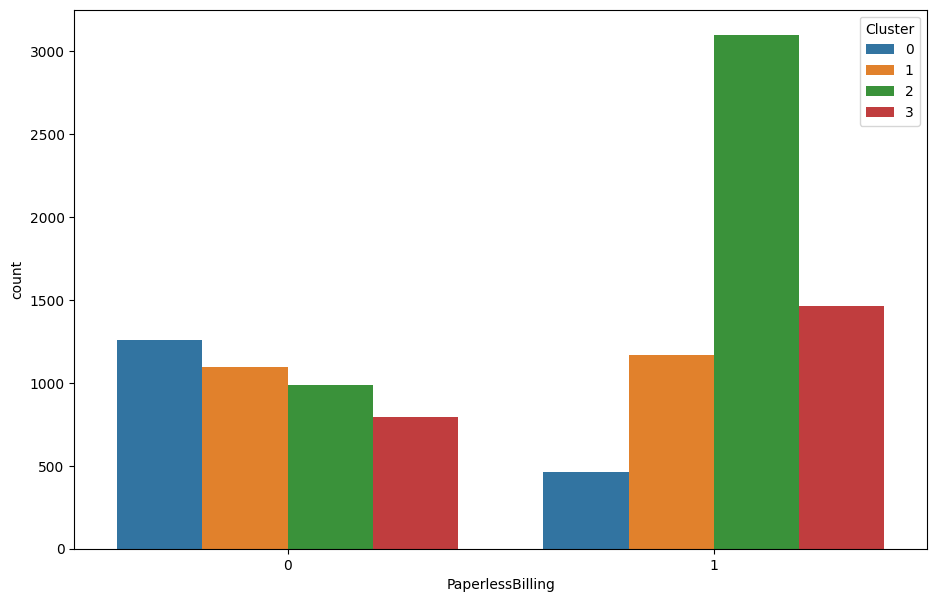

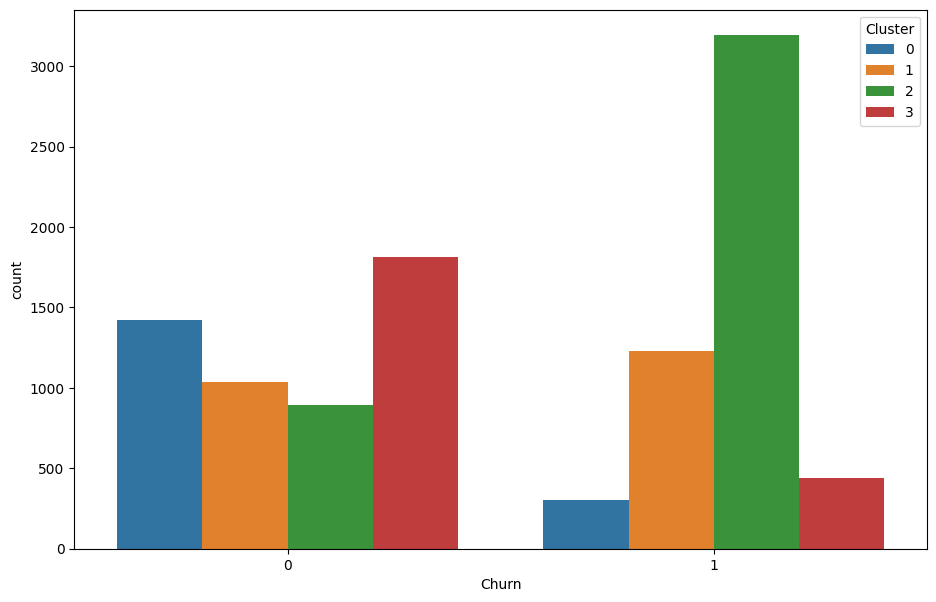

In [169]:
for col in ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies','PaperlessBilling','Churn']:
    fig = plt.figure(figsize=(11,7))
    sns.countplot(x=df[col],hue=df["Cluster"])
    plt.show()

<h1 style="font-size: 2em;">Hierarchical Clustering</h1>
<ul>
    <li style="font-size: 1.5em;"><strong>Why Use It</strong>: Hierarchical Clustering builds a multi-level hierarchy of clusters, making it a good option when the number of clusters is unknown or when you want to explore data at multiple levels of granularity. It’s useful for small datasets or when you want to visualize relationships between clusters.
    </li>
    <li style="font-size: 1.5em;"><strong>Strengths</strong>: No need to predefine the number of clusters; produces a dendrogram, which helps visualize how clusters are related; works well with small datasets.</li>
    <li style="font-size: 1.5em;"><strong>Limitations</strong>: Computationally expensive for large datasets; sensitive to noise and outliers; requires careful interpretation of dendrograms; may struggle with complex cluster shapes.</li>
</ul>

### Hierarchical Using Data

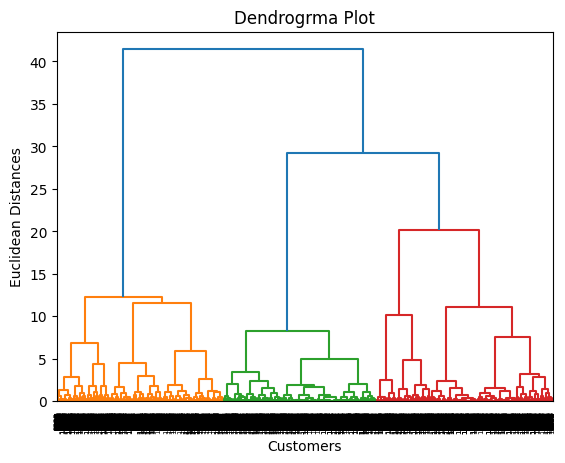

In [170]:
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title("Dendrogrma Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [171]:
hc= AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc.fit(x)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

### Evaluation

In [172]:
y_pred= hc.fit_predict(x)

In [173]:
silhouette_score(x, y_pred)

0.42647642812039854

### Results Visualization

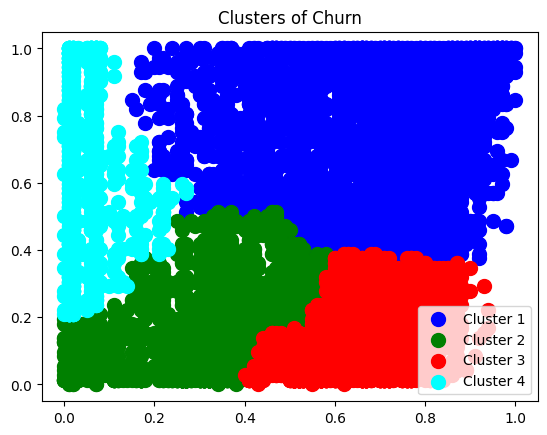

In [174]:
plt.scatter(x.iloc[y_pred == 0, 0], x.iloc[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x.iloc[y_pred == 1, 0], x.iloc[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x.iloc[y_pred == 2, 0], x.iloc[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3') 
plt.scatter(x.iloc[y_pred == 3, 0], x.iloc[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.title('Clusters of Churn')
plt.legend()
plt.show()

In [175]:
df['Clusterhierarechal']=y_pred

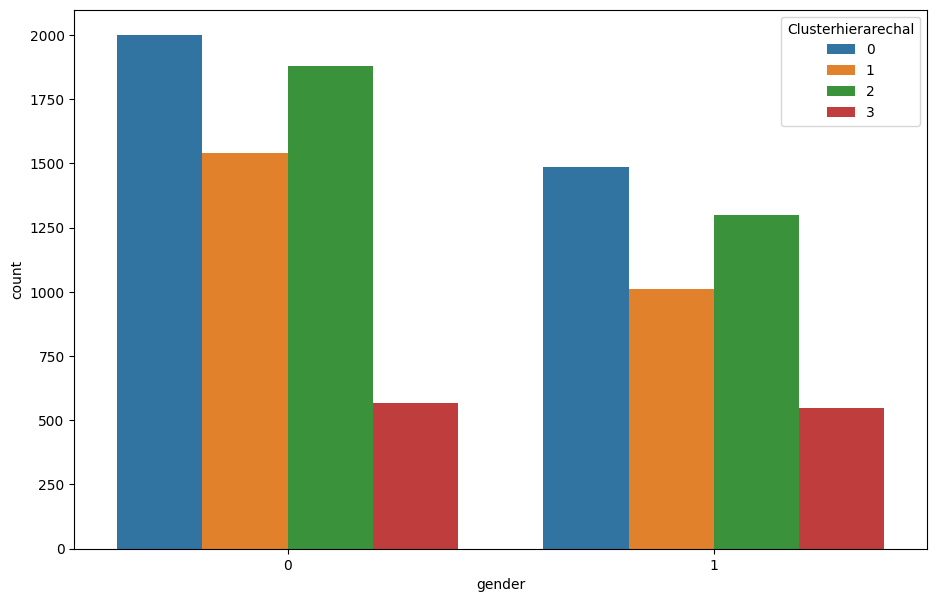

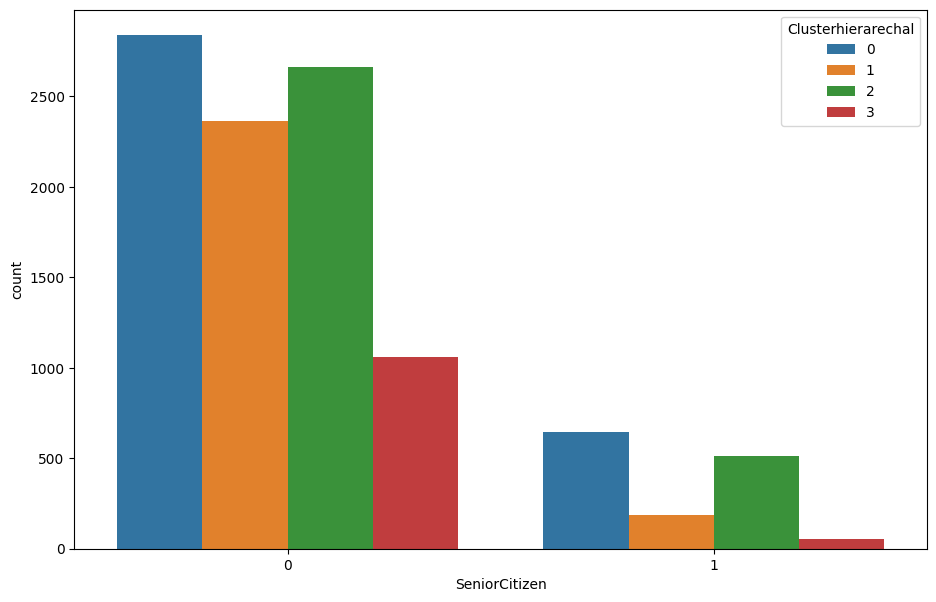

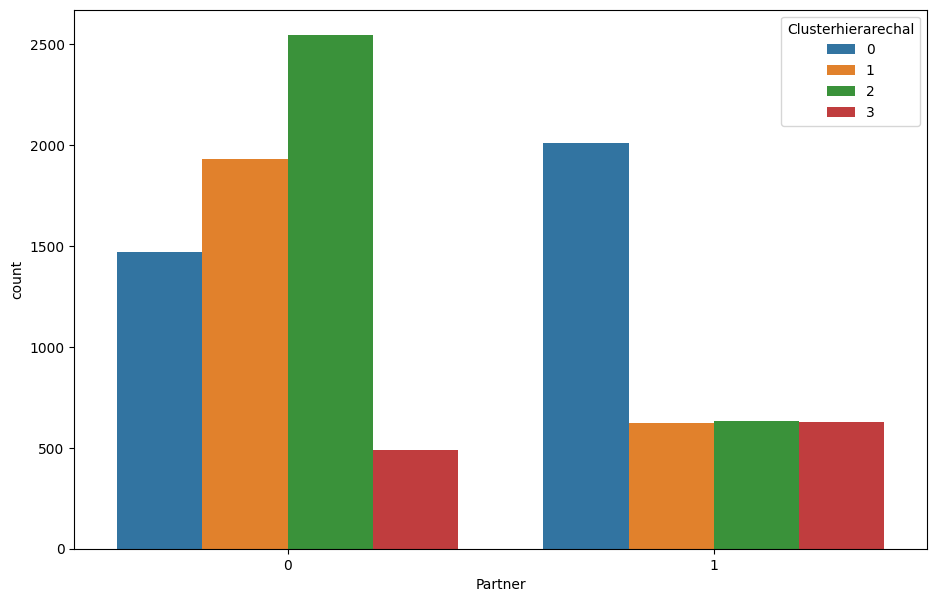

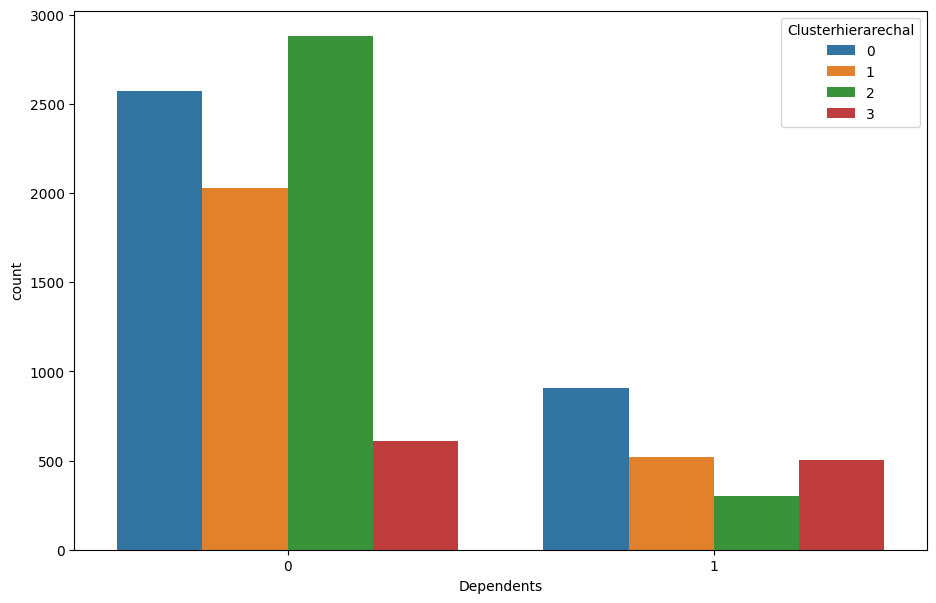

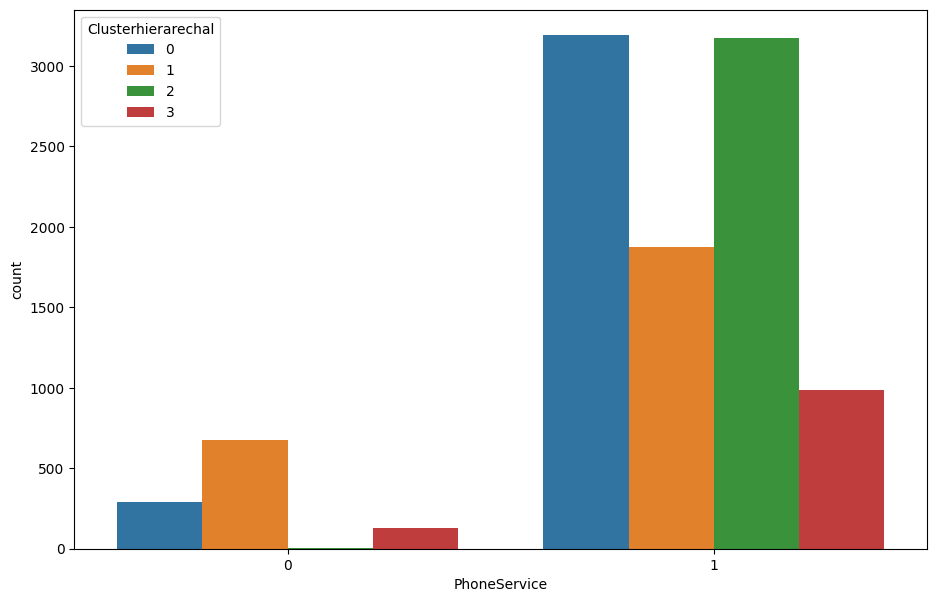

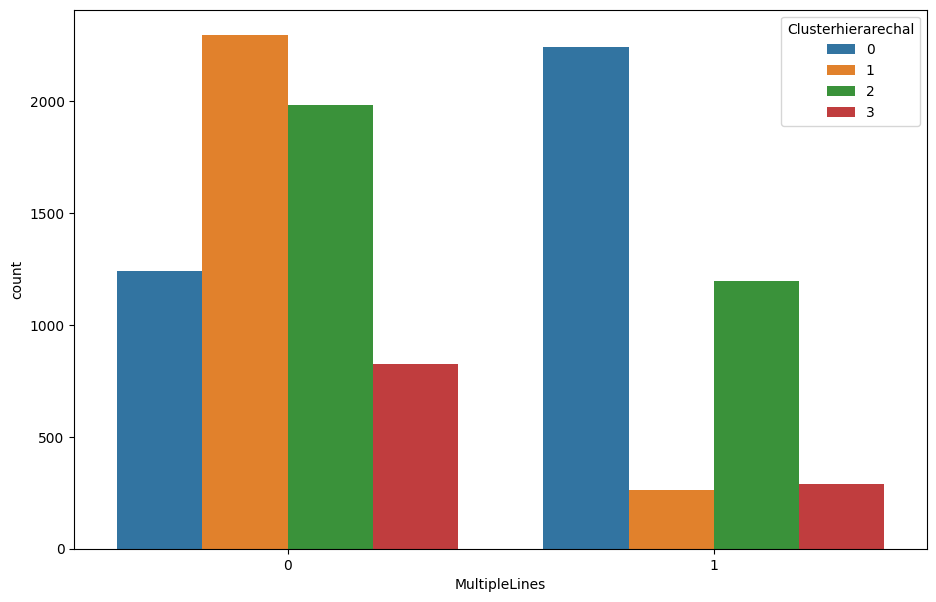

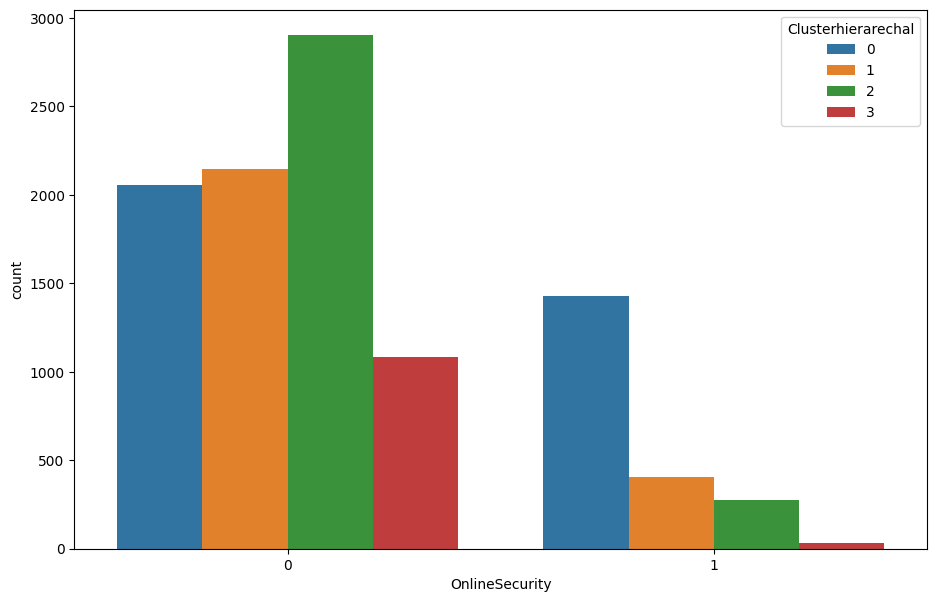

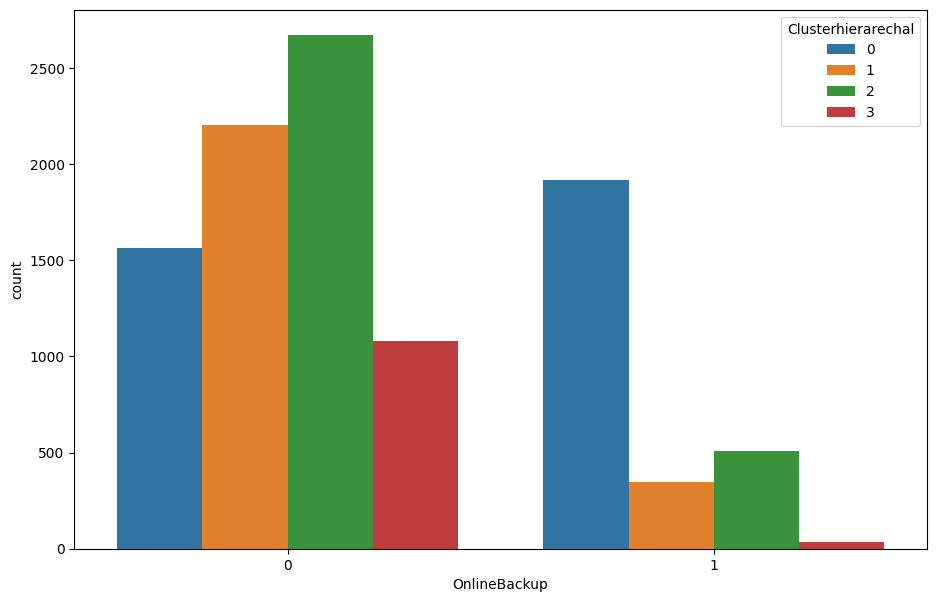

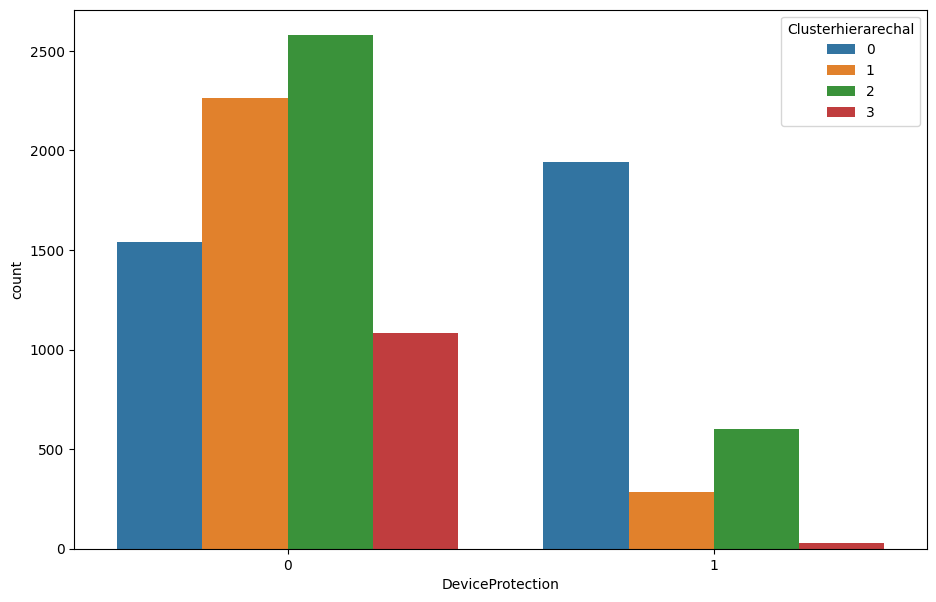

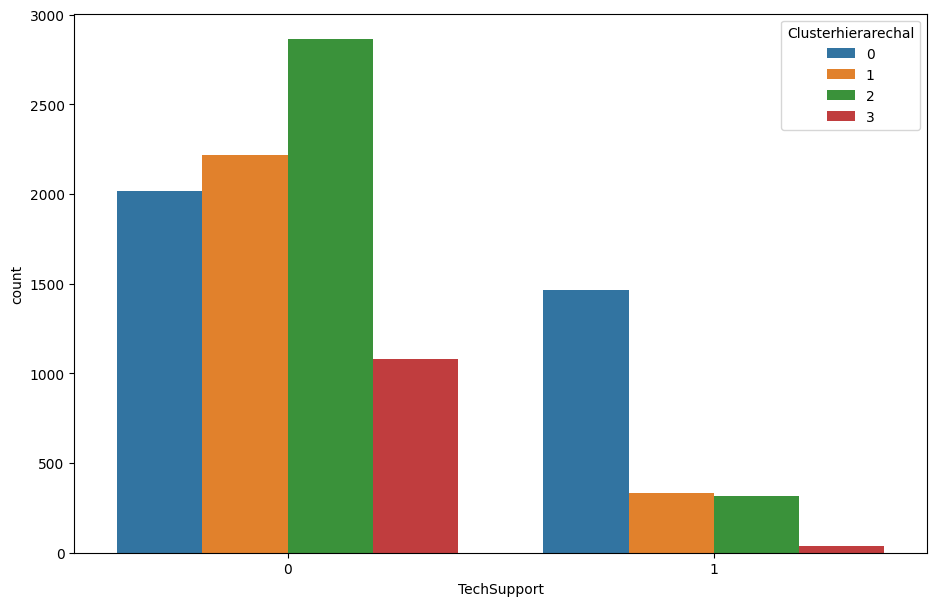

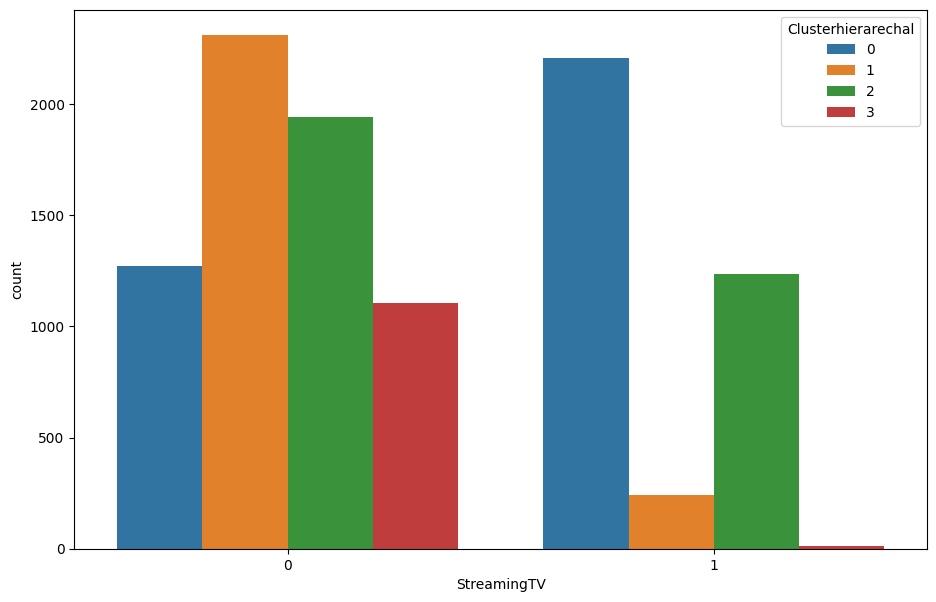

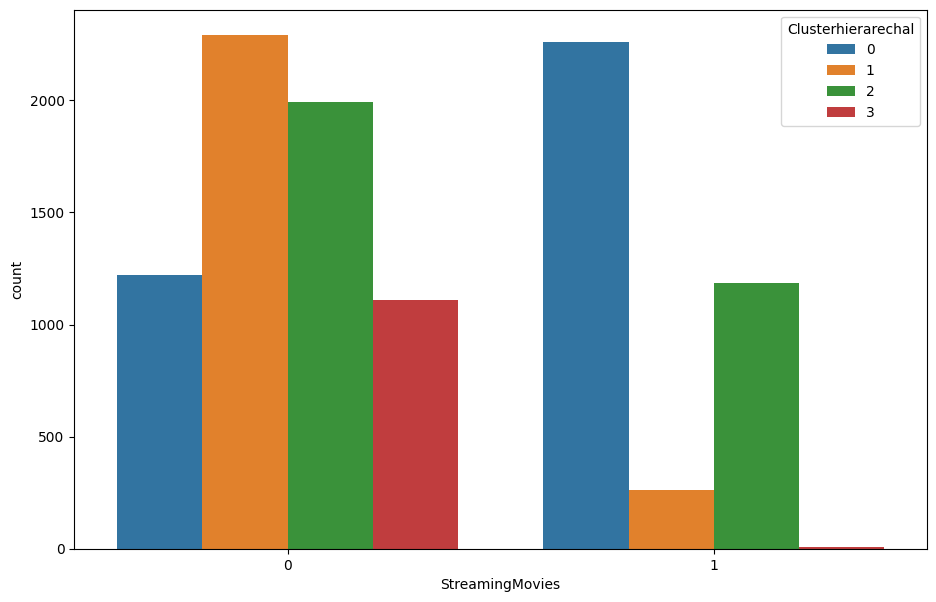

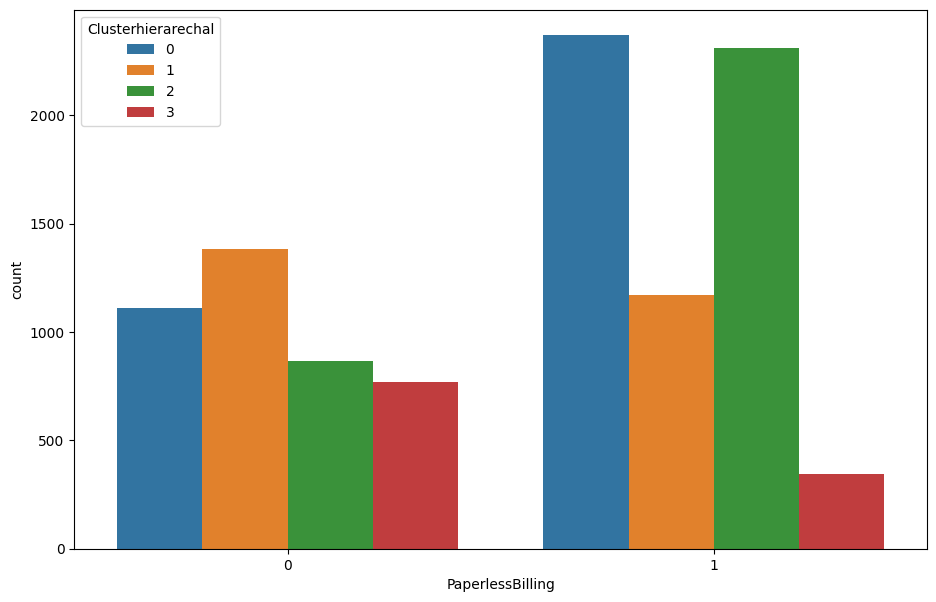

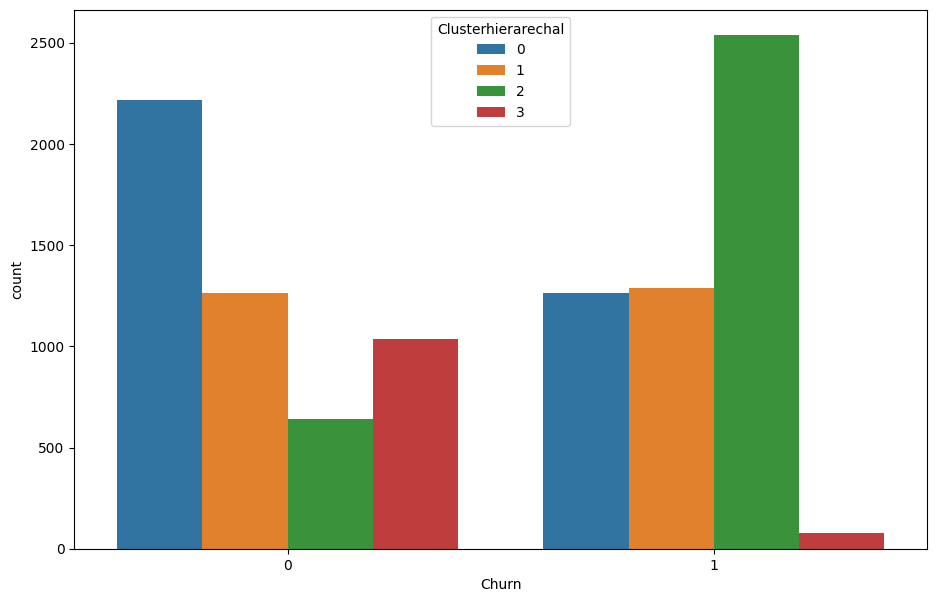

In [176]:
for col in ['gender','SeniorCitizen','Partner','Dependents',
            'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']:
    fig = plt.figure(figsize=(11,7))
    sns.countplot(x=df[col],hue=df["Clusterhierarechal"])
    plt.show()

### Hierarchical Using Data after PCA

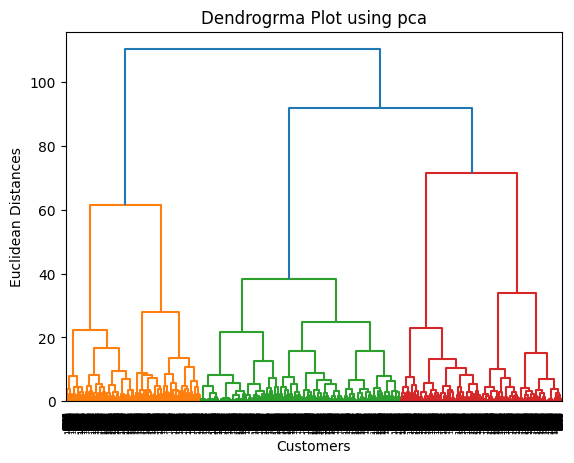

In [177]:
dendropc = shc.dendrogram(shc.linkage(data_pca, method="ward"))
plt.title("Dendrogrma Plot using pca")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [178]:
hcf= AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hcf.fit(data_pca)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

### Evaluation

In [179]:
y_predpc= hcf.fit_predict(data_pca)

In [180]:
silhouette_score(data_pca, y_predpc)

0.39062207185110726

### Results Visualization

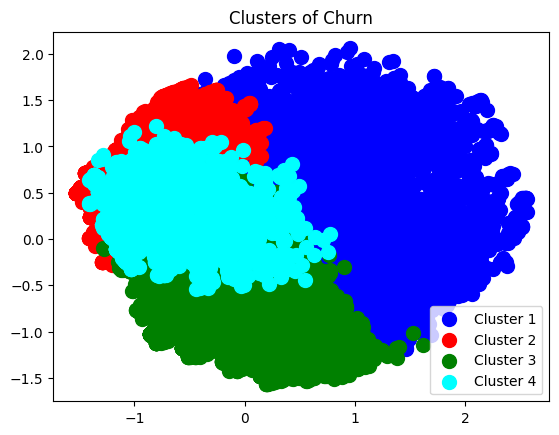

In [181]:
plt.scatter(data_pca[y_predpc == 0].iloc[:, 0], data_pca[y_predpc == 0].iloc[:, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(data_pca[y_predpc == 1].iloc[:, 0], data_pca[y_predpc == 1].iloc[:, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_pca[y_predpc == 2].iloc[:, 0], data_pca[y_predpc == 2].iloc[:, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_predpc == 3].iloc[:, 0], data_pca[y_predpc == 3].iloc[:, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Churn')
plt.legend()
plt.show()

In [182]:
df['Clusterhierarechalpca']=y_predpc

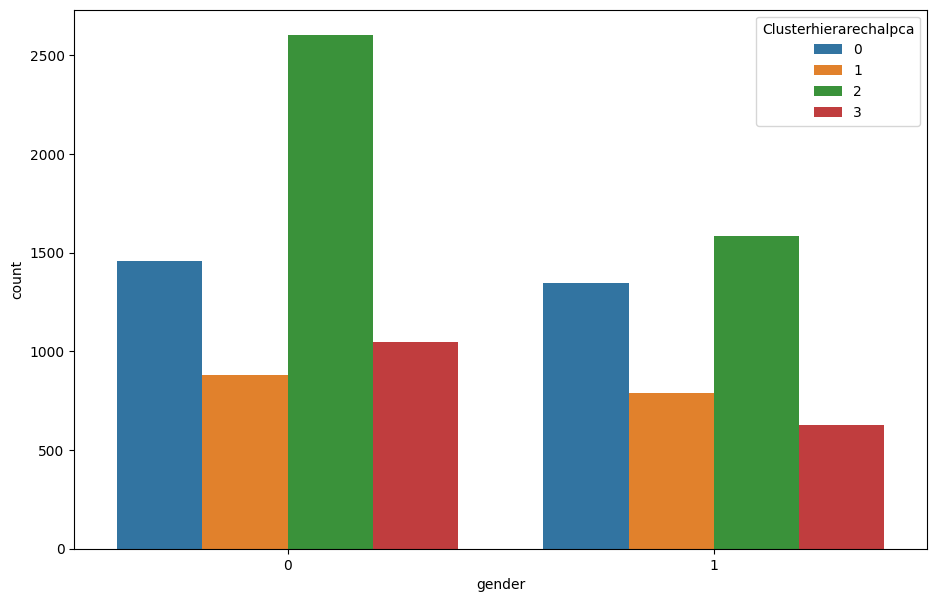

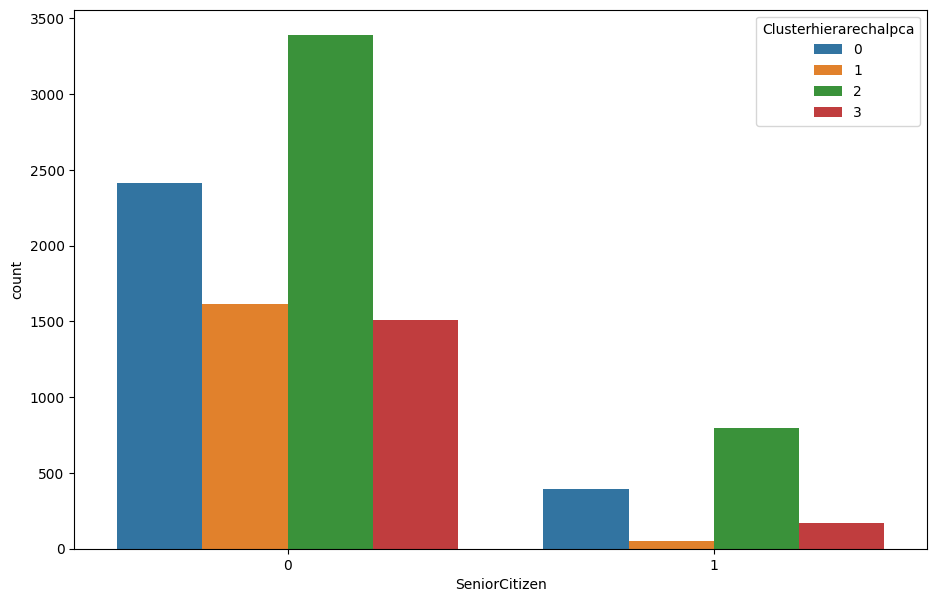

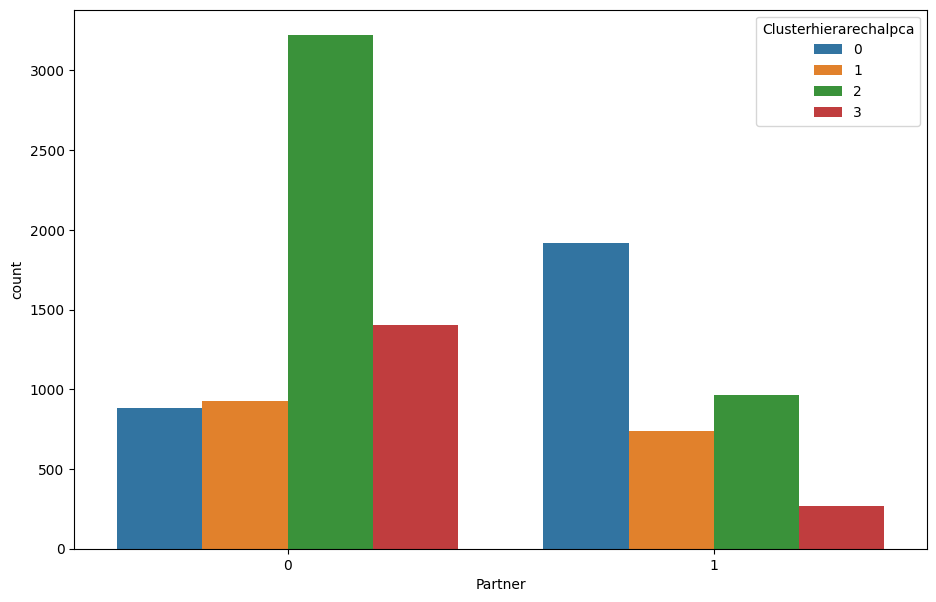

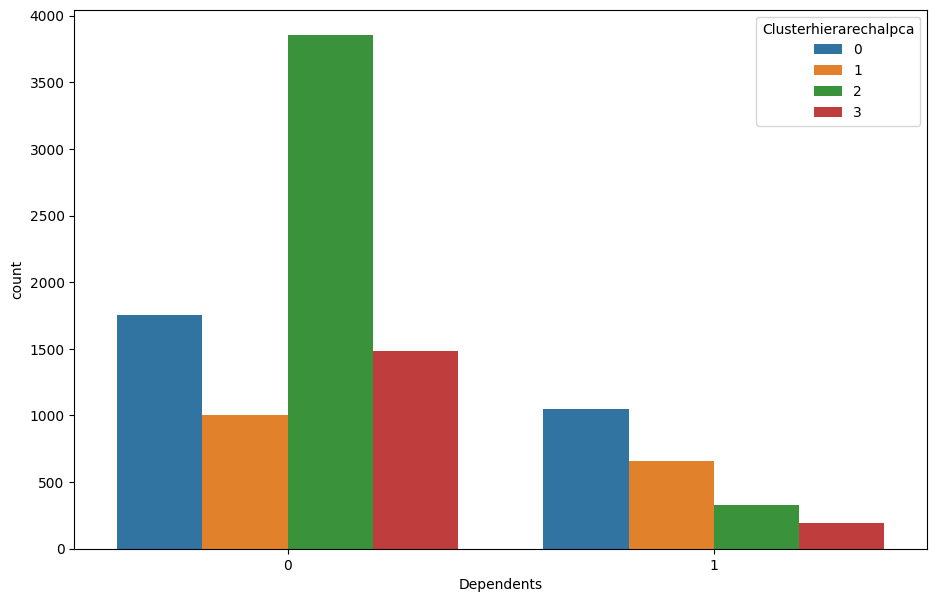

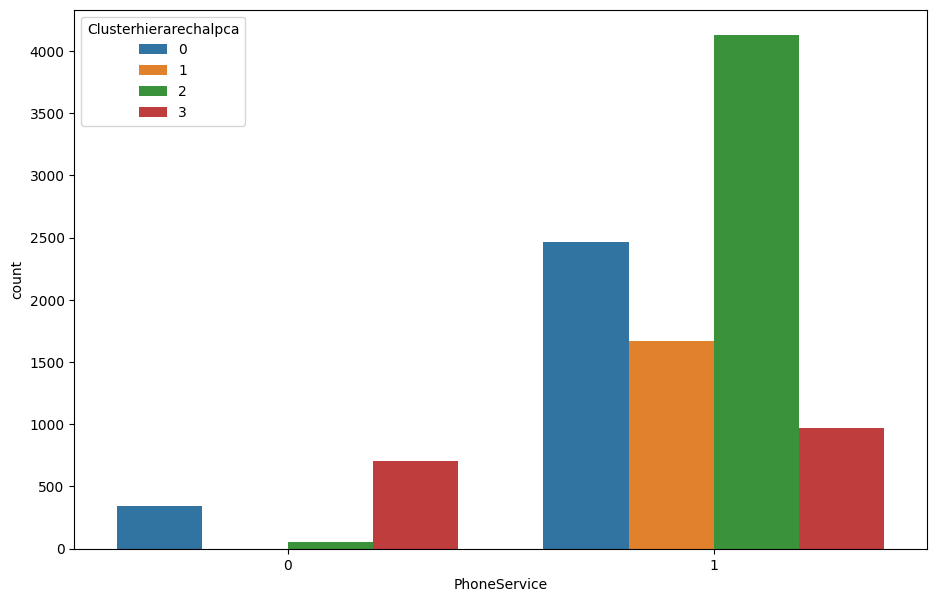

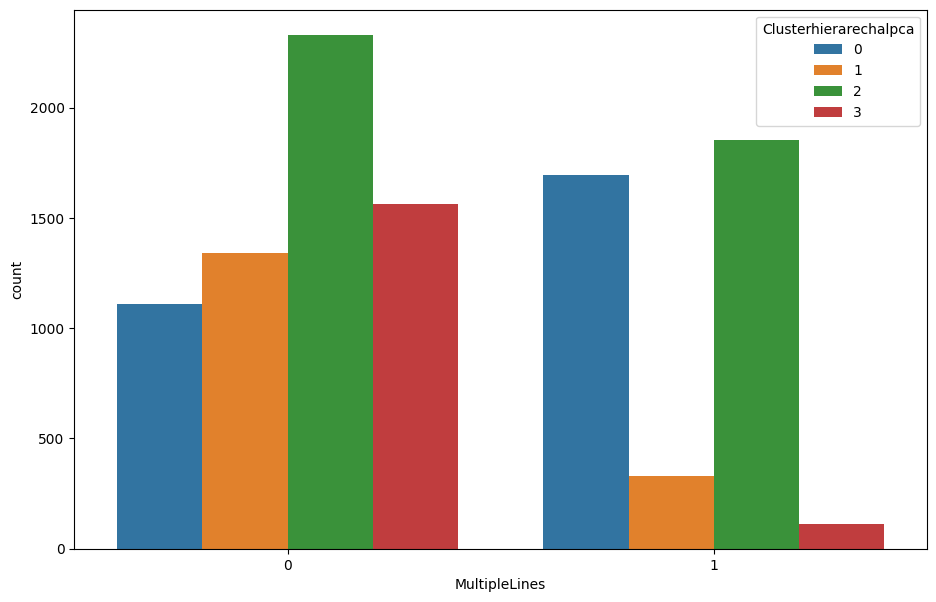

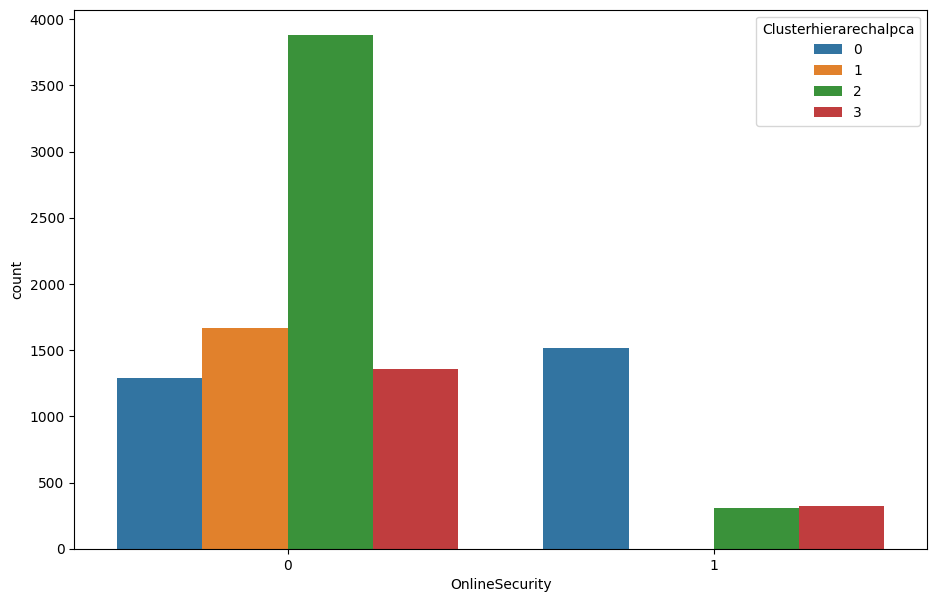

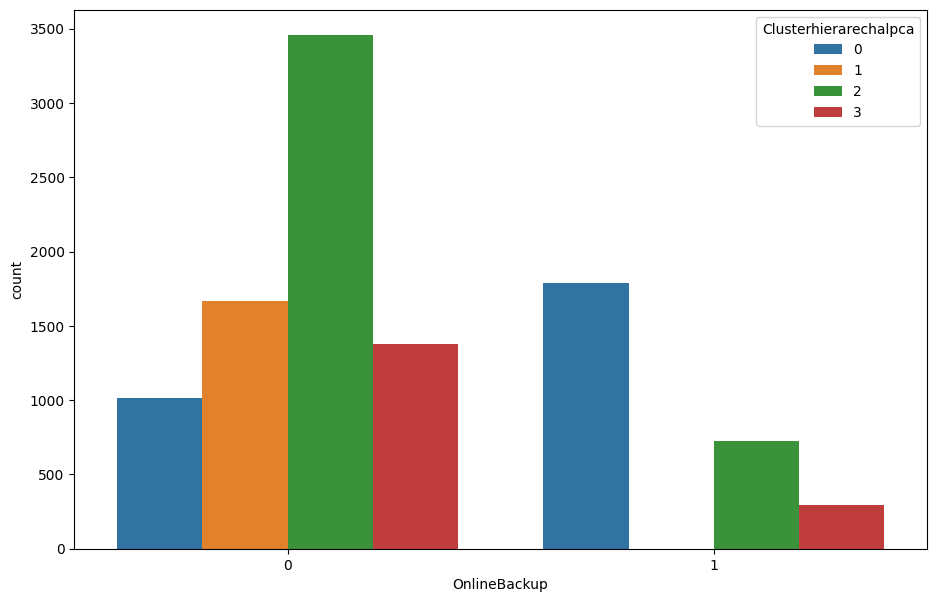

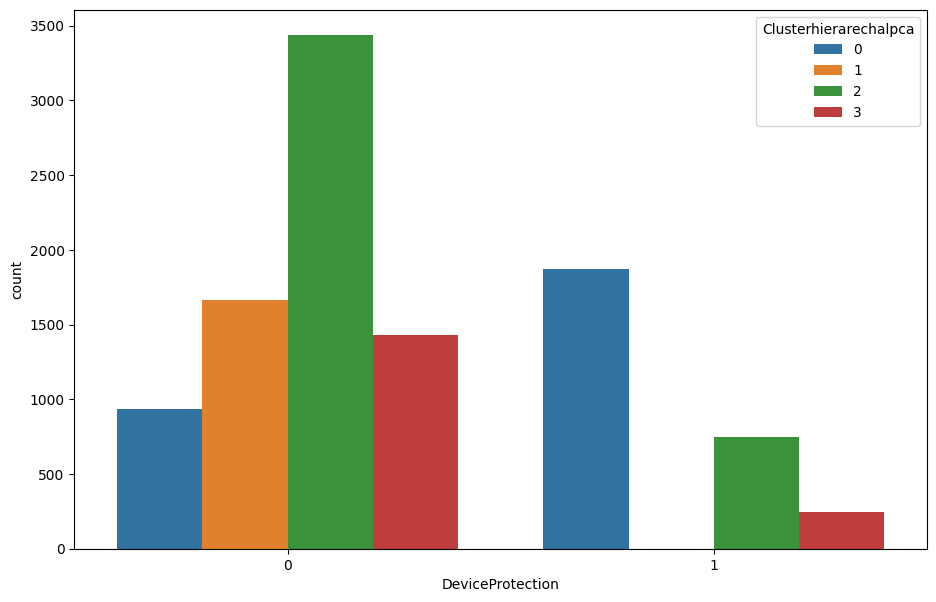

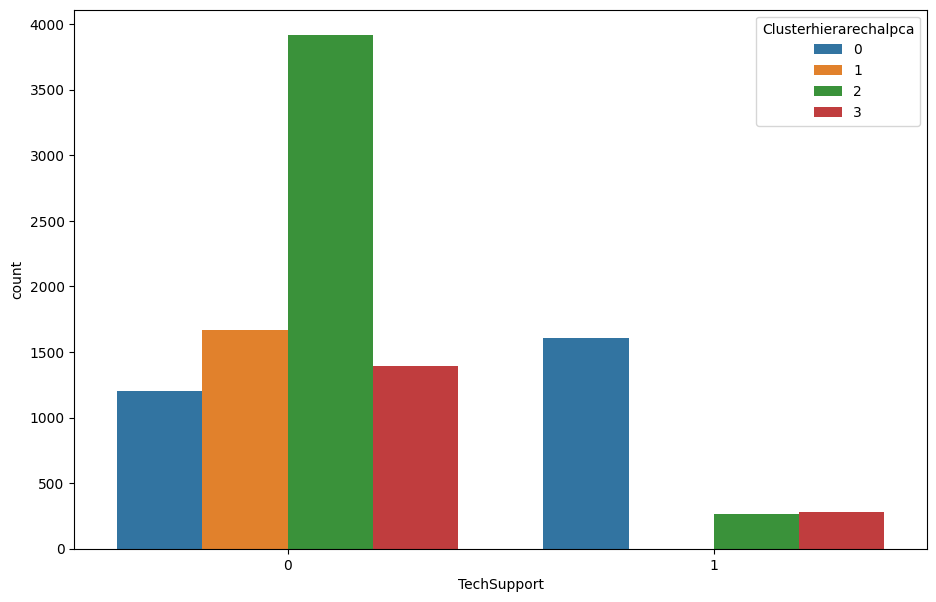

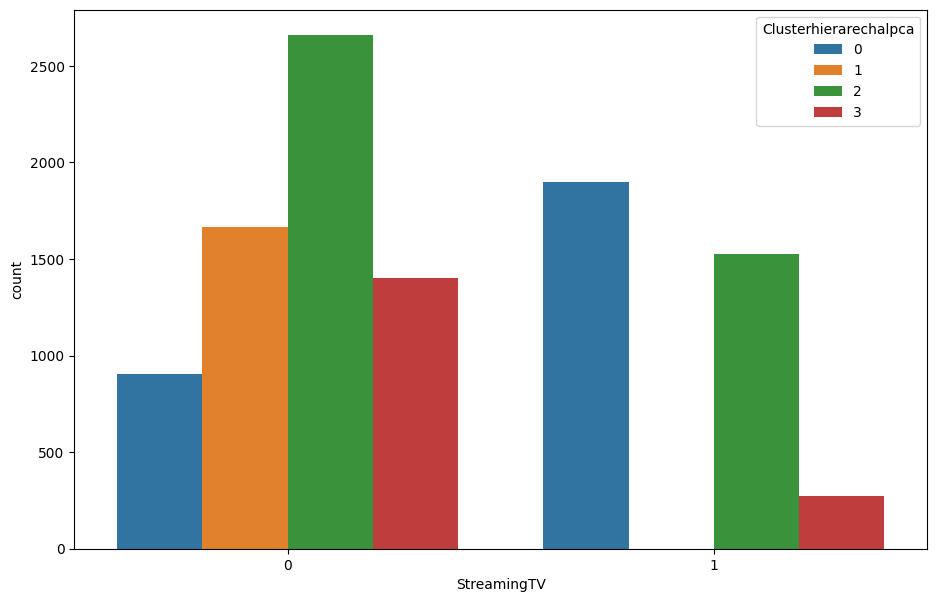

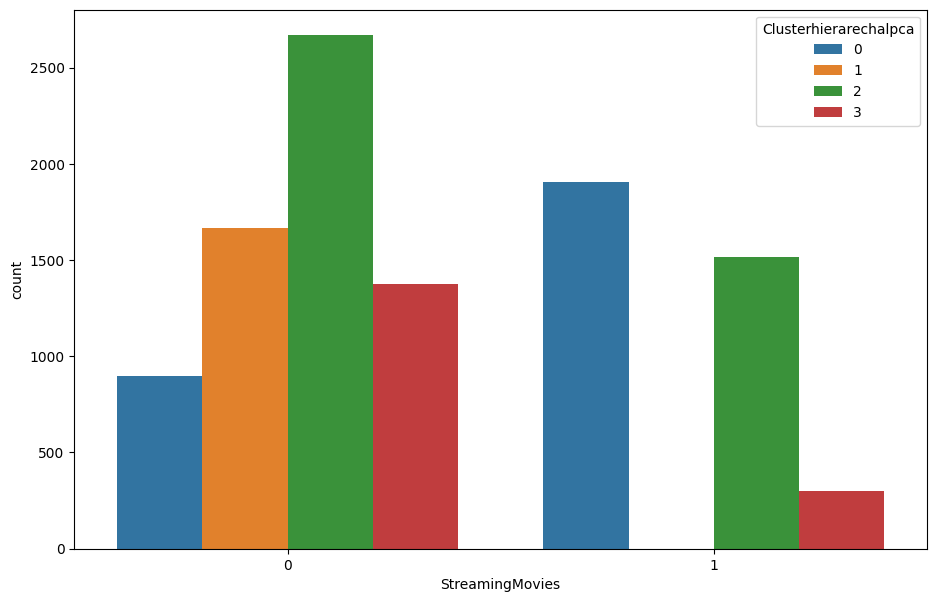

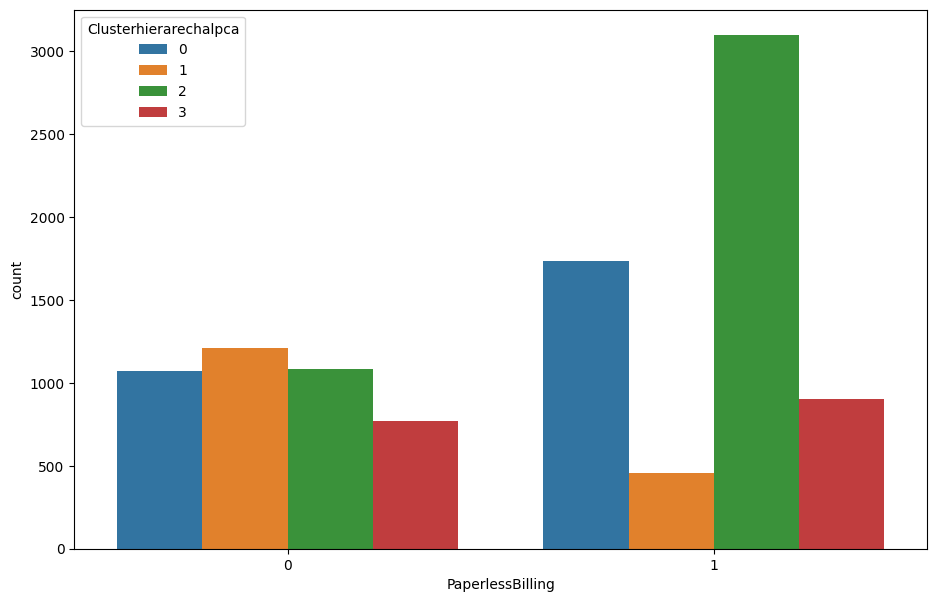

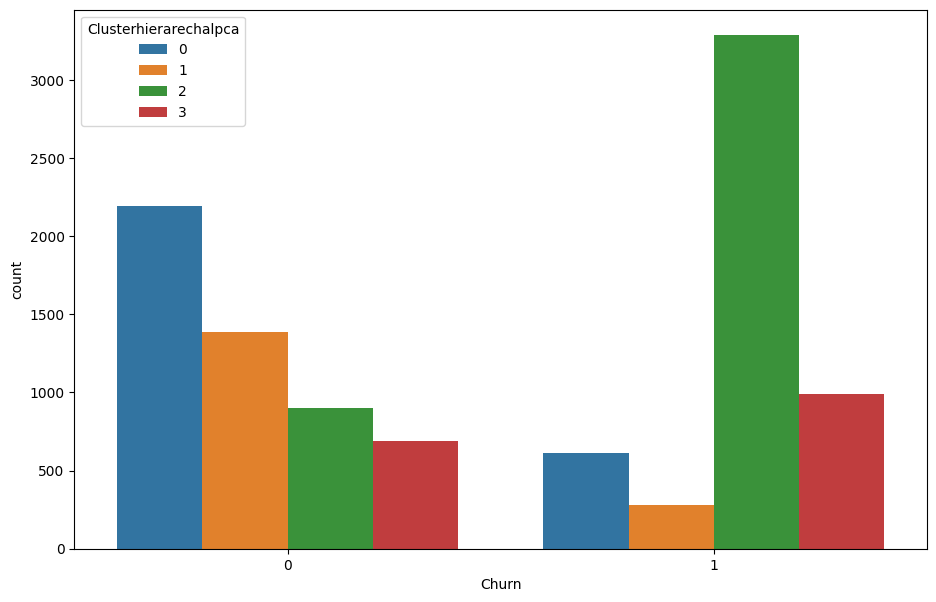

In [183]:
for col in ['gender','SeniorCitizen','Partner','Dependents',
            'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']:
    fig = plt.figure(figsize=(11,7))
    sns.countplot(x=df[col],hue=df["Clusterhierarechalpca"])
    plt.show()

## Recommendations that the Telco company should do:

* give more attention to technical support
* improve the fiber optic service
* invest in marketing strategies targeting
* customers with short-term contracts, trying to move them to long contracts
* customers without online services, offering these services
* single customers, since their churn rate is higher than that of those who have partners and dependents
* guide customers towards simple paying methods like paper billing and credit card